# План лекции: От Линейного Программирования до Обучения с Подкреплением (и обратно?)

## Часть 0: Введение "Зачем всё это?"

*   Привет, дата-джедаи и будущие повелители алгоритмов!  Сегодня у нас на повестке дня мега-интересная тема. Мы попробуем подружить, на первый взгляд, совершенно разные подходы к принятию решений.

*   Мы копнем в две мощные штуки:
    1.  **Линейное Программирование (ЛП)** – это когда мы точно знаем, чего хотим (например, максимум прибыли) и какие у нас есть ограничения (например, не больше 100 часов работы станка), и ищем *самый-самый* лучший рецепт успеха.
    2.  **Обучение с Подкреплением (Reinforcement Learning, или просто RL)** – это как научить компьютер играть в игры или управлять роботом, когда он сам методом проб, ошибок и "вкусняшек" понимает, что делать хорошо, а что – не очень.

*   **Цель дня:**
    *   Разобраться, что такое ЛП и как с его помощью находить оптимальные решения в бизнесе, логистике и вообще везде, где есть цифры и цели.
    *   Понять основы RL: как машины учатся на собственном опыте.
    *   Увидеть, как эти два мира могут быть связаны, и как переход от одного к другому отражает усложнение задач, которые мы хотим решать.
    *   И, конечно, написать немного кода и даже сделать мини-игру!

*   Спойлер: будет интересно, и да, мы заставим машину саму принимать решения!

# Часть 1: Линейное Программирование – Оптимизируй это! 📊

## 1.1. Что за зверь такой – ЛП? (И почему он "линейный"?)

Представь, что у тебя есть куча ресурсов (время, деньги, сырье) и куча способов их потратить, чтобы получить максимальный профит (или минимальные затраты). ЛП – это математический способ найти **самый-самый** лучший вариант.

### Ключевые понятия:

🎯 **Целевая функция:** То, что мы хотим максимизировать (прибыль) или минимизировать (расходы). Она должна быть линейной (типа `3x + 5y`).

🔧 **Переменные решения:** То, что мы можем менять (сколько производить продукта А, сколько продукта Б).

⛔ **Ограничения:** Правила игры (у нас всего 100 кг сырья, или не больше 8 часов работы станка). Они тоже линейные (типа `x + y <= 100`).

### Простые примеры из жизни:
- **Задача о диете:** минимальная стоимость при соблюдении калорийности
- **Задача о производстве:** максимальная прибыль при ограниченных ресурсах
- **Логистика:** как развезти товары с минимальными затратами

## 1.2. Как это работает (без глубокой математики, честно!)

- Для двух переменных можно даже нарисовать (графический метод) 📈
- Для большего числа переменных – умные алгоритмы типа симплекс-метода (просто знайте, что он есть и он крут)
- **Главное** – мы ищем "уголок" в допустимой области, где наша целевая функция достигает пика (или дна)

Давайте посмотрим на простом примере!

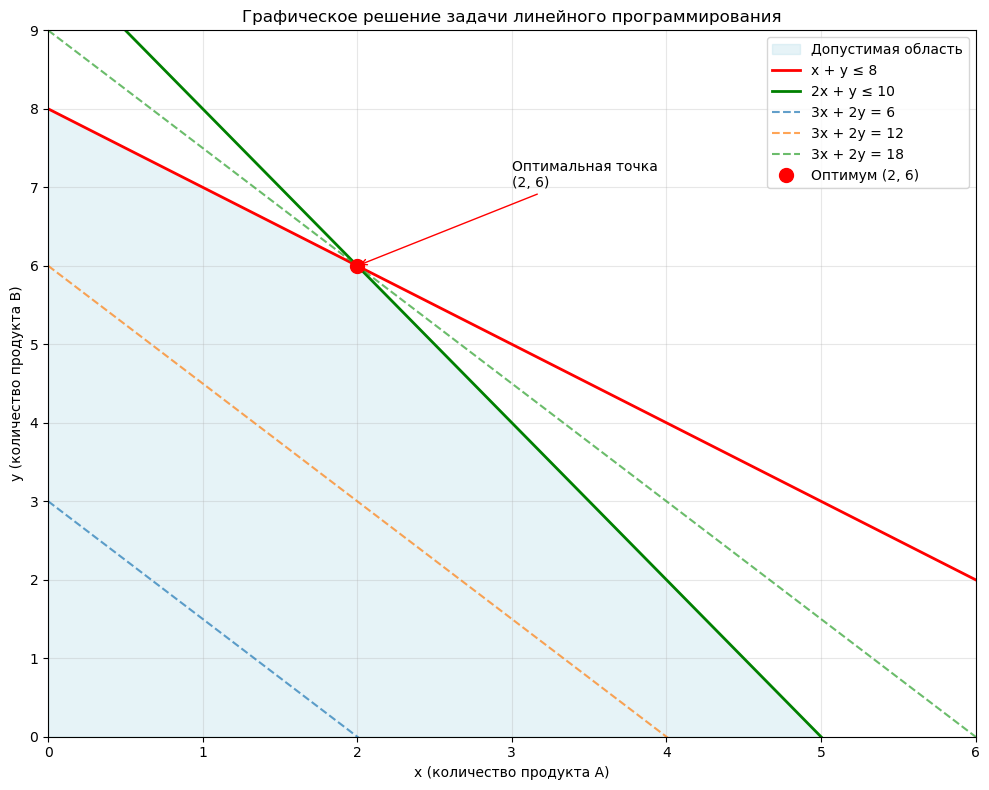

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Простая визуализация задачи ЛП для двух переменных
fig, ax = plt.subplots(figsize=(10, 8))

# Определяем область ограничений
x = np.linspace(0, 10, 100)

# Ограничения: x + y <= 8, 2x + y <= 10, x >= 0, y >= 0
y1 = 8 - x  # x + y <= 8
y2 = 10 - 2*x  # 2x + y <= 10

# Заливаем допустимую область
x_fill = np.linspace(0, 5, 100)
y_upper = np.minimum(8 - x_fill, 10 - 2*x_fill)
y_upper = np.maximum(y_upper, 0)

ax.fill_between(x_fill, 0, y_upper, alpha=0.3, color='lightblue', label='Допустимая область')

# Рисуем ограничения
ax.plot(x, y1, 'r-', label='x + y ≤ 8', linewidth=2)
ax.plot(x, y2, 'g-', label='2x + y ≤ 10', linewidth=2)

# Линии уровня целевой функции (например, максимизируем 3x + 2y)
for c in [6, 12, 18]:
    y_obj = (c - 3*x) / 2
    ax.plot(x, y_obj, '--', alpha=0.7, label=f'3x + 2y = {c}')

# Отмечаем оптимальную точку
ax.plot(2, 6, 'ro', markersize=10, label='Оптимум (2, 6)')
ax.annotate('Оптимальная точка\n(2, 6)', xy=(2, 6), xytext=(3, 7),
            arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlim(0, 6)
ax.set_ylim(0, 9)
ax.set_xlabel('x (количество продукта A)')
ax.set_ylabel('y (количество продукта B)')
ax.set_title('Графическое решение задачи линейного программирования')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

*   Представь, что ты владелец маленькой пекарни. Ты печешь два вида пирогов: яблочные и вишневые.
    *   На яблочный пирог уходит 1 час работы и 2 кг яблок, а прибыль с него – 300 рублей.
    *   На вишневый – 2 часа работы и 1 кг вишни, а прибыль – 400 рублей.
    *   У тебя есть ограничение: всего 40 часов работы в неделю и, скажем, 120 кг яблок и 50 кг вишни.
    *   **Вопрос:** Сколько яблочных и сколько вишневых пирогов нужно испечь, чтобы получить максимальную прибыль, не выходя за рамки ресурсов?

*   Вот такие задачки и решает Линейное Программирование (ЛП). Это метод оптимизации, который помогает найти наилучшее решение (например, максимальную прибыль или минимальные затраты) при заданных ограничениях.

*   **Почему "линейное"?**
    *   Потому что и то, что мы хотим оптимизировать (наша **целевая функция**), и наши **ограничения** выражаются линейными уравнениями или неравенствами.
    *   "Линейный" означает, что переменные у нас в первой степени (нет всяких `x²`, `1/y`, `x*y` и т.д.). Всё просто: `a*x + b*y + ...`.
    *   В нашем примере с пирогами:
        *   Пусть `x` – количество яблочных пирогов, `y` – количество вишневых.
        *   Прибыль (целевая функция): `300*x + 400*y` -> хотим максимизировать.
        *   Ограничение по времени: `1*x + 2*y <= 40`.
        *   Ограничение по яблокам: `2*x <= 120`.
        *   Ограничение по вишне: `1*y <= 50`.
        *   И, конечно, `x >= 0`, `y >= 0` (не можем испечь отрицательное количество пирогов).
    *   Видишь? Все формулы – линейные. Графически это будут прямые линии (или плоскости/гиперплоскости в многомерном случае).

*   **Ключевые понятия ЛП (запомни эти три!):**
    1.  **Переменные решения (Decision Variables):** Это то, что мы можем контролировать и изменять, чтобы достичь цели. В нашем примере это `x` (количество яблочных пирогов) и `y` (количество вишневых пирогов).
    2.  **Целевая функция (Objective Function):** Это математическое выражение, которое мы хотим максимизировать (например, прибыль, доход, эффективность) или минимизировать (например, затраты, время, риски). Она должна быть линейной функцией от переменных решения. `(Прибыль = 300*x + 400*y)`.
    3.  **Ограничения (Constraints):** Это правила или лимиты, которые необходимо соблюдать. Они тоже выражаются линейными уравнениями или неравенствами от переменных решения. `(1*x + 2*y <= 40)`.

*   **Типичные примеры задач ЛП из жизни:**
    *   **Задача о диете:** Как составить рацион питания с минимальной стоимостью, удовлетворяя при этом все потребности в питательных веществах (калории, белки, витамины)?
    *   **Задача о производстве (как наша с пирогами):** Как распределить ограниченные ресурсы (труд, сырье, оборудование) между производством различных товаров, чтобы максимизировать прибыль?
    *   **Транспортная задача:** Как оптимально доставить товары со складов потребителям с минимальными транспортными расходами?
    *   **Задача о назначениях:** Как распределить сотрудников по задачам, чтобы максимизировать общую производительность или минимизировать время выполнения?

В общем, ЛП – это мощный и широко используемый инструмент для принятия обоснованных решений во многих областях.

### 1.2. Как это работает (и как это выглядит!)

Окей, с терминами разобрались. А как же ЛП находит то самое "оптимальное" решение?

*   **Идея простая:** мы ищем лучшую точку в "допустимой области".

*   **Если у нас всего две переменные (например, `x` и `y`), то всё можно нарисовать! Это называется **графический метод**.**

    1.  **Рисуем ограничения:** Каждое наше линейное неравенство (типа `x + 2y <= 40`) на плоскости `(x, y)` задает полуплоскость.
        *   Например, для `x + 2y <= 40`, сначала рисуем прямую `x + 2y = 40`.
        *   Потом определяем, какая сторона прямой нам подходит (обычно подстановкой точки (0,0): `0 + 2*0 <= 40` – верно, значит, нам нужна полуплоскость, содержащая начало координат).
        *   Не забываем про `x >= 0` и `y >= 0` – это значит, мы работаем только в первом квадранте (где `x` и `y` неотрицательны).

    2.  **Находим допустимую область (Feasible Region):** Это область на графике, где выполняются *все* наши ограничения одновременно. Обычно это какой-нибудь многоугольник. Любая точка внутри этого многоугольника или на его границе – это допустимое решение.

    Давай сразу посмотрим, как это может выглядеть на **конкретном бизнес-примере**.
    Представим, что мы производим два продукта: Продукт А (его количество обозначим `x`) и Продукт Б (его количество `y`).

    *   Прибыль от продажи одной единицы Продукта А составляет 5 денежных единиц.
    *   Прибыль от продажи одной единицы Продукта Б составляет 7 денежных единиц.
    *   Наша **цель** – максимизировать общую прибыль: `P = 5x + 7y`.

    Для производства этих продуктов у нас есть **ограниченные ресурсы**:
    *   **Ресурс 1 (например, трудочасы):** На производство одной единицы Продукта А тратится 2 часа, а на Продукт Б – 1 час. Всего у нас есть 16 трудочасов.
        *   Ограничение: `2x + y <= 16`
    *   **Ресурс 2 (например, сырье):** На производство одной единицы Продукта А тратится 1 кг сырья, а на Продукт Б – 2 кг сырья. Всего у нас есть 11 кг сырья.
        *   Ограничение: `x + 2y <= 11`
    *   И, конечно, мы не можем произвести отрицательное количество продуктов:
        *   `x >= 0`
        *   `y >= 0`

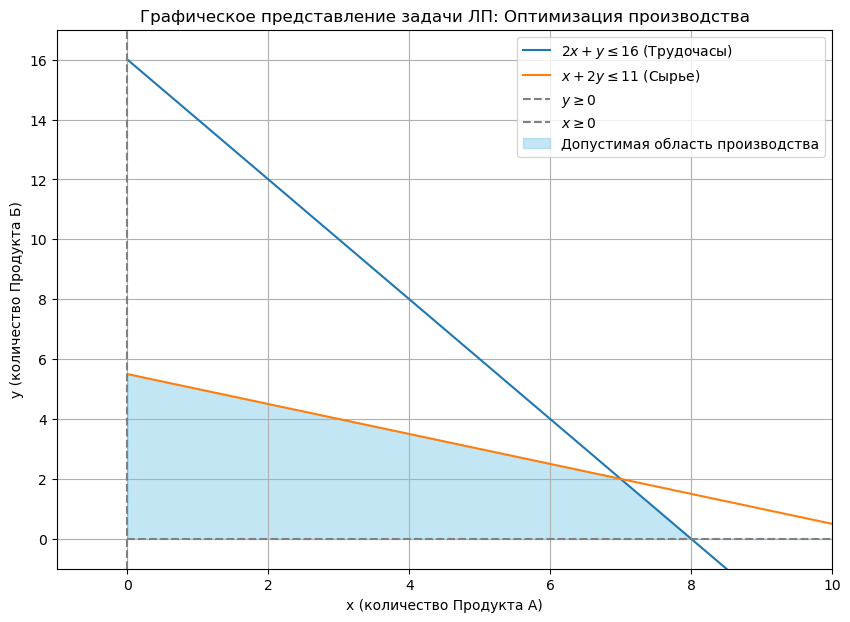

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем диапазон для x
x_vals = np.linspace(0, 10, 400) # от 0 до 10, 400 точек для гладкости

# Наши ограничения (выражаем y через x)
# Ресурс 1: 2x + y <= 16  =>  y <= 16 - 2x
y1_resource1 = 16 - 2*x_vals
# Ресурс 2: x + 2y <= 11  =>  y <= (11 - x) / 2
y2_resource2 = (11 - x_vals) / 2
# y >= 0
y3_non_negative = np.zeros_like(x_vals) # просто линия y=0

# Рисуем линии ограничений
plt.figure(figsize=(10, 7)) # Чуть увеличим для читаемости
plt.plot(x_vals, y1_resource1, label=r'$2x + y \leq 16$ (Трудочасы)')
plt.plot(x_vals, y2_resource2, label=r'$x + 2y \leq 11$ (Сырье)')
plt.plot(x_vals, y3_non_negative, label=r'$y \geq 0$', color='grey', linestyle='--') # y >= 0
plt.vlines(0, -1, 17, label=r'$x \geq 0$', color='grey', linestyle='--') # x >= 0 (поднимем верхнюю границу для vlines)

# Заполняем допустимую область
# Нам нужна область, которая УДОВЛЕТВОРЯЕТ ВСЕМ ограничениям.
# Это значит, y должен быть меньше или равен MIN(y1_resource1, y2_resource2) и больше или равен y3_non_negative (т.е. 0)
# А x должен быть больше или равен 0.
y_feasible = np.minimum(y1_resource1, y2_resource2)
# Убедимся, что мы не закрашиваем ниже y=0 и не выходим за пределы x=0
# (x_vals уже начинается с 0, так что это учтено для fill_between)
y_feasible_positive = np.maximum(y_feasible, 0)

plt.fill_between(x_vals, y_feasible_positive, where=y_feasible_positive>=0, color='skyblue', alpha=0.5, label='Допустимая область производства')

plt.xlim(-1, 10)
plt.ylim(-1, 17) # Чуть увеличим Y-ось, чтобы метка y1 была видна
plt.xlabel('x (количество Продукта А)')
plt.ylabel('y (количество Продукта Б)')
plt.legend(loc='upper right')
plt.title('Графическое представление задачи ЛП: Оптимизация производства')
plt.grid(True)
plt.show()


3.  **Ищем оптимум (вершину):** Самое классное в ЛП – **оптимальное решение всегда находится в одной из вершин (углов) этого многоугольника допустимых решений!** (Или, в редких случаях, на целом ребре, если целевая функция параллельна этому ребру).
        *   Нам не нужно проверять все бесконечное множество точек внутри! Только углы. На нашем графике это точки (0,0), (8,0) (если бы не было второго ограничения, но оно есть), (0, 5.5) и точка пересечения линий `2x + y = 16` и `x + 2y = 11`.
        *   Точка пересечения прямых `2x + y = 16` и `x + 2y = 11`:
            *   Из первого: `y = 16 - 2x`. Подставляем во второе:
            *   `x + 2(16 - 2x) = 11`
            *   `x + 32 - 4x = 11`
            *   `-3x = 11 - 32`
            *   `-3x = -21`
            *   `x = 7`
            *   Тогда `y = 16 - 2*7 = 16 - 14 = 2`.
            *   Точка пересечения: `(7, 2)`.

        *   Вершины допустимой области:
            1.  `(0,0)`
            2.  `(0, 5.5)` (пересечение `x=0` с `x + 2y = 11`)
            3.  `(7, 2)` (пересечение `2x + y = 16` и `x + 2y = 11`)
            4.  `(8, 0)` (пересечение `y=0` с `2x + y = 16`)

    4.  **Как найти нужную вершину?**
        *   **Способ 1 (перебор вершин):** Подставить координаты вершин в нашу целевую функцию (`P = 5x + 7y`).
            *   (0,0) -> `P = 5*0 + 7*0 = 0`
            *   (0,5.5) -> `P = 5*0 + 7*5.5 = 38.5`
            *   (7,2) -> `P = 5*7 + 7*2 = 35 + 14 = 49`  <- **Максимальная прибыль!**
            *   (8,0) -> `P = 5*8 + 7*0 = 40`
            *   **Оптимальный план производства:** 7 единиц Продукта А и 2 единицы Продукта Б. Максимальная прибыль: 49 денежных единиц.
        *   **Способ 2 (линия уровня):** Нарисовать линию целевой функции (например, `5x + 7y = C`). Это будет прямая. "Двигаем" эту линию параллельно самой себе в сторону увеличения `C` (вектор `(5, 7)` указывает направление роста) до тех пор, пока она не коснется последней точки нашего многоугольника – это и будет `(7,2)`. *(Это можно дополнительно показать на графике, нарисовав линию `5x + 7y = 49` – она пройдет через точку (7,2) и "коснется" допустимой области с внешней стороны)*.

*   **А если переменных больше двух (3, 10, 1000...)?**
    *   Нарисовать уже не получится (ну, 3D еще можно представить, а дальше – никак).
    *   Тут на помощь приходят алгоритмы. Самый известный – **симплекс-метод**.
    *   **Симплекс-метод (очень упрощенно):** Это как умный жучок, который садится на одну из вершин многогранника (да, в многомерном пространстве это уже не многоугольник, а многогранник или "политоп") и начинает "ползти" по ребрам от одной вершины к другой, каждый раз выбирая ту соседнюю вершину, где целевая функция лучше. И так до тех пор, пока не дойдет до вершины, из которой уже нельзя улучшить результат. Это и будет оптимум.
    *   Нам не нужно знать все детали симплекс-метода, чтобы им пользоваться. Главное – понимать, что он есть, он эффективен и реализован во многих библиотеках.

*   **Главное запомнить:** Мы ищем "уголок" в допустимой области, где наша целевая функция достигает своего пика (если максимизируем) или дна (если минимизируем). И для этого есть как наглядные (для 2D), так и алгоритмические (для N-D) способы.

### 1.3. Инструменты в Python: Да начнется магия !

Теория – это хорошо, графики – наглядно, но мы же хотим, чтобы компьютер делал всю грязную работу за нас, правда? 😉
К счастью, в Python есть несколько отличных библиотек для решения задач линейного программирования.

#### 1.3.1. PuLP: Простой и понятный солвер

**PuLP** – это, пожалуй, одна из самых дружелюбных библиотек для ЛП на Python. Она позволяет формулировать задачи почти так же, как мы их описываем словами.


In [6]:
!pip install pulp


*   **Давай решим нашу задачу про Продукт А и Продукт Б с помощью PuLP!**
    Напомню условия:
    *   Максимизировать прибыль `P = 5x + 7y`
    *   Переменные: `x` (Продукт А), `y` (Продукт Б)
    *   Ограничения:
        *   `2x + y <= 16` (Трудочасы)
        *   `x + 2y <= 11` (Сырье)
        *   `x >= 0`
        *   `y >= 0`

    Вот как это будет выглядеть в коде:

In [8]:
from pulp import LpProblem, LpMaximize, LpVariable, lpSum, value


In [9]:
# 1. Создаем задачу
# LpProblem("имя_задачи", LpMaximize или LpMinimize)
model = LpProblem(name="Производство_Продуктов", sense=LpMaximize)

In [10]:
model

Производство_Продуктов:
MAXIMIZE
None
VARIABLES

In [11]:
# 2. Определяем переменные решения
# LpVariable("имя_переменной", нижняя_граница, верхняя_граница, тип_переменной)
# По умолчанию нижняя граница 0, тип - непрерывная (LpContinuous)
x = LpVariable(name="Продукт_А", lowBound=0)
y = LpVariable(name="Продукт_Б", lowBound=0)

In [12]:
x

Продукт_А

In [15]:
type(x)

pulp.pulp.LpVariable

In [16]:
# 3. Добавляем целевую функцию
# Используем += для добавления цели или ограничений
model += (5 * x + 7 * y, "Суммарная_Прибыль")

In [17]:
# 4. Добавляем ограничения
model += (2 * x + 1 * y <= 16, "Ограничение_Трудочасы")
model += (1 * x + 2 * y <= 11, "Ограничение_Сырье")

In [18]:
# Можно посмотреть, как выглядит задача (опционально)
print(model)

Производство_Продуктов:
MAXIMIZE
5*Продукт_А + 7*Продукт_Б + 0
SUBJECT TO
Ограничение_Трудочасы: 2 Продукт_А + Продукт_Б <= 16

Ограничение_Сырье: Продукт_А + 2 Продукт_Б <= 11

VARIABLES
Продукт_А Continuous
Продукт_Б Continuous



In [19]:

# 5. Решаем задачу
status = model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/90015353076e459d94b6c293f0d4c5bd-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/90015353076e459d94b6c293f0d4c5bd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 12 (2)
0  Obj -0 Dual inf 12 (2)
2  Obj 49
Optimal - objective value 49
Optimal objective 49 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.02



In [21]:
# 6. Выводим результаты
print(f"Статус решения: {model.status}") # 1 (Optimal), -1 (Infeasible), etc.
print(f"Оптимальное значение целевой функции (Прибыль): {value(model.objective)}")
print("Оптимальные значения переменных:")
print(f"Количество Продукта А (x): {value(x)}")
print(f"Количество Продукта Б (y): {value(y)}")

Статус решения: 1
Оптимальное значение целевой функции (Прибыль): 49.0
Оптимальные значения переменных:
Количество Продукта А (x): 7.0
Количество Продукта Б (y): 2.0


*   **Разбор полетов (кода PuLP):**
    1.  `LpProblem("Производство_Продуктов", LpMaximize)`: Создаем "контейнер" для нашей задачи. Даем ему имя (любое понятное) и указываем, что мы хотим делать: `LpMaximize` (максимизировать) или `LpMinimize` (минимизировать).
    2.  `x = LpVariable(name="Продукт_А", lowBound=0)`: Объявляем переменную `x`. `lowBound=0` говорит, что `x >= 0`. Если верхняя граница не указана (`upBound`), то она не ограничена. По умолчанию переменные непрерывные (`LpContinuous`). Если нужны целые числа, можно указать `cat='Integer'`.
    3.  `model += (5 * x + 7 * y, "Суммарная_Прибыль")`: Задаем целевую функцию. Первым элементом кортежа идет само выражение, вторым – его описание (для читаемости).
    4.  `model += (2 * x + 1 * y <= 16, "Ограничение_Трудочасы")`: Добавляем ограничения. Синтаксис очень похож на математическую запись. Снова даем описание для понятности.
    5.  `status = model.solve()`: Магия! PuLP вызывает солвер (по умолчанию это CBC, который идет в комплекте, но можно подключить и другие, например, GLPK, Gurobi, CPLEX, если они установлены).
    6.  `model.status``: Статус решения. `1` означает "Optimal" – решение найдено. Бывают и другие (неразрешима, не ограничена).
    7.  `value(model.objective)`: Значение целевой функции в оптимальной точке. В нашем случае – максимальная прибыль.
    8.  `value(x)`, `value(y)`: Оптимальные значения наших переменных.

*   **Что мы увидим в выводе?**
    *   Статус: `1` (Optimal)
    *   Прибыль: `49.0`
    *   Продукт А (x): `7.0`
    *   Продукт Б (y): `2.0`
    *   Точно такие же результаты, как мы получили графически и перебором вершин! Но компьютер сделал это за доли секунды.

PuLP очень хорош для быстрого прототипирования и когда важна читаемость модели.

#### 1.3.2. SciPy (`scipy.optimize.linprog`): Научный подход

**SciPy** – это огромная библиотека для научных и инженерных вычислений в Python. Внутри нее есть модуль `scipy.optimize`, а в нем – функция `linprog` для решения задач линейного программирования.

In [ ]:
!pip install scipy


*   **Особенности `scipy.optimize.linprog`:**
    *   Он ожидает задачу в **стандартной (канонической) форме минимизации**:
        ```
        minimize:  c @ x
        subject to: A_ub @ x <= b_ub  (ограничения-неравенства "меньше или равно")
                    A_eq @ x == b_eq  (ограничения-равенства)
                    bounds          (границы для переменных, например x_i >= 0)
        ```
    *   `c`: Вектор коэффициентов целевой функции.
    *   `A_ub`, `b_ub`: Матрица и вектор для ограничений-неравенств типа `<=`.
    *   `A_eq`, `b_eq`: Матрица и вектор для ограничений-равенств типа `==`.
    *   `bounds`: Список кортежей `(min_val, max_val)` для каждой переменной. `None` означает отсутствие границы.

*   **Придется немного адаптировать нашу задачу:**
    1.  **Целевая функция:** У нас максимизация `P = 5x + 7y`. `linprog` минимизирует. Чтобы максимизировать, мы минимизируем `-P = -5x - 7y`. Значит, `c = [-5, -7]`.
    2.  **Переменные:** `x` (Продукт А), `y` (Продукт Б).
    3.  **Ограничения-неравенства (у нас все `<=`, это удобно):**
        *   `2x + y <= 16`
        *   `x + 2y <= 11`
        *   Это значит:
            `A_ub = [[2, 1], [1, 2]]`
            `b_ub = [16, 11]`
    4.  **Ограничения-равенства:** У нас их нет, так что `A_eq` и `b_eq` будут `None` или пустые.
    5.  **Границы переменных:** `x >= 0`, `y >= 0`. Значит, `bounds = [(0, None), (0, None)]`.

In [22]:
from scipy.optimize import linprog
import numpy as np

# 1. Коэффициенты целевой функции (минимизируем -P)
c = np.array([-5, -7]) # Для максимизации 5x + 7y

# 2. Матрица коэффициентов для ограничений-неравенств (A_ub @ x <= b_ub)
A_ub = np.array([[2, 1],  # 2x + y <= 16
                 [1, 2]]) #  x + 2y <= 11

# 3. Вектор правых частей ограничений-неравенств
b_ub = np.array([16, 11])

# 4. Границы для переменных (x >= 0, y >= 0)
# Каждая переменная - это кортеж (min_bound, max_bound)
# None означает отсутствие границы
x_bounds = (0, None) # x >= 0
y_bounds = (0, None) # y >= 0

# 5. Решаем задачу
# method='highs' (начиная со SciPy 1.6.0) или 'simplex' (более старый, но тоже рабочий)
# 'highs' - это новый, более производительный солвер
# 'interior-point' - еще один вариант
# Убедимся, что у студентов версия SciPy, поддерживающая 'highs', или используем 'simplex' / 'interior-point'
# Для старых версий SciPy (до 1.9.0) метод по умолчанию был 'interior-point',
# но он может быть менее точен для некоторых задач.
# 'highs-ds' (dual simplex) и 'highs-ipm' (interior-point) - более конкретные варианты 'highs'
result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=[x_bounds, y_bounds], method='highs')

# 6. Выводим результаты
if result.success:
    print(f"Статус решения: Успешно (Optimal)")
    # result.fun содержит минимизированное значение (-P), поэтому берем с минусом
    print(f"Оптимальное значение целевой функции (Прибыль): {-result.fun}")
    print("Оптимальные значения переменных:")
    print(f"Количество Продукта А (x): {result.x[0]}")
    print(f"Количество Продукта Б (y): {result.x[1]}")
else:
    print(f"Статус решения: Неуспешно ({result.message})")
    print(result) # Вывести весь объект result для отладки

Статус решения: Успешно (Optimal)
Оптимальное значение целевой функции (Прибыль): 49.0
Оптимальные значения переменных:
Количество Продукта А (x): 7.0
Количество Продукта Б (y): 2.0


*   **Разбор полетов (кода SciPy):**
    *   Формат данных: `SciPy` более "матричный". Нужно подготовить векторы и матрицы.
    *   `linprog(c, A_ub, b_ub, bounds, method)`: Основные аргументы.
    *   `method='highs'`: Начиная с `SciPy 1.6.0+`, `highs` стал солвером по умолчанию и он очень хорош. Для более старых версий может потребоваться явно указать `method='simplex'` или `method='interior-point'`. Если вы не уверены в версии SciPy у студентов, можно упомянуть это или предложить `method='simplex'` как более универсальный (хотя и старый) вариант.
        *   *Примечание для тебя: проверь, какая версия SciPy у тебя и какая может быть у студентов. `highs` предпочтительнее, если доступен.*
    *   `result.success`: Булево значение, найдено ли оптимальное решение.
    *   `result.fun`: Оптимальное значение целевой функции (помним, что мы минимизировали `-P`).
    *   `result.x`: Массив NumPy с оптимальными значениями переменных `[x, y]`.

*   **Что мы увидим в выводе (если `method='highs'` или другой подходящий сработал):**
    *   Статус: Успешно (Optimal)
    *   Прибыль: `49.0`
    *   Продукт А (x): `7.0`
    *   Продукт Б (y): `2.0`
    *   Снова те же результаты!

*   **Когда использовать SciPy?**
    *   Если вы уже работаете с NumPy и SciPy для других вычислений.
    *   Когда нужно интегрировать решение ЛП в более крупный научный расчет.
    *   Он может быть немного менее интуитивен для описания задачи по сравнению с PuLP из-за необходимости приведения к стандартной форме, но под капотом у него мощные солверы.

SciPy – это такой швейцарский нож для научных вычислений, и `linprog` – одна из его полезных функций

#### 1.3.3. Google OR-Tools: Мощь от Google для сложных задач

**Google OR-Tools** – это не просто библиотека для линейного программирования, а целый набор инструментов (suite) для решения широкого круга задач комбинаторной оптимизации, включая ЛП, целочисленное программирование, задачи маршрутизации, планирования и многое другое. Она разработана Google и используется ими для многих своих сервисов.


In [23]:
!pip install ortools


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 11.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 34.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.12
    Uninstalling protobuf-4.21.12:
      Successfully uninstalled protobuf-4.21.12


*   **Особенности Google OR-Tools для ЛП:**
    *   Поддерживает несколько солверов "под капотом" (GLOP – собственный LP солвер Google, а также может использовать сторонние, такие как Gurobi, CPLEX, SCIP, GLPK, если они установлены и настроены).
    *   Синтаксис похож на PuLP в плане объектно-ориентированного подхода к построению модели, но со своими нюансами.
    *   Очень производительная, особенно на больших и сложных задачах.

*   **Давай решим нашу задачу про Продукт А и Продукт Б с помощью Google OR-Tools:**
    Напомню условия:
    *   Максимизировать прибыль `P = 5x + 7y`
    *   Переменные: `x` (Продукт А), `y` (Продукт Б)
    *   Ограничения:
        *   `2x + y <= 16` (Трудочасы)
        *   `x + 2y <= 11` (Сырье)
        *   `x >= 0`, `y >= 0`

In [24]:
from ortools.linear_solver import pywraplp

# 1. Создаем солвер
# Можно выбрать конкретный солвер: 'GLOP', 'CBC', 'SCIP', 'GUROBI', 'CPLEX' и др.
# 'GLOP' - это линейный солвер Google, хорош для ЛП.
# 'CBC_MIXED_INTEGER_PROGRAMMING' если нужны целочисленные переменные (хотя GLOP их не поддерживает, для этого есть SCIP или CBC)
solver = pywraplp.Solver.CreateSolver('GLOP')
# Если солвер не найден, CreateSolver вернет None
if not solver:
    print("Солвер GLOP не найден или не доступен.")
    # exit() # или использовать другой солвер, если нужно

In [25]:
# 2. Определяем переменные решения
# solver.NumVar(нижняя_граница, верхняя_граница, 'имя_переменной')
# infinity() для отсутствия верхней границы
infinity = solver.infinity()
x = solver.NumVar(0, infinity, 'x_Продукт_А')
y = solver.NumVar(0, infinity, 'y_Продукт_Б')

print(f'Количество переменных = {solver.NumVariables()}')

Количество переменных = 2


In [27]:
# 3. Добавляем ограничения
# solver.Add(выражение <= правая_часть, 'имя_ограничения')
constraint1 = solver.Add(2 * x + 1 * y <= 16, 'Трудочасы')
constraint2 = solver.Add(1 * x + 2 * y <= 11, 'Сырье')

print(f'Количество ограничений = {solver.NumConstraints()}')

# 4. Определяем целевую функцию
# solver.Maximize(выражение) или solver.Minimize(выражение)
objective = solver.Objective()
objective.SetCoefficient(x, 5)
objective.SetCoefficient(y, 7)
objective.SetMaximization() # Говорим, что хотим максимизировать

# 5. Решаем задачу
status = solver.Solve()

# 6. Выводим результаты
if status == pywraplp.Solver.OPTIMAL:
    print('Статус решения: ОПТИМАЛЬНОЕ')
    print(f'Оптимальное значение целевой функции (Прибыль) = {solver.Objective().Value():.2f}')
    print('Оптимальные значения переменных:')
    print(f'Количество Продукта А (x) = {x.solution_value():.2f}')
    print(f'Количество Продукта Б (y) = {y.solution_value():.2f}')
    # Теневые цены (dual values) и значения ограничений (activities)
    # print(f'Теневая цена ограничения "Трудочасы": {constraint1.dual_value():.2f}')
    # print(f'Теневая цена ограничения "Сырье": {constraint2.dual_value():.2f}')
    # print(f'Значение ограничения "Трудочасы": {constraint1.activity():.2f}') # Сколько ресурса использовано
    # print(f'Значение ограничения "Сырье": {constraint2.activity():.2f}')
elif status == pywraplp.Solver.FEASIBLE:
    print('Статус решения: ДОПУСТИМОЕ (не обязательно оптимальное, но удовлетворяет ограничениям)')
elif status == pywraplp.Solver.INFEASIBLE:
    print('Статус решения: НЕДОПУСТИМОЕ (нет решений, удовлетворяющих всем ограничениям)')
else:
    print(f'Статус решения: {status} (см. документацию OR-Tools для других статусов)')

Количество ограничений = 2
Статус решения: ОПТИМАЛЬНОЕ
Оптимальное значение целевой функции (Прибыль) = 49.00
Оптимальные значения переменных:
Количество Продукта А (x) = 7.00
Количество Продукта Б (y) = 2.00


*   **Разбор полетов (кода Google OR-Tools):**
    1.  `solver = pywraplp.Solver.CreateSolver('GLOP')`: Создаем экземпляр солвера. `GLOP` – это линейный оптимизационный солвер от Google, очень эффективный. Если нужны целочисленные переменные, то чаще используют `SCIP` или `CBC` (например, `pywraplp.Solver.CreateSolver('SCIP_MIXED_INTEGER_PROGRAMMING')` или `'CBC_MIXED_INTEGER_PROGRAMMING'`).
    2.  `x = solver.NumVar(0, solver.infinity(), 'x_Продукт_А')`: Переменные создаются с указанием нижней, верхней границы и имени. `solver.infinity()` удобно для задания неограниченных переменных.
    3.  `solver.Add(2 * x + 1 * y <= 16, 'Трудочасы')`: Ограничения добавляются методом `Add`. Имя ограничения опционально, но полезно.
    4.  `objective = solver.Objective()`: Сначала получаем объект целевой функции.
        `objective.SetCoefficient(x, 5)`: Затем устанавливаем коэффициенты для каждой переменной.
        `objective.SetMaximization()`: И указываем направление оптимизации.
    5.  `status = solver.Solve()`: Запускаем решение.
    6.  `status == pywraplp.Solver.OPTIMAL`: Проверяем статус. `OR-Tools` имеет несколько статусов, `OPTIMAL` – то, что нам нужно.
    7.  `solver.Objective().Value()`: Оптимальное значение целевой функции.
    8.  `x.solution_value()`: Оптимальное значение переменной.

*   **Что мы увидим в выводе:**
    *   Статус: ОПТИМАЛЬНОЕ
    *   Прибыль: `49.00`
    *   Продукт А (x): `7.00`
    *   Продукт Б (y): `2.00`
    *   И снова те же результаты! Это вселяет уверенность.

*   **Когда использовать Google OR-Tools?**
    *   Для больших и сложных задач оптимизации.
    *   Когда нужна высокая производительность.
    *   Если вы решаете смешанные задачи (ЛП + целочисленное программирование, маршрутизация и т.д.) – `OR-Tools` предоставляет единый интерфейс к разным типам солверов.
    *   Если хотите использовать продвинутые возможности, такие как работа с различными солверами "под капотом".

Google OR-Tools – это действительно мощный инструмент, который стоит освоить, если вы серьезно 

**Краткое резюме по инструментам ЛП:**

*   **PuLP:** Простой, интуитивно понятный синтаксис, отлично для обучения и быстрого прототипирования.
*   **SciPy (`linprog`):** Хорош, если вы уже в экосистеме SciPy/NumPy, требует приведения задачи к матричной форме.
*   **Google OR-Tools:** Мощный, гибкий, производительный, подходит для сложных и больших задач, поддерживает разные типы оптимизации.

В зависимости от задачи и ваших предпочтений, вы можете выбрать любой из них. Для начала PuLP обычно самый простой в освоении.

In [28]:
import pandas as pd

comparison = pd.DataFrame({
    'Библиотека': ['PuLP', 'SciPy', 'OR-Tools'],
    'Простота использования': ['⭐⭐⭐⭐⭐', '⭐⭐⭐', '⭐⭐⭐⭐'],
    'Производительность': ['⭐⭐⭐', '⭐⭐⭐⭐', '⭐⭐⭐⭐⭐'],
    'Функциональность': ['⭐⭐⭐⭐', '⭐⭐⭐', '⭐⭐⭐⭐⭐'],
    'Когда использовать': [
        'Обучение, прототипы',
        'Уже есть SciPy',
        'Продакшн, сложные задачи'
    ]
})

print(comparison.to_string(index=False))

Библиотека Простота использования Производительность Функциональность       Когда использовать
      PuLP                  ⭐⭐⭐⭐⭐                ⭐⭐⭐             ⭐⭐⭐⭐      Обучение, прототипы
     SciPy                    ⭐⭐⭐               ⭐⭐⭐⭐              ⭐⭐⭐           Уже есть SciPy
  OR-Tools                   ⭐⭐⭐⭐              ⭐⭐⭐⭐⭐            ⭐⭐⭐⭐⭐ Продакшн, сложные задачи


### 1.4. Когда ЛП – твой лучший друг (а когда нет)

Линейное программирование – это, без сомнения, крутой инструмент, но, как и любой другой, он не является серебряной пулей для всех проблем. Важно понимать его сильные и слабые стороны.

#### Когда ЛП – это то, что доктор прописал:

1.  **Гарантия оптимальности:** Если задача корректно сформулирована как задача ЛП и решение существует, то алгоритмы (вроде симплекс-метода или методов внутренней точки) **гарантированно найдут глобально оптимальное решение**. Это не какая-то эвристика, которая дает "вроде хорошее" решение, а именно *самое лучшее* из возможных.
2.  **Эффективные солверы:** Существует множество хорошо отлаженных и очень быстрых солверов для ЛП (как коммерческих, так и с открытым исходным кодом, которые мы рассмотрели). Они могут справляться с задачами с тысячами и даже миллионами переменных и ограничений.
3.  **Широкий спектр приложений:** Как мы уже видели, ЛП применяется в огромном количестве областей: производство, логистика, финансы, планирование ресурсов, составление расписаний, сельское хозяйство и т.д.
4.  **Анализ чувствительности и "теневые цены":** Решение задачи ЛП дает не только оптимальные значения переменных. Оно также может предоставить ценную дополнительную информацию:
    *   **Теневые цены (dual values / shadow prices):** Показывают, насколько изменится значение целевой функции, если мы немного (на одну единицу) ослабим или ужесточим какое-либо ограничение (например, если у нас появится еще один час трудового времени или еще один килограмм сырья). Это супер полезно для принятия решений о том, стоит ли инвестировать в расширение узких мест.
    *   **Анализ чувствительности (sensitivity analysis):** Позволяет понять, насколько могут измениться коэффициенты целевой функции или правые части ограничений, прежде чем текущее оптимальное решение перестанет быть оптимальным.
5.  **Относительная простота моделирования (для линейных систем):** Если ваша система и цели действительно описываются линейными зависимостями, то сформулировать задачу ЛП может быть довольно просто и интуитивно.

#### Когда ЛП может оказаться не лучшим выбором (Минусы и ограничения 👎):

1.  **Предположение о линейности:** Самое главное ограничение – мир не всегда линейный!
    *   **Нелинейная целевая функция или ограничения:** Если ваша прибыль растет нелинейно с объемом производства (например, из-за скидок за объем или насыщения рынка), или затраты на ресурсы меняются скачкообразно, то ЛП в чистом виде не подойдет. Потребуются методы нелинейного программирования.
    *   **Дискретные (целочисленные) переменные:** ЛП по умолчанию предполагает, что переменные могут принимать любые действительные значения (например, произвести 7.25 единицы Продукта А). Если вам нужно производить только целое количество продуктов, нанимать целое число сотрудников, или принимать решения типа "да/нет" (бинарные переменные), то это уже задача целочисленного или смешанно-целочисленного линейного программирования (ILP/MILP). Хотя многие солверы ЛП (как OR-Tools, PuLP с CBC/SCIP) умеют решать и такие задачи, они вычислительно сложнее.
2.  **Требование детерминированности:** Классическое ЛП предполагает, что все коэффициенты (в целевой функции и ограничениях) известны точно и не меняются. В реальном мире часто присутствует неопределенность (цены колеблются, спрос непредсказуем, время выполнения операций варьируется). Для таких случаев существуют более продвинутые методы, такие как стохастическое программирование или робастная оптимизация.
3.  **Статичность модели:** ЛП обычно решает задачу для одного момента времени или для одного периода, предполагая, что условия остаются неизменными. Если система динамическая и решения в один момент времени влияют на возможности в будущем, то могут потребоваться методы динамического программирования или, как мы скоро увидим, обучение с подкреплением.
4.  **Сложность сбора точных данных:** Чтобы модель ЛП была полезна, нужны точные данные для всех коэффициентов и ограничений. Собрать и поддерживать такие данные в актуальном состоянии может быть непросто.
5.  **"Черный ящик" для очень больших моделей:** Хотя солверы найдут оптимум, понять "почему именно это решение" для очень больших и сложных моделей может быть трудно без инструментов анализа чувствительности.

**Итог по ЛП:**
Это невероятно мощный инструмент для поиска оптимальных решений в системах, которые можно адекватно описать линейными зависимостями с известными параметрами. Если ваша задача укладывается в эти рамки – ЛП ваш лучший друг! Если нет – не отчаивайтесь, существуют другие методы, и один из них мы как раз скоро начнем изучать.

### ✅ Плюсы:
- Гарантированно находит **оптимальное** решение (если оно есть)
- Много готовых быстрых солверов
- Математически обоснованно
- Масштабируется на большие задачи

### ❌ Минусы:
- Мир не всегда линейный 🌍
- Требует точной модели (всех ограничений и коэффициентов)
- Статичность - одно решение на все время
- Не учитывает неопределенность

## Часть 2: Мостик от ЛП к Обучению с Подкреплением

Итак, мы с вами неплохо так прокачались в Линейном Программировании. Мы увидели, что это мощный инструмент, когда у нас есть:

1.  **Четкая модель мира:** Мы знаем (или можем хорошо оценить) все коэффициенты в целевой функции и ограничениях. Мы понимаем, как наши решения влияют на результат.
2.  **Известные и стабильные условия:** Параметры задачи не меняются случайным образом во время принятия решения (или мы рассматриваем усредненный сценарий).
3.  **Оптимизация "здесь и сейчас" или для одного периода:** ЛП часто находит наилучшее решение для текущего набора условий. Если решения принимаются последовательно и каждое предыдущее решение влияет на будущие возможности, стандартное ЛП может быть не лучшим выбором (хотя есть его расширения типа многопериодного ЛП).

**ЛП великолепно отвечает на вопрос: "Что делать, если мир устроен вот так, и я хочу вот этого?"**

А теперь представьте ситуации, где эти условия не выполняются:

*   **Неопределенность и неизвестность:**
    *   Вы играете в новую компьютерную игру, правил которой до конца не знаете. Как понять, какое действие лучше?
    *   Робот должен научиться ходить по пересеченной местности, которую он видит впервые.
    *   Автоматическая торговая система на бирже должна реагировать на внезапные изменения рынка.
*   **Динамическая среда:**
    *   Среда постоянно меняется, возможно, в ответ на наши действия.
    *   Решения нужно принимать в реальном времени, адаптируясь к потоку новой информации.
*   **Последовательность решений и долгосрочная цель:**
    *   Нам нужно не просто одно "лучшее" действие, а целая *последовательность* действий, которая приведет к максимальному выигрышу в конце. Шахматная партия – отличный пример. Один сильный ход сейчас не гарантирует победу, нужна стратегия.
    *   Как в нашей мини-игре "Даня лавирует среди замечаний заказачика", которую мы скоро сделаем: каждое нажатие (или не нажатие) пробела влияет на то, врежемся мы в следующее препятствие или нет.

**Вот тут-то и выходит на сцену Обучение с Подкреплением (Reinforcement Learning, RL)!**

RL – это про то, как научить "агента" (нашу программу, робота, игрового персонажа) действовать оптимально в сложной, часто неизвестной и меняющейся среде, чтобы достичь какой-то **долгосрочной цели**. Агент учится на основе **опыта** – он совершает действия, наблюдает за результатами (получает "награды" или "штрафы") и постепенно вырабатывает стратегию поведения.

**Связь и различия с ЛП (упрощенно):**

| Признак               | Линейное Программирование (ЛП)                                  | Обучение с Подкреплением (RL)                                       |
| :-------------------- | :-------------------------------------------------------------- | :------------------------------------------------------------------ |
| **Знание о среде**   | Обычно **полное** (модель известна)                              | Часто **неполное** или отсутствует (агент учит модель или действует без нее) |
| **Тип решений**       | Обычно **однократное** оптимальное решение или план             | **Последовательность** оптимальных решений (политика)                |
| **Обратная связь**    | Нет явной "обратной связи" от среды в процессе поиска решения | Ключевой элемент – **награды/штрафы** от среды за действия        |
| **Цель**              | Оптимизировать известную целевую функцию при известных ограничениях | Максимизировать **суммарное ожидаемое вознаграждение** во времени  |
| **Адаптивность**      | Низкая (модель статична)                                        | Высокая (агент адаптируется к среде)                               |
| **Главный вопрос**   | "Как оптимально распределить ресурсы/выбрать действия **сейчас**?" | "Как научиться **действовать** оптимально в долгосрочной перспективе?" |

**Переходный момент:**

*   ЛП может быть частью RL-системы! Например, если агент в RL в каком-то состоянии имеет несколько вариантов действий и может построить локальную ЛП-задачу для выбора лучшего краткосрочного действия, зная текущие "ценности" следующих состояний (это уже ближе к model-based RL или планированию).
*   И ЛП, и RL – это области **оптимизации**. Просто они оптимизируют разные вещи и в разных условиях. ЛП – это скорее "аналитическая" оптимизация на основе модели, а RL – "эмпирическая" оптимизация на основе взаимодействия.

Думайте об этом так:
*   **ЛП** – это как составить идеальный бизнес-план, имея на руках все цифры.
*   **RL** – это как научиться успешно вести этот бизнес в реальном, непредсказуемом мире, постоянно корректируя свои действия.

Теперь, когда мы видим эту границу и связь, мы готовы погрузиться в увлекательный мир Обучения с Подкреплением!

### Ключевая разница:
- **ЛП** может помочь определить оптимальное действие *в текущем известном состоянии*
- **RL** учится находить оптимальные действия в *последовательности состояний*, часто не зная полной модели мира

## Часть 3: Обучение с Подкреплением – Учим машину методом проб и ошибок (и пряников!)

Итак, мы поняли, что ЛП – это круто, но не всегда применимо, особенно когда мир вокруг неизвестен и постоянно меняется, а нам нужно принимать целую серию решений. Здесь на помощь приходит Обучение с Подкреплением (RL).

### 3.1. Что такое RL на пальцах? (Или "Как Даня ищет работу мечты")

Представьте, что вы (или наш герой Даня) ищете работу. Это и есть задача RL!

*   **Вы – Агент (Agent):** Тот, кто принимает решения и учится. В нашем случае – Даня.
*   **Рынок труда – Среда (Environment):** Мир, в котором Даня действует. Он предлагает вакансии, реагирует на отклики Дани.
*   **Текущая ситуация Дани – Состояние (State):** Например, есть ли у Дани сейчас работа, сколько у него опыта, какие навыки он прокачал, какие предложения на столе.
*   **Действия Дани – Действия (Actions):**
    *   Откликнуться на вакансию "Аналитик в Рога и Копыта".
    *   Пройти курс по "Глубокому обучению".
    *   Пойти на собеседование.
    *   Отказаться от оффера.
    *   Ничего не делать и смотреть мемы (тоже действие!).
*   **Результат действий – Вознаграждение/Штраф (Reward):**
    *   Получил оффер с хорошей зарплатой: `+100` (большой пряник!).
    *   Прошел собеседование, но получил отказ: `-10` (небольшой штраф за потраченное время).
    *   Откликнулся, но вакансия уже закрыта: `-1` (маленький штраф).
    *   Успешно закончил курс: `+20` (повысил свою "ценность").
    *   Сидел без работы месяц: `-50` (штраф за простой).
*   **Цель Дани (и любого RL-агента):** Не просто получить первый попавшийся оффер, а **максимизировать суммарное "счастье" (вознаграждение) в долгосрочной перспективе**. То есть найти такую последовательность действий, которая приведет к самой лучшей работе (или карьерному пути) с учетом всех радостей и печалей по пути.

**Классический пример с дрессировкой щенка:**
Щенок (агент) находится в комнате (среда).
*   Состояние: щенок сидит, стоит, лежит, видит хозяина.
*   Действия: дать лапу, принести тапок, сделать лужу.
*   Вознаграждение:
    *   Дал лапу -> получил вкусняшку (`+1`).
    *   Сделал лужу -> получил словесный "фу!" (`-1`).
Щенок постепенно понимает, какие действия ведут к вкусняшкам, и начинает их выполнять чаще.

**Ключевая идея RL:** Агент учится, взаимодействуя со средой. Он пробует разные действия, смотрит на реакцию среды (вознаграждение) и корректирует свое поведение (свою *стратегию* или *политику*) так, чтобы в будущем получать больше "пряников". Это обучение методом проб и ошибок, но умных проб и ошибок!

**Примеры реальных применений RL:**
*   **Игры:** AlphaGo (обыграл чемпиона мира в Го), AlphaStar (мастерски играет в StarCraft II), боты в Dota 2. RL-агенты учатся стратегиям, которые люди и не предполагали.
*   **Робототехника:** Обучение роботов ходьбе, манипуляциям с объектами, навигации.
*   **Автопилоты и беспилотные автомобили:** Принятие решений в сложных дорожных ситуациях.
*   **Рекомендательные системы:** Подбор контента (фильмы, музыка, новости), который максимизирует вовлеченность пользователя в долгосрочной перспективе.
*   **Управление ресурсами:** Оптимизация работы дата-центров, управление энергосетями.
*   **Химия и медицина:** Поиск новых молекул с заданными свойствами.

В общем, RL – это передний край ИИ, который позволяет создавать системы, способные обучаться сложным вещам почти самостоятельно.

### 3.2. Ключевые компоненты RL (чуть больше деталей, но без жести)

Чтобы RL-магия работала, нам нужны несколько стандартных "запчастей". Давай их рассмотрим:

1.  **Агент (Agent):**
    *   Это наш "ученик", программа или сущность, которую мы хотим научить принимать решения.
    *   Он наблюдает за средой, выбирает действия и получает за них вознаграждения.
    *   Примеры: игровой персонаж, робот, торговый алгоритм, Даня.

2.  **Среда (Environment):**
    *   Это мир, в котором существует и действует агент.
    *   Среда принимает действие от агента, изменяет свое состояние и выдает агенту новое состояние и вознаграждение.
    *   Среда может быть полностью известной (как в шахматах, где все правила ясны) или частично/полностью неизвестной (как в реальном мире для робота).
    *   Примеры: игровое поле, комната для робота, финансовый рынок, рынок труда для Дани.

3.  **Состояние (State, `S`):**
    *   Это моментальный "снимок" среды, который важен для принятия решения агентом.
    *   Состояние должно содержать всю необходимую информацию, чтобы агент мог выбрать следующее действие.
    *   Примеры:
        *   В шахматах: расположение всех фигур на доске.
        *   В игре "Космический Прыгун" (или "Даня лавирует"): координаты Дани, положение ближайшей "вакансии-препятствия".
        *   Для робота-пылесоса: заряд батареи, данные с датчиков о препятствиях, чистота участка.
    *   Множество всех возможных состояний называется **пространством состояний**. Оно может быть конечным (как в крестиках-ноликах) или бесконечным/непрерывным (как координаты робота).

4.  **Действие (Action, `A`):**
    *   Это то, что агент может сделать в данном состоянии.
    *   Примеры:
        *   В шахматах: передвинуть конкретную фигуру на конкретную клетку.
        *   В "Дане-прыгуне": "прыгнуть" или "ничего не делать".
        *   Для робота: "повернуть налево", "ехать вперед", "включить щетки".
    *   Множество всех доступных действий в данном состоянии называется **пространством действий**. Оно тоже может быть конечным (прыгнуть/не прыгнуть) или непрерывным (на какой угол повернуть руль).

5.  **Вознаграждение (Reward, `R`):**
    *   Это числовой сигнал, который среда посылает агенту после выполнения действия в некотором состоянии и перехода в новое состояние.
    *   Вознаграждение показывает, насколько "хорошим" было последнее действие с точки зрения **непосредственной, краткосрочной** выгоды.
    *   `R > 0` – "пряник" (положительное подкрепление).
    *   `R < 0` – "кнут" (отрицательное подкрепление или штраф).
    *   `R = 0` – нейтральное действие.
    *   **Важно:** Агент стремится максимизировать **суммарное накопленное вознаграждение** за все время (эпизод), а не только мгновенное. Это называется **возвратом (Return)**.
    *   Примеры:
        *   В игре: +1 за каждый пройденный уровень, -100 за проигрыш.
        *   Для Дани: +100 за оффер, -10 за отказ после собеседования.

6.  **Политика (Policy, `π`):**
    *   Это **мозг агента**, его стратегия поведения.
    *   Политика говорит, какое действие (`a`) агент должен выбрать, находясь в состоянии (`s`).
    *   Формально: `π(a|s)` – это вероятность выбора действия `a` в состоянии `s`.
        *   Если политика **детерминированная**, то она просто выдает одно конкретное действие для каждого состояния: `a = π(s)`.
        *   Если политика **стохастическая (вероятностная)**, она выдает распределение вероятностей по всем возможным действиям.
    *   **Цель RL – найти оптимальную политику `π*`**, которая максимизирует суммарное ожидаемое вознаграждение.

7.  **Функция Ценности (Value Function, `V(s)` или `Q(s,a)`):**
    *   Это предсказание **будущего суммарного вознаграждения**. Она оценивает, насколько "хорошо" находиться в определенном состоянии или выполнять определенное действие в этом состоянии, с учетом дальнейшего следования некоторой политике.
    *   **`Vπ(s)` (State-Value Function):** Ожидаемый возврат (сумма будущих наград), если начать из состояния `s` и дальше следовать политике `π`. "Насколько хорошо состояние `s`?"
    *   **`Qπ(s,a)` (Action-Value Function, Q-функция):** Ожидаемый возврат, если начать из состояния `s`, совершить действие `a`, а затем следовать политике `π`. "Насколько хорошо действие `a` в состоянии `s`?"
    *   Q-функции очень важны, так как если мы знаем оптимальную Q-функцию `Q*(s,a)`, то оптимальная политика – это просто выбирать в каждом состоянии `s` то действие `a`, которое максимизирует `Q*(s,a)`.

8.  **Модель Среды (Model) (опционально):**
    *   Модель предсказывает, что среда сделает дальше. Она состоит из двух частей:
        *   **Функция перехода состояний `P(s'|s,a)`:** Вероятность попасть в состояние `s'` из состояния `s` при совершении действия `a`.
        *   **Функция вознаграждения `R(s,a,s')`:** Ожидаемое вознаграждение при переходе из `s` в `s'` после действия `a`.
    *   Если у агента есть модель среды (или он ее строит), это **Model-Based RL**. Агент может "планировать" свои действия, проигрывая сценарии в модели. Примеры: AlphaGo использовал поиск по дереву Монте-Карло, что является формой планирования.
    *   Если агент учится без явной модели, только на основе проб и ошибок (опыта `(s, a, r, s')`), это **Model-Free RL**. Это более общий случай, так как получить точную модель мира часто сложно или невозможно. Примеры: Q-learning, SARSA, большинство Deep RL алгоритмов.
        *   Мы с вами в нашей игре будем использовать model-free подход (Q-learning).

**Взаимодействие Агент-Среда (цикл RL):**

Это происходит в цикле, шаг за шагом (временные шаги `t`):
1.  Агент находится в состоянии `St`.
2.  Агент выбирает действие `At` на основе своей политики `π(At|St)`.
3.  Среда получает действие `At`, переходит в новое состояние `S(t+1)` и выдает вознаграждение `R(t+1)`.
4.  Агент использует информацию `(St, At, R(t+1), S(t+1))` для обновления своей политики и/или функции ценности, чтобы в будущем действовать лучше.
5.  Цикл повторяется.

Вот эти компоненты и их взаимодействие – это фундамент, на котором строятся все алгоритмы обучения с подкреплением. Понимание их ролей поможет нам разобраться в Q-learning, который мы будем реализовывать для нашей игры "Даня лавирует среди заманчивых вакансий".

## Часть 4: Практика! Игра "Даня лавирует среди заманчивых вакансий" и её RL-решение

Хватит теории, пора кодить и играть! Наша цель – создать простую игру, а затем научить RL-агента играть в нее лучше, чем мы (ну, или хотя бы не хуже 😄).

### 4.1. Шаг 1: Делаем игру (пока без RL, просто для фана и понимания механики)

#### Идея игры:

*   **Главный герой:** Даня (например, небольшой квадратик или простой спрайт).
*   **Цель Дани:** "Лавировать" (уворачиваться) от "заманчивых, но не подходящих" вакансий (препятствий), которые движутся ему навстречу. Подходящие вакансии (цели) мы для упрощения пока опустим, сосредоточимся на уклонении.
*   **Управление:** Даня может совершать одно действие – "подпрыгнуть" (или сместиться вверх) по нажатию клавиши (например, Пробел). Если ничего не нажимать, Даня будет опускаться под действием "гравитации" (или просто оставаться на нижней линии).
*   **Препятствия ("Неподходящие вакансии"):** Будут появляться справа и двигаться влево. Это будут, например, прямоугольники ("столбы") с некоторым проемом (безопасной зоной), через который Даня должен пролететь.
*   **Конец игры:** Даня сталкивается с препятствием.
*   **Счет:** Количество успешно пройденных препятствий или просто время выживания.

#### Инструменты для графики в Jupyter:

Для создания интерактивной игры прямо в Jupyter Notebook, у нас есть несколько вариантов. Чтобы не усложнять и сосредоточиться на RL, выберем что-то простое:

1.  **`ipycanvas`**: Позволяет рисовать на HTML5 Canvas прямо в ячейке Jupyter. Достаточно гибкая, поддерживает обработку событий мыши/клавиатуры. Хороший выбор для 2D-графики.
2.  **`matplotlib` с интерактивным бэкендом и анимацией**: Можно рисовать кадры и обновлять их. Может быть чуть медленнее для динамичных игр, но очень знакомый инструмент.
3.  **Псевдографика в текстовом выводе**: Самый простой вариант, если не хочется возиться с графическими библиотеками. Игра будет выглядеть как в старых консольных играх. Минус – низкая наглядность.

**Давайте остановимся на `ipycanvas`**, так как она хорошо подходит для таких задач, легко устанавливается (`pip install ipycanvas`) и позволяет сделать игру достаточно наглядной без излишней сложности.
ПРИМЕЧАНИЕ - ай канвас требует определенных зависимостей... в итоге делаем на матплотлибе

#### Основные компоненты игры (которые нам нужно будет реализовать):

1.  **Игровое поле (Canvas):** Зададим размеры.
2.  **Даня (Игрок):**
    *   Атрибуты: `x`, `y` координаты, `width`, `height`, `vertical_speed` (скорость по вертикали).
    *   Методы: `draw()` (отрисовка на канвасе), `jump()` (изменение вертикальной скорости для прыжка), `update_position()` (обновление координат с учетом скорости и "гравитации").
3.  **Препятствия ("Вакансии"):**
    *   Атрибуты: `x` координата (будет меняться), `width`, `gap_y_position` (вертикальная позиция проема), `gap_height` (высота проема). Каждое препятствие – это, по сути, два прямоугольника (верхний и нижний) с проемом между ними.
    *   Методы: `draw()`, `update_position()` (движение влево).
4.  **Менеджер Препятствий:**
    *   Отвечает за создание новых препятствий справа за экраном, удаление ушедших за левый край, хранение списка активных препятствий.
5.  **Логика Игры:**
    *   Основной игровой цикл:
        *   Обработка ввода (нажатие Пробела).
        *   Обновление позиций Дани и препятствий.
        *   Проверка столкновений Дани с препятствиями или границами поля.
        *   Отрисовка всего на канвасе.
        *   Подсчет очков.
        *   Обработка конца игры и перезапуска.



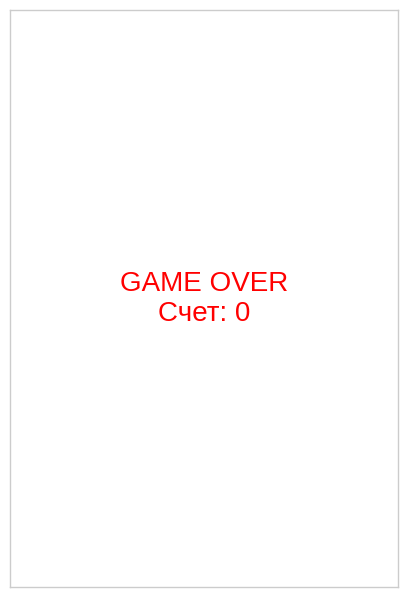

Игра завершена. Финальный счет: 0


In [69]:
# Продолжение ПЛАНА Д1 - Добавляем Препятствия

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import display, clear_output
import time
import random # Для случайной высоты проема

# --- Параметры игры (обновленные) ---
CANVAS_WIDTH = 400
CANVAS_HEIGHT = 600
GRAVITY = 0.6
JUMP_STRENGTH = -10
PLAYER_X_START = 50
PLAYER_Y_START = CANVAS_HEIGHT // 2
PLAYER_WIDTH = 30
PLAYER_HEIGHT = 30
PLAYER_COLOR = 'blue'

OBSTACLE_WIDTH = 60
OBSTACLE_COLOR = 'red'
OBSTACLE_SPEED = 5 # Скорость движения препятствий влево
MIN_GAP_HEIGHT = 120 # Минимальная высота проема
MAX_GAP_HEIGHT = 180 # Максимальная высота проема
OBSTACLE_SPAWN_INTERVAL = 120 # Каждые N кадров новое препятствие (примерно)

GAME_SPEED_SECONDS = 0.05 # Пауза между кадрами
MAX_GAME_FRAMES = 500 # Ограничим игру для примера

# --- Класс Игрока (Дани) - без изменений ---
class Player:
    def __init__(self, x, y, width, height, color):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.color = color
        self.velocity_y = 0

    def jump(self):
        self.velocity_y = JUMP_STRENGTH

    def update(self):
        self.velocity_y += GRAVITY
        self.y += self.velocity_y
        if self.y + self.height > CANVAS_HEIGHT:
            self.y = CANVAS_HEIGHT - self.height
            self.velocity_y = 0
        if self.y < 0:
            self.y = 0
            self.velocity_y = 0
            
    def draw(self, ax):
        player_rect = Rectangle((self.x, self.y), self.width, self.height, color=self.color)
        ax.add_patch(player_rect)

# --- Класс Препятствия ("Вакансия") ---
class Obstacle:
    def __init__(self, x, canvas_height, width, color, speed, min_gap, max_gap):
        self.x = x
        self.canvas_height = canvas_height
        self.width = width
        self.color = color
        self.speed = speed
        
        # Определяем проем
        self.gap_height = random.randint(min_gap, max_gap)
        # Убедимся, что проем не слишком близко к верху или низу
        margin = 30 
        self.gap_y = random.randint(margin, self.canvas_height - self.gap_height - margin)
        
        # Размеры верхнего и нижнего прямоугольников
        self.top_rect_height = self.gap_y
        self.bottom_rect_y = self.gap_y + self.gap_height
        self.bottom_rect_height = self.canvas_height - self.bottom_rect_y

    def update(self):
        self.x -= self.speed

    def draw(self, ax):
        # Верхний прямоугольник
        top_rect = Rectangle((self.x, 0), self.width, self.top_rect_height, color=self.color)
        # Нижний прямоугольник
        bottom_rect = Rectangle((self.x, self.bottom_rect_y), self.width, self.bottom_rect_height, color=self.color)
        ax.add_patch(top_rect)
        ax.add_patch(bottom_rect)

    def is_off_screen(self):
        return self.x + self.width < 0

    def collides_with(self, player):
        # Простая проверка на пересечение прямоугольников (AABB collision)
        # Игрок: player.x, player.y, player.width, player.height
        # Препятствие состоит из двух частей. Проверяем обе.

        # Координаты игрока
        player_left = player.x
        player_right = player.x + player.width
        player_top = player.y
        player_bottom = player.y + player.height

        # 1. Столкновение с ВЕРХНЕЙ частью препятствия
        obs_top_left = self.x
        obs_top_right = self.x + self.width
        obs_top_top = 0 # Верх препятствия начинается с самого верха канваса
        obs_top_bottom = self.top_rect_height # Низ верхней части = начало проема

        if (player_right > obs_top_left and player_left < obs_top_right and
            player_bottom > obs_top_top and player_top < obs_top_bottom):
            return True

        # 2. Столкновение с НИЖНЕЙ частью препятствия
        obs_bottom_left = self.x
        obs_bottom_right = self.x + self.width
        obs_bottom_top = self.bottom_rect_y # Верх нижней части = конец проема
        obs_bottom_bottom = self.canvas_height # Низ нижней части = низ канваса

        if (player_right > obs_bottom_left and player_left < obs_bottom_right and
            player_bottom > obs_bottom_top and player_top < obs_bottom_bottom):
            return True
            
        return False


# --- Инициализация matplotlib ---
fig, ax = plt.subplots(figsize=(5, 7.5))

danya = Player(PLAYER_X_START, PLAYER_Y_START, PLAYER_WIDTH, PLAYER_HEIGHT, PLAYER_COLOR)
obstacles = []
score = 0
frames_since_last_obstacle = 0
game_over = False

# --- Игровой цикл ---
try:
    print("Запуск игры с препятствиями. Нажмите 'Stop' для остановки ячейки.")
    # danya.jump() # Для теста начального прыжка

    for frame_count in range(MAX_GAME_FRAMES):
        if game_over:
            break

        # --- Обработка "ввода" (пока Даня прыгает сам для теста) ---
        # Для RL-агента здесь будет выбор действия
        if frame_count % 70 == 0 and frame_count > 0 : # Примерный прыжок, чтобы было интересно
             if danya.y > CANVAS_HEIGHT / 3: # Прыгаем, если не слишком высоко
                danya.jump()
        # -------------------------------------------------------------

        # 1. Обновляем логику игры
        danya.update()

        # Управление препятствиями
        frames_since_last_obstacle += 1
        if frames_since_last_obstacle >= OBSTACLE_SPAWN_INTERVAL:
            obstacles.append(Obstacle(CANVAS_WIDTH, CANVAS_HEIGHT, OBSTACLE_WIDTH, OBSTACLE_COLOR, OBSTACLE_SPEED, MIN_GAP_HEIGHT, MAX_GAP_HEIGHT))
            frames_since_last_obstacle = 0
        
        active_obstacles = []
        for obs in obstacles:
            obs.update()
            if obs.collides_with(danya):
                game_over = True
                print(f"Столкновение! Игра окончена. Ваш счет: {score}")
                break 
            
            if not obs.is_off_screen():
                active_obstacles.append(obs)
            else:
                # Если препятствие ушло за экран и не было столкновения, значит мы его прошли
                if not game_over: # Убедимся, что очки не начисляются после столкновения
                    score +=1 
        obstacles = active_obstacles
        
        if game_over: # Еще раз проверка, если столкновение произошло внутри цикла по препятствиям
            break

        # 2. Очищаем предыдущий вывод и оси matplotlib
        clear_output(wait=True) 
        ax.cla()                

        # 3. Настраиваем оси заново после cla()
        ax.set_xlim(0, CANVAS_WIDTH)
        ax.set_ylim(0, CANVAS_HEIGHT)
        ax.invert_yaxis() 
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"Даня лавирует! Счет: {score} (Кадр: {frame_count+1})")

        # 4. Рисуем объекты
        danya.draw(ax)
        for obs in obstacles:
            obs.draw(ax)
        
        ax.plot([0, CANVAS_WIDTH], [CANVAS_HEIGHT, CANVAS_HEIGHT], color='grey', linestyle='--') # Земля

        # 5. Отображаем текущий кадр
        display(fig)

        # 6. Пауза
        time.sleep(GAME_SPEED_SECONDS)

except KeyboardInterrupt:
    print("Игра остановлена пользователем.")
finally:
    clear_output(wait=True)
    if game_over:
        ax.cla()
        ax.set_xlim(0, CANVAS_WIDTH)
        ax.set_ylim(0, CANVAS_HEIGHT)
        ax.invert_yaxis() 
        ax.set_xticks([])
        ax.set_yticks([])
        ax.text(CANVAS_WIDTH / 2, CANVAS_HEIGHT / 2, f"GAME OVER\nСчет: {score}", 
                horizontalalignment='center', verticalalignment='center', fontsize=20, color='red')
        display(fig)
        time.sleep(2) # Показать Game Over на пару секунд
    
    plt.close(fig) 
    print(f"Игра завершена. Финальный счет: {score}")


In [43]:
player_wants_to_jump = True

### 4.2. Шаг 2: Готовим игру для RL-агента ("Даня-бот")

Чтобы наш RL-агент мог учиться, ему нужно взаимодействовать с игрой по определенным правилам. Давай определим эти правила:

#### 1. Действия (Actions)

Что может делать наш агент (Даня-бот)? В нашей игре у Дани всего два варианта:
*   **Действие 0: Ничего не делать** (Даня будет продолжать падать под действием гравитации или лететь по текущей траектории).
*   **Действие 1: Прыгнуть** (Вызвать метод `danya.jump()`).

Это простое пространство действий, идеально для начала.

#### 2. Состояние (State)

Это самая важная и сложная часть. Состояние – это та информация об игре, которую агент получает на каждом шаге, чтобы принять решение о следующем действии. Состояние должно быть:
*   **Информативным:** Содержать достаточно данных для принятия осмысленного решения.
*   **Компактным:** Не слишком большим, чтобы обучение не занимало вечность (особенно для табличного Q-learning).
*   **Числовым:** Обычно RL-алгоритмы работают с числами.

Давай определим состояние как набор следующих параметров:

*   **`danya_y`**: Вертикальная позиция Дани (координата Y).
*   **`danya_velocity_y`**: Вертикальная скорость Дани. Это поможет агенту понимать, летит ли Даня вверх или падает, и с какой скоростью.
*   **`horizontal_distance_to_next_obstacle`**: Горизонтальное расстояние от Дани (например, от его правого края) до левого края следующего приближающегося препятствия.
*   **`next_obstacle_gap_y_center`**: Вертикальная координата центра проема в следующем препятствии.
    *   Альтернативно, и часто лучше: **`diff_danya_y_to_gap_center`**: Разница между Y-координатой Дани и Y-координатой центра проема следующего препятствия. Это сразу говорит агенту, нужно ли ему лететь выше или ниже.

**Важно:** Для табличного Q-learning (который мы будем использовать сначала) эти непрерывные значения нужно будет **дискретизировать** (разбить на конечное число "корзин" или "бакетов"). Например:
*   `danya_y` можно разбить на 10-20 интервалов.
*   `danya_velocity_y` на 5-10 интервалов.
*   `horizontal_distance_to_next_obstacle` на 5-10 интервалов.
*   `diff_danya_y_to_gap_center` на 5-10 интервалов.

Произведение количества этих дискретных значений и даст размер нашей Q-таблицы.

**Как найти "следующее препятствие"?** Нам нужно будет в игровом цикле находить то препятствие, которое находится справа от Дани и ближе всего к нему. Если препятствий справа нет, можно использовать какие-то "дефолтные" значения для расстояния и проема (например, очень большое расстояние).

#### 3. Вознаграждение (Reward)

Как мы будем "хвалить" и "ругать" нашего агента?
*   **За выживание:** Небольшое положительное вознаграждение за каждый кадр, пока Даня жив. Например, `+0.1` или `+1`. Это мотивирует агента стараться не умирать.
*   **За столкновение (Game Over):** Большое отрицательное вознаграждение. Например, `-100`. Это главный "кнут".
*   **За успешное прохождение препятствия:** Положительное вознаграждение. Например, `+10` или `+20`. Это можно сделать, когда `obs.x + obs.width < danya.x` (Даня прошел правый край препятствия), как мы уже делали для счета.

Правильный дизайн вознаграждений очень важен для успешного обучения!

#### 4. Эпизод (Episode)

Один эпизод – это одна полная игра, от начала до момента, когда Даня сталкивается с препятствием (game over) или достигается максимальное количество кадров. RL-агент будет учиться, играя множество таких эпизодов.

---

**Что дальше с кодом игры?**

Нам нужно будет немного перестроить наш текущий игровой код, чтобы он стал "RL-средой". Это обычно означает создание класса или набора функций, которые реализуют стандартный интерфейс, похожий на OpenAI Gym (теперь Gymnasium):

1.  **`reset()`**:
    *   Сбрасывает игру в начальное состояние (Даня в стартовой позиции, нет препятствий, счет 0).
    *   Возвращает первое наблюдение (начальное состояние) для агента.

2.  **`step(action)`**:
    *   Принимает на вход действие, выбранное агентом (0 или 1).
    *   Выполняет это действие в игре (Даня прыгает или нет).
    *   Пропускает один кадр игровой логики (движение Дани, движение препятствий, спавн новых, проверка столкновений, подсчет очков).
    *   Рассчитывает вознаграждение за этот шаг.
    *   Определяет, закончился ли эпизод (`done = True` если game over).
    *   Формирует новое состояние (наблюдение) для агента.
    *   Возвращает кортеж: `(новое_состояние, вознаграждение, done, дополнительная_информация)`.

3.  **(Опционально) `render()`**:
    *   Функция для отрисовки текущего состояния игры. Наш текущий цикл отрисовки с `matplotlib` может быть адаптирован для этого. Для быстрого обучения агент может работать без рендеринга на каждом шаге.

Это позволит нам отделить логику RL-агента от логики самой игры.

# 4.2. Шаг 2: Готовим игру для RL-агента (Продолжение: Состояние и Дискретизация)

Итак, мы определили, что наш RL-агент (Даня-бот) будет принимать решения (прыгать или нет) на основе **состояния** игры. Мы выбрали такие параметры для состояния:

1.  **`danya_y`**: Вертикальная позиция Дани.
2.  **`danya_velocity_y`**: Вертикальная скорость Дани.
3.  **`horizontal_distance_to_next_obstacle`**: Горизонтальное расстояние до следующего препятствия.
4.  **`diff_danya_y_to_gap_center`**: Вертикальная разница между Даней и центром проема в следующем препятствии.

Все эти значения – **непрерывные** (могут принимать любое число в некотором диапазоне). Но для нашего первого алгоритма, **табличного Q-learning**, нам нужно **дискретное** пространство состояний. Это значит, что Q-таблица будет хранить значения для конечного числа "типичных" ситуаций.

**Зачем нужна дискретизация?**

Представь, что `danya_y` может быть 300.1, 300.11, 300.111 и так далее – бесконечное множество значений! Мы не можем создать таблицу с бесконечным числом строк. Поэтому мы "огрубляем" непрерывные значения, разбивая их на небольшое количество интервалов или "корзин" (bins).

Например, если `danya_y` меняется от 0 до 600 (высота нашего поля), мы можем разбить этот диапазон на, скажем, 15 интервалов:
*   Интервал 0: Y от 0 до 40
*   Интервал 1: Y от 40 до 80
*   ...
*   Интервал 14: Y от 560 до 600

Теперь, если `danya_y = 75`, он попадает в "корзину" номер 1. Если `danya_y = 580`, он попадает в "корзину" 14.

**Как мы будем это делать? (Процесс настройки)**

1.  **Определить количество "корзин" (`NUM_..._BINS`)** для каждой из четырех компонент нашего состояния. Начнем с разумных значений (например, 10-15).
    *   `NUM_Y_BINS = 15`
    *   `NUM_VY_BINS = 10`
    *   `NUM_DX_BINS = 10`
    *   `NUM_DY_GAP_BINS = 10`

2.  **Определить границы этих "корзин" (`..._BINS`)**. Чтобы сделать это осмысленно, нам нужно понять, в каких реальных диапазонах меняются наши сырые значения состояния во время игры.
    *   Для этого мы запустим нашу игру много раз со *случайным* агентом (который просто прыгает наугад).
    *   Во время этих игр мы будем собирать все значения `danya_y`, `danya_velocity_y` и т.д., которые встречаются.
    *   Затем мы посмотрим на минимальные и максимальные значения, а также на распределение (гистограммы) этих величин.

3.  **Настроить `*_BINS` на основе собранной статистики.** Например, если мы увидели, что `danya_velocity_y` меняется от -12 до +10, то наши бины для скорости должны покрывать этот диапазон. Мы используем `np.linspace(min_val, max_val, num_bins + 1)`, а затем берем срезы `[1:-1]` для `np.digitize`, чтобы получить внутренние границы корзин.

4.  **Реализовать функцию `get_current_state()`**, которая:
    *   Получает "сырые" значения четырех компонент состояния из игры.
    *   Использует `np.digitize(value, bins)` для определения, в какую "корзину" попадает каждое сырое значение.
    *   Возвращает кортеж из четырех *дискретных* чисел (номеров корзин). Например, `(дискретное_y, дискретное_vy, дискретное_dx, дискретное_dy_gap)`. Это и будет нашим состоянием для Q-таблицы.

**Почему это важно?**
*   Если дискретизация **слишком грубая** (мало корзин), агент не сможет различать тонкие, но важные различия в ситуациях. Например, если весь диапазон скоростей падения попадает в одну корзину, агент не поймет, падает он быстро или медленно.
*   Если дискретизация **слишком мелкая** (много корзин), то общее количество уникальных состояний (произведение числа корзин по всем компонентам: `15 * 10 * 10 * 10 = 15000` состояний в нашем примере) станет очень большим. Это значит, что Q-таблица будет огромной, и агенту потребуется очень много времени (эпизодов игры), чтобы "побывать" в каждом состоянии достаточное количество раз и выучить его ценность.

Нахождение правильного баланса в дискретизации – это своего рода искусство и важная часть подготовки данных для табличных RL-методов.

**Давайте посмотрим на код, который поможет нам собрать статистику и затем определить наши бины.**

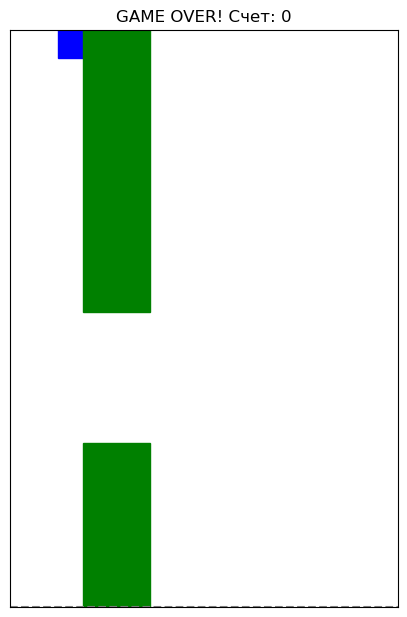

Эпизод 2 завершен на шаге 134. Суммарная награда: -86.6, Счет: 0

Тестирование завершено.


In [45]:
# Модификация игры для RL-агента (на основе Плана Д1)

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import display, clear_output
import time
import random
import numpy as np # Для дискретизации

# --- Параметры игры (остаются похожими) ---
CANVAS_WIDTH = 400
CANVAS_HEIGHT = 600
GRAVITY = 0.7
JUMP_STRENGTH = -12
PLAYER_X_START = 50
PLAYER_Y_START = CANVAS_HEIGHT // 2
PLAYER_WIDTH = 30
PLAYER_HEIGHT = 30
PLAYER_COLOR = 'blue'

OBSTACLE_WIDTH = 70
OBSTACLE_COLOR = 'green'
OBSTACLE_SPEED = 5 # Увеличим скорость для более динамичного обучения
MIN_GAP_HEIGHT = 120
MAX_GAP_HEIGHT = 160 # Немного уменьшим разброс для предсказуемости
OBSTACLE_SPAWN_INTERVAL = 70 # Чаще препятствия

# --- Параметры для RL ---
REWARD_SURVIVE = 0.1  # Награда за каждый шаг выживания
REWARD_PASS_OBSTACLE = 10 # Награда за прохождение препятствия
REWARD_GAME_OVER = -100 # Штраф за столкновение

MAX_FRAMES_PER_EPISODE = 2000 # Ограничение длины эпизода

# --- Глобальные переменные состояния игры (для простоты, без класса среды) ---
danya = None
obstacles = []
score = 0
current_frame_count = 0
game_over_flag = False # Используем флаг вместо глобальной game_over

# Визуализация (matplotlib)
fig_rl, ax_rl = None, None
is_rendering_enabled = True # Флаг для включения/отключения рендеринга
RENDER_SPEED_SECONDS = 0.03 # Скорость рендеринга, если он включен

# --- Классы Player и Obstacle (остаются почти без изменений) ---
class Player:
    def __init__(self, x, y, width, height, color):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.color = color
        self.velocity_y = 0

    def jump(self):
        if self.y > 0: self.velocity_y = JUMP_STRENGTH

    def update(self):
        self.velocity_y += GRAVITY
        self.y += self.velocity_y
        if self.y + self.height > CANVAS_HEIGHT:
            self.y = CANVAS_HEIGHT - self.height; self.velocity_y = 0
        if self.y < 0:
            self.y = 0; self.velocity_y = 0
            
    def draw(self, ax_to_draw_on): # Принимаем оси для рисования
        player_rect = Rectangle((self.x, self.y), self.width, self.height, color=self.color)
        ax_to_draw_on.add_patch(player_rect)

class Obstacle:
    def __init__(self, x, canvas_height, width, color, speed, min_gap, max_gap):
        self.x = x; self.canvas_height = canvas_height; self.width = width
        self.color = color; self.speed = speed; self.passed_by_player = False
        self.gap_height = random.randint(min_gap, max_gap)
        margin = 30
        self.gap_y_top = random.randint(margin, self.canvas_height - self.gap_height - margin) # Y-координата верха проема
        self.gap_y_center = self.gap_y_top + self.gap_height / 2 # Y-координата центра проема
        
        self.top_rect_height = self.gap_y_top
        self.bottom_rect_y = self.gap_y_top + self.gap_height
        self.bottom_rect_height = self.canvas_height - self.bottom_rect_y

    def update(self): self.x -= self.speed
    def is_off_screen(self): return self.x + self.width < 0

    def draw(self, ax_to_draw_on):
        top_rect = Rectangle((self.x, 0), self.width, self.top_rect_height, color=self.color)
        bottom_rect = Rectangle((self.x, self.bottom_rect_y), self.width, self.bottom_rect_height, color=self.color)
        ax_to_draw_on.add_patch(top_rect)
        ax_to_draw_on.add_patch(bottom_rect)

    def collides_with(self, player):
        pl, pr, pt, pb = player.x, player.x + player.width, player.y, player.y + player.height
        otl, otr, ott, otb = self.x, self.x + self.width, 0, self.top_rect_height
        if (pr > otl and pl < otr and pb > ott and pt < otb): return True
        obl, obr, obt, obb = self.x, self.x + self.width, self.bottom_rect_y, self.canvas_height
        if (pr > obl and pl < obr and pb > obt and pt < obb): return True
        return False

# --- Функции для RL-среды ---

def initialize_visualization():
    """Инициализирует или переиспользует фигуру matplotlib для рендеринга."""
    global fig_rl, ax_rl
    if fig_rl is None or not plt.fignum_exists(fig_rl.number): # Если фигуры нет или она была закрыта
        fig_rl, ax_rl = plt.subplots(figsize=(5, 7.5))
    # plt.show(block=False) # Для некоторых бэкендов, чтобы окно появилось, но не блокировало
    # fig_rl.canvas.draw_idle() # Для обновления в некоторых интерактивных бэкендах
    
def render_game_state():
    """Отрисовывает текущее состояние игры, если рендеринг включен."""
    global danya, obstacles, score, current_frame_count, game_over_flag, fig_rl, ax_rl
    
    if not is_rendering_enabled or fig_rl is None:
        return

    clear_output(wait=True) 
    ax_rl.cla() 
    ax_rl.set_xlim(0, CANVAS_WIDTH); ax_rl.set_ylim(0, CANVAS_HEIGHT); ax_rl.invert_yaxis() 
    ax_rl.set_xticks([]); ax_rl.set_yticks([])
    
    title = f"Счет: {score} (Кадр: {current_frame_count})"
    if game_over_flag: title = f"GAME OVER! Счет: {score}"
    ax_rl.set_title(title)

    if danya: danya.draw(ax_rl)
    for obs in obstacles: obs.draw(ax_rl)
    ax_rl.plot([0, CANVAS_WIDTH], [CANVAS_HEIGHT, CANVAS_HEIGHT], color='grey', linestyle='--')
    
    display(fig_rl)
    time.sleep(RENDER_SPEED_SECONDS)

def reset_game():
    """Сбрасывает игру в начальное состояние."""
    global danya, obstacles, score, current_frame_count, game_over_flag
    global frames_since_last_obstacle_rl # Отдельный счетчик для спавна в RL-среде
    
    danya = Player(PLAYER_X_START, PLAYER_Y_START, PLAYER_WIDTH, PLAYER_HEIGHT, PLAYER_COLOR)
    obstacles = []
    score = 0
    current_frame_count = 0
    game_over_flag = False
    frames_since_last_obstacle_rl = 0 # Счетчик для спавна препятствий

    # Спавним первое препятствие чуть дальше для старта
    # obstacles.append(Obstacle(CANVAS_WIDTH + CANVAS_WIDTH //2 , CANVAS_HEIGHT, OBSTACLE_WIDTH, OBSTACLE_COLOR, OBSTACLE_SPEED, MIN_GAP_HEIGHT, MAX_GAP_HEIGHT))
    
    if is_rendering_enabled:
        initialize_visualization() # Убедимся, что окно для рисования готово
        render_game_state()

    return get_current_state()

# Глобальная переменная для отслеживания спавна препятствий в функции step
frames_since_last_obstacle_rl = 0

def get_next_obstacle_info():
    """Находит следующее (ближайшее справа) препятствие и информацию о нем."""
    global danya, obstacles
    next_obs = None
    min_dist = float('inf')

    if not danya: return None, float('inf'), CANVAS_HEIGHT / 2 # Если Дани нет, возвращаем дефолт

    for obs in obstacles:
        # Препятствие должно быть справа от Дани (или его часть пересекает Даню)
        # и быть ближе предыдущего найденного
        # danya.x + danya.width - это правый край Дани
        # obs.x - это левый край препятствия
        distance_to_obstacle_left_edge = obs.x - (danya.x + danya.width)
        
        if distance_to_obstacle_left_edge > -obs.width: # Условие, что препятствие еще не полностью слева от Дани
            if distance_to_obstacle_left_edge < min_dist:
                min_dist = distance_to_obstacle_left_edge
                next_obs = obs
    
    if next_obs:
        # Расстояние от правого края Дани до левого края препятствия
        # Если Даня уже внутри препятствия по X, расстояние может быть отрицательным
        horizontal_distance = next_obs.x - (danya.x + danya.width) 
        gap_y_center = next_obs.gap_y_center
        return next_obs, horizontal_distance, gap_y_center
    else:
        # Если препятствий справа нет, возвращаем большое расстояние и "средний" проем
        return None, CANVAS_WIDTH, CANVAS_HEIGHT / 2 

# --- Дискретизация состояния ---
# Определяем "корзины" (bins) для каждой части состояния
# Эти значения нужно будет тщательно подобрать!
NUM_Y_BINS = 15          # Для danya.y (0 до CANVAS_HEIGHT)
NUM_VY_BINS = 10         # Для danya.velocity_y (примерно от -JUMP_STRENGTH до +2*GRAVITY*несколько_кадров)
NUM_DX_BINS = 10         # Для horizontal_distance_to_next_obstacle (от ~ -OBSTACLE_WIDTH до CANVAS_WIDTH)
NUM_DY_GAP_BINS = 10     # Для diff_danya_y_to_gap_center (от ~ -CANVAS_HEIGHT/2 до +CANVAS_HEIGHT/2)

# Границы для дискретизации (нужно будет настроить под реальные значения в игре)
Y_BINS = np.linspace(0, CANVAS_HEIGHT, NUM_Y_BINS + 1)[1:-1] # Убираем края, чтобы digitize работал как надо
VY_BINS = np.linspace(JUMP_STRENGTH, 15, NUM_VY_BINS + 1)[1:-1] # Примерные границы для скорости
DX_BINS = np.linspace(-OBSTACLE_WIDTH, CANVAS_WIDTH, NUM_DX_BINS + 1)[1:-1]
DY_GAP_BINS = np.linspace(-CANVAS_HEIGHT * 0.75, CANVAS_HEIGHT * 0.75, NUM_DY_GAP_BINS + 1)[1:-1]

def discretize_value(value, bins):
    return int(np.digitize(value, bins))

def get_current_state():
    """Собирает, вычисляет и дискретизирует текущее состояние игры."""
    global danya
    if not danya: # Если игра не инициализирована или Даня еще не создан
        return (0,0,0,0) # Или какое-то другое дефолтное состояние

    danya_y_val = danya.y
    danya_vy_val = danya.velocity_y

    _, hor_dist, gap_y_center = get_next_obstacle_info()
    
    # diff_danya_y_to_gap_center: 
    # Положительное значение - Даня НИЖЕ центра проема (нужно прыгать)
    # Отрицательное значение - Даня ВЫШЕ центра проема
    diff_danya_y_to_gap_val = gap_y_center - (danya_y_val + danya.height / 2)

    # Дискретизация
    s1 = discretize_value(danya_y_val, Y_BINS)
    s2 = discretize_value(danya_vy_val, VY_BINS)
    s3 = discretize_value(hor_dist, DX_BINS)
    s4 = discretize_value(diff_danya_y_to_gap_val, DY_GAP_BINS)
    
    return (s1, s2, s3, s4)

def step(action):
    """Выполняет один шаг игры на основе действия агента."""
    global danya, obstacles, score, current_frame_count, game_over_flag
    global frames_since_last_obstacle_rl # Используем эту переменную

    if game_over_flag: # Если игра уже окончена, ничего не делаем
        # Это важно, чтобы агент не продолжал получать награды/штрафы после конца эпизода
        current_state = get_current_state()
        return current_state, 0, True, {} # Возвращаем текущее состояние, 0 награду, done=True

    current_frame_count += 1
    reward = REWARD_SURVIVE # Награда за выживание на этом шаге

    # 1. Выполняем действие агента
    if action == 1: # Прыжок
        danya.jump()

    # 2. Обновляем состояние игры (логика одного кадра)
    danya.update()

    # Управление препятствиями
    frames_since_last_obstacle_rl += 1
    if frames_since_last_obstacle_rl >= OBSTACLE_SPAWN_INTERVAL:
        obstacles.append(Obstacle(CANVAS_WIDTH, CANVAS_HEIGHT, OBSTACLE_WIDTH, OBSTACLE_COLOR, OBSTACLE_SPEED, MIN_GAP_HEIGHT, MAX_GAP_HEIGHT))
        frames_since_last_obstacle_rl = 0
    
    active_obstacles_next_step = []
    collision_detected = False
    for obs in list(obstacles): 
        obs.update()
        if obs.collides_with(danya):
            collision_detected = True
            # Не выходим из цикла сразу, дадим всем препятствиям обновиться
            # break 
        
        # Начисление очков за прохождение (если еще не засчитано)
        if not obs.passed_by_player and (obs.x + obs.width) < danya.x:
            if not collision_detected: # Не даем награду, если в этот же шаг столкнулись
                 score += 1 # Увеличиваем счет игры
                 reward += REWARD_PASS_OBSTACLE # Добавляем награду агенту
            obs.passed_by_player = True 
        
        if not obs.is_off_screen():
            active_obstacles_next_step.append(obs)
    obstacles = active_obstacles_next_step

    # Проверка на столкновение (после обновления всех препятствий)
    if collision_detected:
        game_over_flag = True
        reward += REWARD_GAME_OVER # Штраф за столкновение
    
    # Проверка на максимальное количество кадров
    if current_frame_count >= MAX_FRAMES_PER_EPISODE:
        game_over_flag = True # Завершаем эпизод, если слишком долго
        # Можно добавить небольшой штраф за "неуспех" или оставить как есть

    # 3. Получаем новое состояние
    next_state = get_current_state()
    
    # 4. Рендеринг (если включен)
    if is_rendering_enabled:
        render_game_state()
        if game_over_flag and fig_rl: # Показать финальный экран и закрыть, если игра окончена
            time.sleep(0.5) # Дать увидеть Game Over
            # plt.close(fig_rl) # Не будем закрывать, пусть агент сам решит, когда новая игра

    return next_state, reward, game_over_flag, {"score": score}


# --- Пример использования среды ---
if __name__ == '__main__': # Этот блок не будет выполняться при импорте, только при прямом запуске файла
    
    print("Тестирование RL-среды...")
    is_rendering_enabled = True # Включим рендеринг для теста
    initialize_visualization()  # Инициализируем окно один раз

    current_episode_reward = 0
    for episode in range(2): # Сыграем пару тестовых эпизодов
        state = reset_game()
        print(f"\nЭпизод {episode + 1}, Начальное состояние: {state}")
        current_episode_reward = 0
        
        for step_num in range(MAX_FRAMES_PER_EPISODE):
            # Агент выбирает случайное действие (0 - ничего, 1 - прыжок)
            action = random.choice([0, 1]) 
            
            next_state, reward, done, info = step(action)
            
            current_episode_reward += reward
            # print(f"Шаг {step_num+1}: Действие={action}, Состояние={next_state}, Награда={reward:.1f}, Счет={info.get('score',0)}, Готово={done}")
            
            state = next_state
            if done:
                print(f"Эпизод {episode + 1} завершен на шаге {step_num + 1}. Суммарная награда: {current_episode_reward:.1f}, Счет: {info.get('score',0)}")
                break
        
        if not done: # Если эпизод закончился по MAX_FRAMES_PER_EPISODE
             print(f"Эпизод {episode + 1} достиг лимита кадров. Суммарная награда: {current_episode_reward:.1f}, Счет: {info.get('score',0)}")


    if fig_rl and plt.fignum_exists(fig_rl.number): # Закрываем окно после всех тестов
         plt.close(fig_rl)
    print("\nТестирование завершено.")


### 4.3. Шаг 3: Учим агента с помощью Q-Learning (наш первый RL-алгоритм!)

Итак, у нас есть игровая среда "Даня лавирует...", которая предоставляет нам:
*   Начальное состояние (`reset_game()`).
*   Возможность выполнить действие и получить результат (`step(action)` -> `новое_состояние, награда, игра_окончена, доп_инфо`).
*   Состояние, представленное в виде кортежа из 4-х дискретных чисел (благодаря нашей настройке бинов!).

Теперь нам нужен "мозг" для Дани – агент, который будет учиться принимать правильные решения. Мы будем использовать один из самых известных и понятных алгоритмов model-free RL – **Q-Learning**.

#### Что такое Q-Learning (супер-просто, на пальцах)?

Представь, что Даня – это ты, и ты хочешь научиться идеально играть в эту игру. Ты мог бы завести себе "шпаргалку" (Q-таблицу).
В этой шпаргалке для **каждой возможной ситуации (состояния)** и для **каждого возможного действия (прыгнуть/не прыгать)** ты бы записывал оценку – насколько "круто" совершить это действие в этой ситуации, чтобы в итоге выиграть (получить максимум очков/наград).

*   **`Q(s, a)`** – это и есть та самая оценка (называется Q-значение или "качество" действия).
    *   `s` – это текущее состояние (наш кортеж из 4 дискретных чисел).
    *   `a` – это действие (0 или 1).
    *   `Q(s, a)` предсказывает **суммарное будущее вознаграждение**, которое мы получим, если, находясь в состоянии `s`, совершим действие `a`, а дальше будем всегда поступать самым лучшим (оптимальным) образом.

**Как агент учит эту Q-таблицу?**
Методом проб и ошибок, обновляя оценки после каждого шага:
1.  Находясь в состоянии `s`, агент выбирает какое-то действие `a`.
2.  Совершает это действие и попадает в новое состояние `s'`, получая при этом мгновенную награду `r`.
3.  Теперь агент смотрит: "Ага, я был в `s`, сделал `a`, получил `r` и оказался в `s'`. А какое самое лучшее Q-значение я мог бы получить из `s'` (то есть `max Q(s', a')` по всем возможным `a'` из `s'`)?"
4.  На основе этой информации он обновляет свою оценку `Q(s, a)` так, чтобы она стала ближе к `r + (некоторый_коэффициент_дисконтирования * max Q(s', a'))`.

Это и есть суть **уравнения Беллмана** для Q-learning, которое мы сейчас запишем.

#### Ключевые параметры Q-Learning:

1.  **Q-таблица (`Q_table`):**
    *   Это многомерный массив (или словарь словарей, если состояния сложные).
    *   Размеры таблицы: `(размер_состояния_1, размер_состояния_2, ..., размер_состояния_N, количество_действий)`.
    *   В нашем случае: `(NUM_Y_BINS, NUM_VY_BINS, NUM_DX_BINS, NUM_DY_GAP_BINS, NUM_ACTIONS=2)`.
        *   *Важно*: `np.digitize` возвращает значения от 0 до `len(bins)`. Если у нас `NUM_Y_BINS` это количество интервалов, то `len(Y_BINS)` (которые `linspace(...)[1:-1]`) равно `NUM_Y_BINS-1`. А `digitize` вернет от `0` до `NUM_Y_BINS-1+1 = NUM_Y_BINS`. Значит, размерности Q-таблицы должны быть `(NUM_Y_BINS+1, NUM_VY_BINS+1, ..., NUM_ACTIONS)`. Либо мы должны убедиться, что `discretize_value` возвращает индекс от 0 до `NUM_..._BINS-1`. Давайте скорректируем `discretize_value` или размеры таблицы.
        *   **Коррекция:** `np.digitize` возвращает индекс от 0 до `len(bins)`. Если `bins` - это `N-1` граница, то получается `N` интервалов. Значит, если у нас `NUM_Y_BINS` - это желаемое число состояний по этой оси, то `Y_BINS` должен иметь `NUM_Y_BINS-1` элементов. `linspace(..., NUM_Y_BINS)` создаст `NUM_Y_BINS` точек, то есть `NUM_Y_BINS-1` интервалов. И `digitize` вернет значения от `0` до `NUM_Y_BINS-1`.
        *   **Давай пересмотрим `discretize_value` и размеры `Q_table`**. Проще всего, если `discretize_value` будет возвращать индекс от `0` до `NUM_..._BINS - 1`. Если `bins` созданы как `np.linspace(min, max, N+1)[1:-1]`, то они имеют `N-1` элементов. `np.digitize` вернет от `0` до `N-1`. Тогда размер Q-таблицы будет `(N_y, N_vy, N_dx, N_dy_gap, N_actions)`. Это нужно будет проверить при инициализации Q-таблицы.

2.  **Скорость обучения (Learning Rate, `alpha`, `α`):**
    *   Число от 0 до 1. Определяет, насколько сильно мы обновляем Q-значение на основе новой информации.
    *   `α = 0`: агент ничему не учится (старые значения не меняются).
    *   `α = 1`: агент полностью доверяет новой информации, забывая старую.
    *   Обычно начинают с `α` около 0.1 - 0.5.

3.  **Коэффициент дисконтирования (Discount Factor, `gamma`, `γ`):**
    *   Число от 0 до 1. Определяет важность будущих наград по сравнению с текущими.
    *   `γ = 0`: агент "близорук", ему важна только мгновенная награда.
    *   `γ` близко к 1 (например, 0.9, 0.99): агент "дальновиден", он ценит будущие награды.
    *   Для нашей игры, где важны долгосрочные последствия, `γ` должен быть достаточно высоким.

4.  **Эпсилон (Epsilon, `ε`) для ε-жадной стратегии (Epsilon-Greedy Strategy):**
    *   Число от 0 до 1. Используется для баланса между **исследованием (Exploration)** и **использованием знаний (Exploitation)**.
    *   **Exploitation:** Агент выбирает действие, которое, по его текущей Q-таблице, является наилучшим (`argmax Q(s,a)`).
    *   **Exploration:** Агент выбирает случайное действие, чтобы попробовать что-то новое и, возможно, найти еще лучшие пути, о которых он пока не знает.
    *   **ε-жадная стратегия:**
        *   С вероятностью `ε` агент выбирает случайное действие (исследует).
        *   С вероятностью `1-ε` агент выбирает лучшее известное действие (использует знания).
    *   Обычно `ε` начинают с большого значения (например, 1.0, т.е. полное исследование) и постепенно уменьшают его со временем (decaying epsilon), чтобы агент сначала много исследовал, а потом, набравшись опыта, больше использовал свои знания.


#### Формула обновления Q-Learning:

Вот она, магическая формула, которая лежит в основе Q-обучения:

`Q_new(s, a) = Q_old(s, a) + α * [r + γ * max_a' Q(s', a') - Q_old(s, a)]`

Где:
*   `Q_new(s, a)` – новое, обновленное Q-значение для пары (состояние `s`, действие `a`).
*   `Q_old(s, a)` – старое Q-значение для этой же пары.
*   `α` – скорость обучения.
*   `r` – награда, полученная после совершения действия `a` в состоянии `s` и перехода в `s'`.
*   `γ` – коэффициент дисконтирования.
*   `s'` – новое состояние, в которое агент попал.
*   `max_a' Q(s', a')` – максимальное Q-значение, которое можно получить из нового состояния `s'`, выбрав наилучшее из всех возможных там действий `a'`. Это оценка будущего вознаграждения.
*   Выражение `[r + γ * max_a' Q(s', a') - Q_old(s, a)]` называется **TD-ошибка (Temporal Difference error)**. Она показывает разницу между "ожидаемым" значением (на основе новой информации) и старым значением. Мы корректируем `Q_old` в сторону уменьшения этой ошибки.

#### Процесс обучения (алгоритм):

1.  **Инициализировать Q-таблицу.** Обычно ее заполняют нулями или небольшими случайными значениями.
2.  **Цикл по большому количеству эпизодов (игр):**
            a.  **Начать новый эпизод:** Сбросить игру в начальное состояние `s` (с помощью `reset_game()`).
            b.  **Цикл по шагам внутри эпизода (пока игра не окончена):**
                i.  **Выбрать действие `a`:** Используя ε-жадную стратегию на основе текущей Q-таблицы для состояния `s`.
                ii. **Совершить действие `a`:** Получить от среды новое состояние `s'`, награду `r` и флаг `done` (игра окончена?) (с помощью `step(a)`).
                iii. **Обновить Q-таблицу:** Используя формулу обновления Q-Learning для `Q(s, a)`.
                iv. **Перейти в новое состояние:** `s = s'`.
                v.  Если `done = True`, завершить текущий эпизод.
            c.  **(Опционально) Уменьшить `ε`** (epsilon decay), чтобы со временем агент больше использовал знания.

Этот процесс повторяется много-много раз, и Q-таблица постепенно наполняется все более точными оценками "качества" действий в разных состояниях.

---
**Давай теперь напишем код для Q-learning агента!**

Нам понадобится:
*   Инициализировать Q-таблицу (с учетом правильных размеров, полученных от нашей дискретизации).
*   Реализовать ε-жадную стратегию для выбора действия.
*   Написать основной цикл обучения.

Размер Q-таблицы: (15, 10, 10, 10, 2)
Примерные границы для Y (используется 14 границ): [ 42.85714286  85.71428571 128.57142857] ... [514.28571429 557.14285714 600.        ]

--- Начало обучения Q-Learning (10000 эпизодов) ---
Alpha=0.1, Gamma=0.99, Epsilon_start=1.00, Decay=0.9995, Min_Epsilon=0.01
Эпизод: 100/10000, Epsilon: 0.951, Средняя награда (100 эп.): -86.60, Последняя награда: -86.60, Счет в посл. игре: 0
Эпизод: 200/10000, Epsilon: 0.905, Средняя награда (100 эп.): -86.60, Последняя награда: -86.60, Счет в посл. игре: 0
Эпизод: 300/10000, Epsilon: 0.861, Средняя награда (100 эп.): -86.60, Последняя награда: -86.60, Счет в посл. игре: 0
Эпизод: 400/10000, Epsilon: 0.819, Средняя награда (100 эп.): -86.60, Последняя награда: -86.60, Счет в посл. игре: 0
Эпизод: 500/10000, Epsilon: 0.779, Средняя награда (100 эп.): -86.60, Последняя награда: -86.60, Счет в посл. игре: 0
Эпизод: 600/10000, Epsilon: 0.741, Средняя награда (100 эп.): -86.60, Последняя награда: -86.60, Счет в посл.

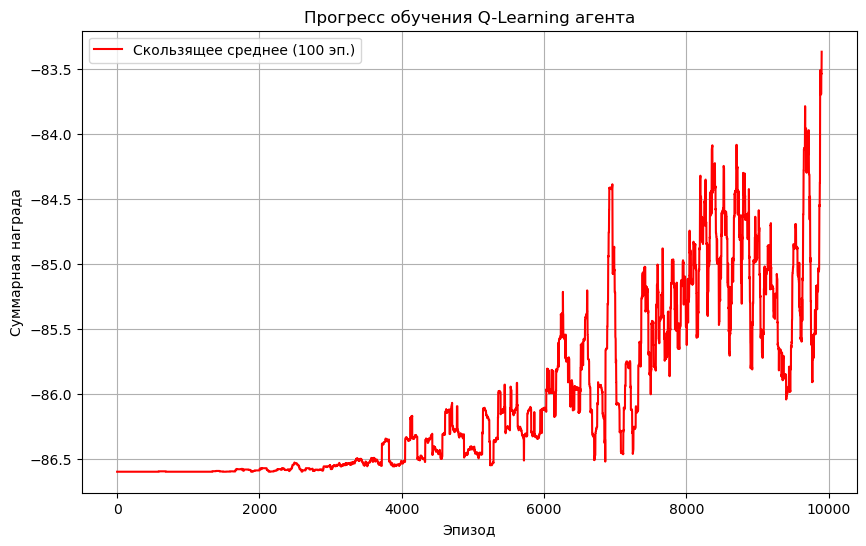

In [46]:
# ... (Код игры и предыдущие определения остаются) ...

# --- Дискретизация состояния (Обновленная версия) ---
# NUM_..._BINS - это количество дискретных состояний по каждой оси.
# Индексы будут от 0 до NUM_..._BINS - 1.

NUM_Y_BINS = 15        
NUM_VY_BINS = 10       
NUM_DX_BINS = 10         
NUM_DY_GAP_BINS = 10   
NUM_ACTIONS = 2 # 0 - ничего, 1 - прыжок

# Границы для дискретизации (ЭТИ ЗНАЧЕНИЯ ВЫ ДОЛЖНЫ БЫЛИ НАСТРОИТЬ ПОСЛЕ СБОРА СТАТИСТИКИ!)
# Здесь я оставлю примерные, основанные на предыдущих предположениях.
# Y_BINS_BOUNDS будут содержать NUM_Y_BINS-1 границ, разделяющих NUM_Y_BINS интервалов.
Y_BINS_BOUNDS = np.linspace(0, CANVAS_HEIGHT, NUM_Y_BINS)[1:] # NUM_Y_BINS точек -> NUM_Y_BINS-1 интервалов, берем верхние границы
VY_BINS_BOUNDS = np.linspace(JUMP_STRENGTH * 1.2, 15, NUM_VY_BINS)[1:] # (min_vy, max_vy, N_vy_bins)
DX_BINS_BOUNDS = np.linspace(-OBSTACLE_WIDTH * 0.5, CANVAS_WIDTH * 0.8, NUM_DX_BINS)[1:] # (min_dx, max_dx, N_dx_bins)
DY_GAP_BINS_BOUNDS = np.linspace(-CANVAS_HEIGHT * 0.6, CANVAS_HEIGHT * 0.6, NUM_DY_GAP_BINS)[1:] # (min_dy_gap, max_dy_gap, N_dy_gap_bins)

# Важно: np.digitize(val, bins) вернет индекс i, если bins[i-1] <= val < bins[i]
# Если val < bins[0], вернет 0. Если val >= bins[-1], вернет len(bins).
# Нам нужны индексы от 0 до NUM_..._BINS - 1.
# Если Y_BINS_BOUNDS имеет NUM_Y_BINS-1 элементов, то digitize вернет от 0 до NUM_Y_BINS-1. Это то, что нужно.

def discretize_value(value, bins_boundaries):
    """Преобразует непрерывное значение в индекс дискретной корзины от 0 до len(bins_boundaries)."""
    # bins_boundaries - это массив N-1 границ, разделяющих N состояний (корзин)
    # np.digitize вернет индекс от 0 (если value < bins[0]) 
    # до len(bins_boundaries) (если value >= bins_boundaries[-1])
    # Это даст нам NUM_..._BINS возможных значений (от 0 до NUM_..._BINS-1), если value внутри диапазона.
    # Если value выходит за пределы, оно попадет в 0 или len(bins_boundaries).
    # Убедимся, что мы не выходим за пределы [0, NUM_..._BINS - 1]
    
    # Пример: если NUM_Y_BINS = 15, то Y_BINS_BOUNDS будет иметь 14 элементов.
    # np.digitize(value, Y_BINS_BOUNDS) вернет значения от 0 до 14. Это как раз 15 состояний.
    discretized = np.digitize(value, bins_boundaries)
    return discretized


# get_current_state() будет использовать эти новые *_BINS_BOUNDS
# (определение get_current_state из предыдущего шага должно быть здесь, оно уже использует *_BINS)
# Убедись, что в get_current_state используются Y_BINS_BOUNDS, VY_BINS_BOUNDS и т.д.
# Имена переменных в get_current_state должны соответствовать:
# s1 = discretize_value(danya_y_val, Y_BINS_BOUNDS)
# s2 = discretize_value(danya_vy_val, VY_BINS_BOUNDS)
# s3 = discretize_value(hor_dist_val, DX_BINS_BOUNDS)
# s4 = discretize_value(diff_danya_y_to_gap_val, DY_GAP_BINS_BOUNDS)

# --- Q-Learning Агент ---

# Гиперпараметры для Q-Learning
ALPHA = 0.1       # Скорость обучения
GAMMA = 0.99      # Коэффициент дисконтирования
EPSILON = 1.0     # Начальное значение эпсилон для exploración
EPSILON_DECAY = 0.9995 # Коэффициент уменьшения эпсилон (1.0 = нет уменьшения)
MIN_EPSILON = 0.01 # Минимальное значение эпсилон

NUM_EPISODES_TRAIN = 10000 # Количество эпизодов для обучения

# Инициализация Q-таблицы
# Размеры: (состояния_Y, состояния_Vy, состояния_Dx, состояния_Dy_gap, кол-во_действий)
# Поскольку discretize_value теперь возвращает от 0 до NUM_..._BINS-1 (если значение внутри диапазона),
# то и размеры должны быть соответствующими.
# Если Y_BINS_BOUNDS содержит NUM_Y_BINS-1 границ, то digitize вернет значения от 0 до NUM_Y_BINS-1.
# Значит, размерность по Y будет NUM_Y_BINS.
q_table_shape = (NUM_Y_BINS, NUM_VY_BINS, NUM_DX_BINS, NUM_DY_GAP_BINS, NUM_ACTIONS)
q_table = np.zeros(q_table_shape)
# Альтернативно, можно инициализировать небольшими случайными значениями для оптимизма:
# q_table = np.random.uniform(low=-1, high=0, size=q_table_shape)

print(f"Размер Q-таблицы: {q_table.shape}")
print(f"Примерные границы для Y (используется {len(Y_BINS_BOUNDS)} границ): {Y_BINS_BOUNDS[:3]} ... {Y_BINS_BOUNDS[-3:]}")
# Добавь аналогичные print для других BINS_BOUNDS, чтобы проверить их содержимое.


def choose_action(state, current_epsilon):
    """Выбирает действие с использованием epsilon-greedy стратегии."""
    if random.uniform(0, 1) < current_epsilon:
        return random.choice([0, 1]) # Случайное действие (исследование)
    else:
        # Выбираем лучшее действие на основе Q-таблицы
        # Q-значения для текущего состояния state: q_table[state[0], state[1], state[2], state[3], :]
        # или проще: q_table[state]
        return np.argmax(q_table[state]) # Жадное действие (использование)

# --- Цикл обучения ---
rewards_per_episode = [] # Для отслеживания прогресса
current_epsilon = EPSILON

# Перед циклом обучения, убедись, что initialize_visualization() вызывается, если рендеринг нужен
# initialize_visualization() # Если хочешь смотреть на первые/последние эпизоды
is_rendering_enabled = False # Обычно отключаем рендеринг во время длительного обучения

print(f"\n--- Начало обучения Q-Learning ({NUM_EPISODES_TRAIN} эпизодов) ---")
print(f"Alpha={ALPHA}, Gamma={GAMMA}, Epsilon_start={EPSILON:.2f}, Decay={EPSILON_DECAY}, Min_Epsilon={MIN_EPSILON}")

for episode in range(NUM_EPISODES_TRAIN):
    state = reset_game() # Получаем начальное дискретное состояние
    
    episode_reward = 0
    done = False
    
    # Включение рендеринга для некоторых эпизодов (например, каждый 1000-й или последние несколько)
    # if episode % 1000 == 0 or episode >= NUM_EPISODES_TRAIN - 10:
    #     is_rendering_enabled = True
    #     if is_rendering_enabled and (fig_rl is None or not plt.fignum_exists(fig_rl.number)):
    #         initialize_visualization()
    # else:
    #     is_rendering_enabled = False


    for step_count in range(MAX_FRAMES_PER_EPISODE):
        action = choose_action(state, current_epsilon)
        next_state, reward, done, info = step(action)
        
        episode_reward += reward
        
        # Обновление Q-таблицы
        old_q_value = q_table[state][action]
        # Находим max Q для следующего состояния
        # q_table[next_state[0], next_state[1], next_state[2], next_state[3], :]
        next_max_q = np.max(q_table[next_state]) 
        
        # Формула Q-Learning
        new_q_value = old_q_value + ALPHA * (reward + GAMMA * next_max_q - old_q_value)
        q_table[state][action] = new_q_value
        
        state = next_state
        
        if done:
            break
            
    rewards_per_episode.append(episode_reward)
    
    # Уменьшаем эпсилон (epsilon decay)
    current_epsilon = max(MIN_EPSILON, current_epsilon * EPSILON_DECAY)
    
    if (episode + 1) % 100 == 0: # Печатаем прогресс каждые 100 эпизодов
        avg_reward_last_100 = np.mean(rewards_per_episode[-100:])
        print(f"Эпизод: {episode + 1}/{NUM_EPISODES_TRAIN}, "
              f"Epsilon: {current_epsilon:.3f}, "
              f"Средняя награда (100 эп.): {avg_reward_last_100:.2f}, "
              f"Последняя награда: {episode_reward:.2f}, "
              f"Счет в посл. игре: {info.get('score',0)}")

print("--- Обучение завершено ---")

# Построим график наград по эпизодам, чтобы увидеть прогресс обучения
if plt:
    plt.figure(figsize=(10, 6))
    # plt.plot(rewards_per_episode, alpha=0.7, label="Награда за эпизод")
    # Для сглаживания можно построить скользящее среднее
    moving_avg_rewards = np.convolve(rewards_per_episode, np.ones(100)/100, mode='valid')
    plt.plot(moving_avg_rewards, color='red', label="Скользящее среднее (100 эп.)")
    plt.xlabel("Эпизод")
    plt.ylabel("Суммарная награда")
    plt.title("Прогресс обучения Q-Learning агента")
    plt.legend()
    plt.grid(True)
    plt.show()

# Теперь можно протестировать обученного агента (с epsilon = 0)
# (Код для тестирования добавим позже)

In [47]:
Агент пока не научился играть хорошо. Это ожидаемо для первых 10000 эпизодов, особенно если задача нетривиальна или параметры не идеально настроены.
Плато на уровне -86.6: Если средняя награда долгое время не улучшается, это может указывать на несколько вещей:
Недостаточно эпизодов: Для такой Q-таблицы 10000 эпизодов может быть мало. Иногда требуются десятки или сотни тысяч.
Проблемы с гиперпараметрами (ALPHA, GAMMA, EPSILON_DECAY):
ALPHA (0.1): Возможно, нормальная. Если слишком маленькая, учится медленно. Если слишком большая, Q-значения могут "скакать" и не сходиться.
GAMMA (0.99): Высокая, что хорошо для дальновидности.
EPSILON_DECAY (0.9995): Довольно стандартный. Эпсилон падает до ~0.006 через 10000 шагов 0.9995^10000. (Хотя у нас он уменьшается за эпизод, а не за шаг, но тем не менее). К 10000-му эпизоду эпсилон стал 0.01 (достиг MIN_EPSILON). Это значит, что к концу обучения агент почти всегда выбирал жадное действие.
Неоптимальная дискретизация состояния: Это очень частая причина. Если состояния "склеиваются" неправильно, агент не может выучить нужные зависимости.
Ты уверен, что *_BINS_BOUNDS были хорошо настроены после сбора статистики? Если они слишком грубые или не покрывают важные диапазоны, это проблема.
Неоптимальная структура вознаграждений:
REWARD_SURVIVE = 0.1: Может быть, маловато, чтобы мотивировать долго жить до того, как он научится проходить препятствия.
REWARD_PASS_OBSTACLE = 10: Это хорошо.
REWARD_GAME_OVER = -100: Сильный штраф, это тоже хорошо.
Сложность самой задачи: Flappy Bird-подобные игры могут быть довольно сложны для табличного Q-learning из-за необходимости точного тайминга и предсказания.

SyntaxError: invalid syntax (2435775773.py, line 1)

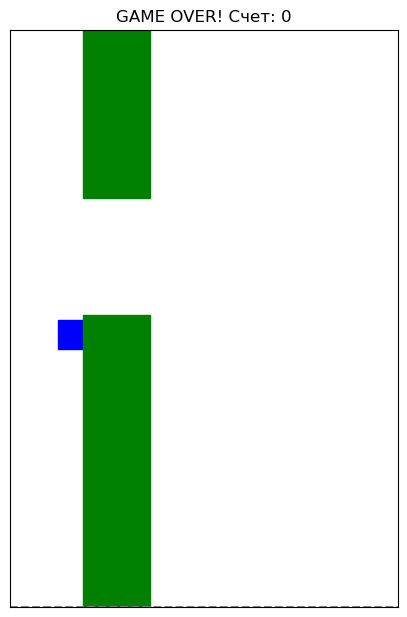

Тестовый Эпизод 10: Награда=-86.60, Счет=0

Средняя награда за 10 тестовых эпизодов: -81.47
Средний счет за 10 тестовых эпизодов: 0.30


In [48]:
# --- Тестирование обученного агента ---
print("\n--- Тестирование обученного агента ---")
num_test_episodes = 10
is_rendering_enabled = True # Включим рендеринг
if is_rendering_enabled and (fig_rl is None or not plt.fignum_exists(fig_rl.number)):
    initialize_visualization()

total_test_reward = 0
total_test_score = 0

for episode in range(num_test_episodes):
    state = reset_game()
    episode_reward = 0
    done = False
    
    print(f"\nТестовый Эпизод {episode + 1}")
    if is_rendering_enabled: time.sleep(1) # Пауза перед началом

    for step_count in range(MAX_FRAMES_PER_EPISODE):
        action = choose_action(state, 0.0) # EPSILON = 0 для жадного выбора
        next_state, reward, done, info = step(action)
        
        episode_reward += reward
        state = next_state
        
        if done:
            break
    
    total_test_reward += episode_reward
    total_test_score += info.get('score',0)
    print(f"Тестовый Эпизод {episode + 1}: Награда={episode_reward:.2f}, Счет={info.get('score',0)}")
    if is_rendering_enabled: time.sleep(1) # Пауза после эпизода

avg_test_reward = total_test_reward / num_test_episodes
avg_test_score = total_test_score / num_test_episodes
print(f"\nСредняя награда за {num_test_episodes} тестовых эпизодов: {avg_test_reward:.2f}")
print(f"Средний счет за {num_test_episodes} тестовых эпизодов: {avg_test_score:.2f}")

if fig_rl and plt.fignum_exists(fig_rl.number) and is_rendering_enabled:
     plt.close(fig_rl)

Запущен сбор статистики на 100 эпизодах...
Статистика: эпизод 10/100 завершен.
Статистика: эпизод 20/100 завершен.
Статистика: эпизод 30/100 завершен.
Статистика: эпизод 40/100 завершен.
Статистика: эпизод 50/100 завершен.
Статистика: эпизод 60/100 завершен.
Статистика: эпизод 70/100 завершен.
Статистика: эпизод 80/100 завершен.
Статистика: эпизод 90/100 завершен.
Статистика: эпизод 100/100 завершен.
Сбор статистики завершен.

--- Анализ собранных сырых значений состояния ---
Danya Y (верт. позиция): min=0.0, max=338.5, mean=60.3
Danya Vy (верт. скорость): min=-11.3, max=10.5, mean=-3.2
Horiz. Dist (гориз. расст. до препятствия): min=0.0, max=375.0, mean=187.5
Diff Y to Gap (верт. разница до центра проема): min=-223.0, max=477.5, mean=219.3

--- Гистограммы распределений сырых значений ---


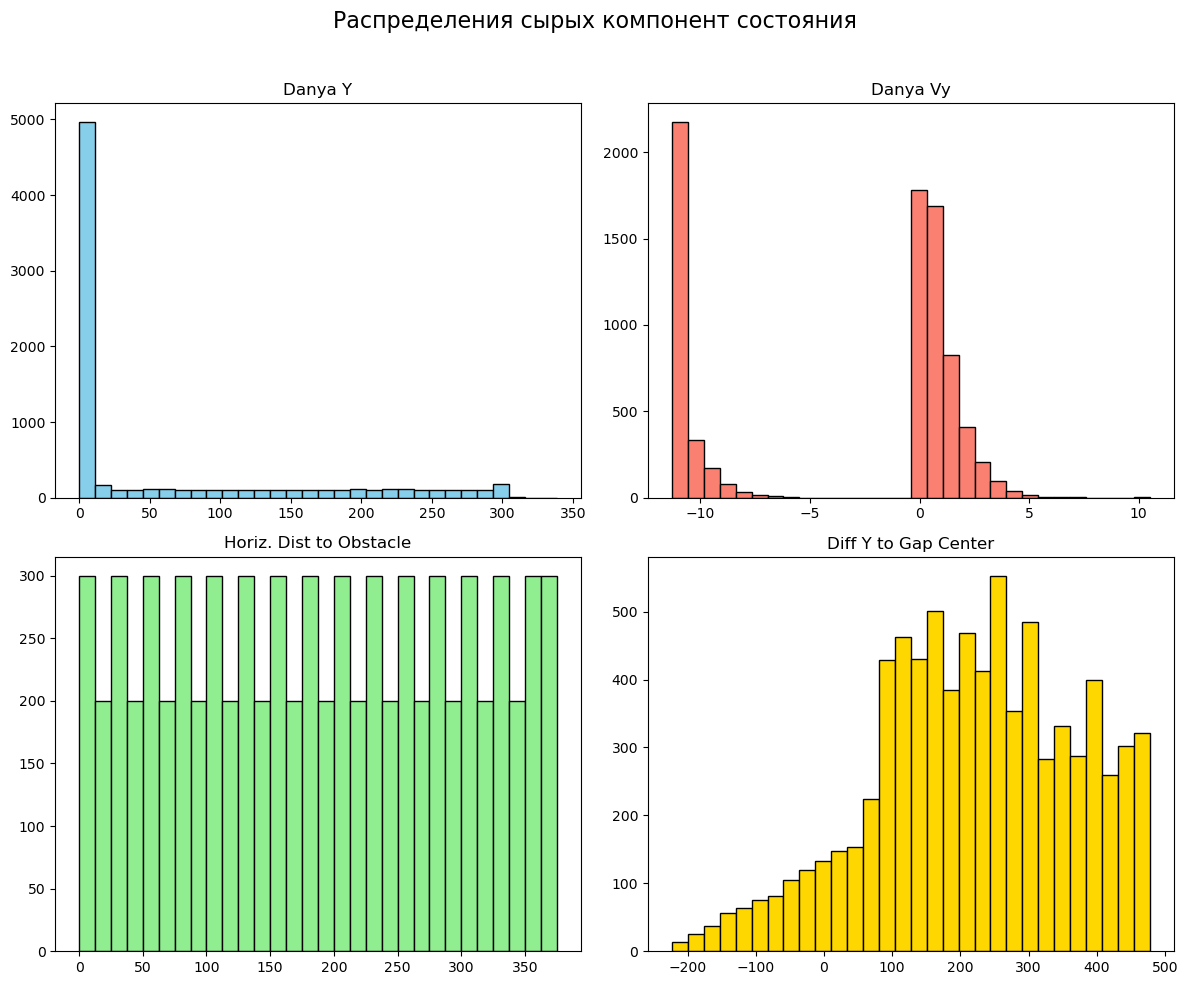


--- РЕКОМЕНДАЦИИ ПО НАСТРОЙКЕ *_BINS_BOUNDS в основном коде Q-Learning ---
Теперь, на основе выведенных min/max и гистограмм, вам нужно обновить
переменные Y_BINS_BOUNDS, VY_BINS_BOUNDS, DX_BINS_BOUNDS, DY_GAP_BINS_BOUNDS
в ячейке с кодом для Q-Learning агента. Возьмите min/max из вывода выше,
немного расширьте их (например, +- 5-10% или на несколько единиц),
и используйте их в np.linspace(min_расшир, max_расшир, NUM_..._BINS)[1:].
Пример (используйте СВОИ значения!):
# VY_BINS_BOUNDS = np.linspace(-12.3, 11.5, NUM_VY_BINS)[1:]


In [49]:
# ШАГ ПЕРЕД Q-LEARNING: СБОР СТАТИСТИКИ ДЛЯ НАСТРОЙКИ БИНОВ

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import display, clear_output
import time
import random
import numpy as np

# --- Параметры игры (копируем из основного блока) ---
CANVAS_WIDTH = 400; CANVAS_HEIGHT = 600; GRAVITY = 0.7; JUMP_STRENGTH = -12
PLAYER_X_START = 50; PLAYER_Y_START = CANVAS_HEIGHT // 2; PLAYER_WIDTH = 30; PLAYER_HEIGHT = 30
PLAYER_COLOR = 'blue'; OBSTACLE_WIDTH = 70; OBSTACLE_COLOR = 'green'; OBSTACLE_SPEED = 5
MIN_GAP_HEIGHT = 120; MAX_GAP_HEIGHT = 160; OBSTACLE_SPAWN_INTERVAL = 70
MAX_FRAMES_PER_EPISODE = 2000 # Можно уменьшить для быстрого сбора статистики, например, до 500

# --- Глобальные переменные игры ---
danya = None; obstacles = []; score = 0; current_frame_count = 0
game_over_flag = False; frames_since_last_obstacle_rl = 0

# --- Классы Player и Obstacle (копируем из основного блока) ---
class Player:
    def __init__(self, x, y, width, height, color):
        self.x = x; self.y = y; self.width = width; self.height = height
        self.color = color; self.velocity_y = 0
    def jump(self):
        if self.y > 0: self.velocity_y = JUMP_STRENGTH
    def update(self):
        self.velocity_y += GRAVITY; self.y += self.velocity_y
        if self.y + self.height > CANVAS_HEIGHT: self.y = CANVAS_HEIGHT - self.height; self.velocity_y = 0
        if self.y < 0: self.y = 0; self.velocity_y = 0
    # draw не нужен для сбора статистики без рендеринга

class Obstacle:
    def __init__(self, x, canvas_height, width, color, speed, min_gap, max_gap):
        self.x = x; self.canvas_height = canvas_height; self.width = width
        self.color = color; self.speed = speed; self.passed_by_player = False
        self.gap_height = random.randint(min_gap, max_gap)
        margin = 30
        self.gap_y_top = random.randint(margin, self.canvas_height - self.gap_height - margin)
        self.gap_y_center = self.gap_y_top + self.gap_height / 2
        self.top_rect_height = self.gap_y_top
        self.bottom_rect_y = self.gap_y_top + self.gap_height
        self.bottom_rect_height = self.canvas_height - self.bottom_rect_y
    def update(self): self.x -= self.speed
    def is_off_screen(self): return self.x + self.width < 0
    # draw не нужен
    def collides_with(self, player): # Упростим, т.к. это только для симуляции
        pl, pr, pt, pb = player.x, player.x + player.width, player.y, player.y + player.height
        otl, otr, ott, otb = self.x, self.x + self.width, 0, self.top_rect_height
        if (pr > otl and pl < otr and pb > ott and pt < otb): return True
        obl, obr, obt, obb = self.x, self.x + self.width, self.bottom_rect_y, self.canvas_height
        if (pr > obl and pl < obr and pb > obt and pt < obb): return True
        return False

# --- Функции для симуляции игры (упрощенные, без RL логики и дискретизации) ---
def reset_game_for_stats():
    global danya, obstacles, score, current_frame_count, game_over_flag, frames_since_last_obstacle_rl
    danya = Player(PLAYER_X_START, PLAYER_Y_START, PLAYER_WIDTH, PLAYER_HEIGHT, PLAYER_COLOR)
    obstacles = []; score = 0; current_frame_count = 0; game_over_flag = False
    frames_since_last_obstacle_rl = OBSTACLE_SPAWN_INTERVAL // 2
    obstacles.append(Obstacle(CANVAS_WIDTH + OBSTACLE_WIDTH, CANVAS_HEIGHT, OBSTACLE_WIDTH, OBSTACLE_COLOR, OBSTACLE_SPEED, MIN_GAP_HEIGHT, MAX_GAP_HEIGHT))
    # Возвращать ничего не нужно, т.к. мы будем брать данные из глобальных переменных

def get_next_obstacle_info_for_stats(): # Копия get_next_obstacle_info
    global danya, obstacles
    next_obs = None; min_dist_to_left_edge = float('inf')
    if not danya: return None, CANVAS_WIDTH, CANVAS_HEIGHT / 2
    for obs in obstacles:
        distance_to_obs_left_edge = obs.x - danya.x
        if obs.x + obs.width > danya.x:
            if distance_to_obs_left_edge < min_dist_to_left_edge :
                min_dist_to_left_edge = distance_to_obs_left_edge
                next_obs = obs
    if next_obs:
        horizontal_distance = next_obs.x - (danya.x + danya.width)
        return next_obs, horizontal_distance, next_obs.gap_y_center
    else:
        return None, CANVAS_WIDTH, CANVAS_HEIGHT / 2

def step_for_stats(action): # Упрощенный step
    global danya, obstacles, score, current_frame_count, game_over_flag, frames_since_last_obstacle_rl
    if game_over_flag: return True # Просто возвращаем done
    current_frame_count += 1
    if action == 1: danya.jump()
    danya.update()
    frames_since_last_obstacle_rl += 1
    if frames_since_last_obstacle_rl >= OBSTACLE_SPAWN_INTERVAL:
        obstacles.append(Obstacle(CANVAS_WIDTH, CANVAS_HEIGHT, OBSTACLE_WIDTH, OBSTACLE_COLOR, OBSTACLE_SPEED, MIN_GAP_HEIGHT, MAX_GAP_HEIGHT))
        frames_since_last_obstacle_rl = 0
    active_obstacles_next_step = []; collision_detected = False
    for obs in list(obstacles): 
        obs.update()
        if obs.collides_with(danya): collision_detected = True
        # Упрощенный подсчет очков или без него для сбора статистики
        if not obs.is_off_screen(): active_obstacles_next_step.append(obs)
    obstacles = active_obstacles_next_step
    if collision_detected: game_over_flag = True
    if current_frame_count >= MAX_FRAMES_PER_EPISODE: game_over_flag = True
    return game_over_flag


# --- Сбор статистики ---
raw_y_collected = []
raw_vy_collected = []
raw_dx_collected = []
raw_dy_gap_collected = []

num_episodes_for_stats = 100 # Уменьшим для быстрого прогона, но лучше 500-1000
print(f"Запущен сбор статистики на {num_episodes_for_stats} эпизодах...")

for episode in range(num_episodes_for_stats):
    reset_game_for_stats() 
    
    for step_num in range(MAX_FRAMES_PER_EPISODE):
        # Собираем сырые значения перед действием (или после, но консистентно)
        if danya: 
            raw_y_collected.append(danya.y)
            raw_vy_collected.append(danya.velocity_y)
            
            _, hor_dist_raw, gap_y_center_raw = get_next_obstacle_info_for_stats()
            # Не собираем "дефолтные" значения, когда нет препятствий
            if hor_dist_raw < CANVAS_WIDTH * 0.95 : # Если препятствие достаточно близко
                 raw_dx_collected.append(hor_dist_raw)
            
            # danya.y + danya.height / 2 - это центр Дани по Y
            diff_danya_y_to_gap_raw = gap_y_center_raw - (danya.y + danya.height / 2)
            raw_dy_gap_collected.append(diff_danya_y_to_gap_raw)

        action = random.choice([0, 1]) # Агент действует случайно
        done = step_for_stats(action)   
        if done:
            break
    if (episode + 1) % (num_episodes_for_stats // 10 if num_episodes_for_stats >=10 else 1) == 0:
        print(f"Статистика: эпизод {episode + 1}/{num_episodes_for_stats} завершен.")
            
print("Сбор статистики завершен.\n")

# Анализируем собранные значения
print("--- Анализ собранных сырых значений состояния ---")
stats_text = []
if raw_y_collected: 
    min_val, max_val, mean_val = np.min(raw_y_collected), np.max(raw_y_collected), np.mean(raw_y_collected)
    stats_text.append(f"Danya Y (верт. позиция): min={min_val:.1f}, max={max_val:.1f}, mean={mean_val:.1f}")
if raw_vy_collected: 
    min_val, max_val, mean_val = np.min(raw_vy_collected), np.max(raw_vy_collected), np.mean(raw_vy_collected)
    stats_text.append(f"Danya Vy (верт. скорость): min={min_val:.1f}, max={max_val:.1f}, mean={mean_val:.1f}")
if raw_dx_collected: 
    min_val, max_val, mean_val = np.min(raw_dx_collected), np.max(raw_dx_collected), np.mean(raw_dx_collected)
    stats_text.append(f"Horiz. Dist (гориз. расст. до препятствия): min={min_val:.1f}, max={max_val:.1f}, mean={mean_val:.1f}")
else:
    stats_text.append("Horiz. Dist: нет данных (возможно, препятствия не появлялись или фильтровались)")
if raw_dy_gap_collected: 
    min_val, max_val, mean_val = np.min(raw_dy_gap_collected), np.max(raw_dy_gap_collected), np.mean(raw_dy_gap_collected)
    stats_text.append(f"Diff Y to Gap (верт. разница до центра проема): min={min_val:.1f}, max={max_val:.1f}, mean={mean_val:.1f}")
for s in stats_text: print(s)

# Строим гистограммы для наглядности
if plt and any([raw_y_collected, raw_vy_collected, raw_dx_collected, raw_dy_gap_collected]):
    print("\n--- Гистограммы распределений сырых значений ---")
    fig_hist, axs_hist = plt.subplots(2, 2, figsize=(12, 10))
    fig_hist.suptitle("Распределения сырых компонент состояния", fontsize=16)
    
    if raw_y_collected: axs_hist[0, 0].hist(raw_y_collected, bins=30, color='skyblue', edgecolor='black'); axs_hist[0, 0].set_title("Danya Y")
    if raw_vy_collected: axs_hist[0, 1].hist(raw_vy_collected, bins=30, color='salmon', edgecolor='black'); axs_hist[0, 1].set_title("Danya Vy")
    if raw_dx_collected: axs_hist[1, 0].hist(raw_dx_collected, bins=30, color='lightgreen', edgecolor='black'); axs_hist[1, 0].set_title("Horiz. Dist to Obstacle")
    if raw_dy_gap_collected: axs_hist[1, 1].hist(raw_dy_gap_collected, bins=30, color='gold', edgecolor='black'); axs_hist[1, 1].set_title("Diff Y to Gap Center")
    
    plt.tight_layout(rect=[0, 0, 1, 0.96]) 
    plt.show()
else:
    print("Нет данных для построения гистограмм.")

print("\n--- РЕКОМЕНДАЦИИ ПО НАСТРОЙКЕ *_BINS_BOUNDS в основном коде Q-Learning ---")
print("Теперь, на основе выведенных min/max и гистограмм, вам нужно обновить")
print("переменные Y_BINS_BOUNDS, VY_BINS_BOUNDS, DX_BINS_BOUNDS, DY_GAP_BINS_BOUNDS")
print("в ячейке с кодом для Q-Learning агента. Возьмите min/max из вывода выше,")
print("немного расширьте их (например, +- 5-10% или на несколько единиц),")
print("и используйте их в np.linspace(min_расшир, max_расшир, NUM_..._BINS)[1:].")
print("Пример (используйте СВОИ значения!):")
if raw_vy_collected:
  min_vy, max_vy = np.min(raw_vy_collected), np.max(raw_vy_collected)
  print(f"# VY_BINS_BOUNDS = np.linspace({min_vy-1:.1f}, {max_vy+1:.1f}, NUM_VY_BINS)[1:]")
# ... и так далее для других ...

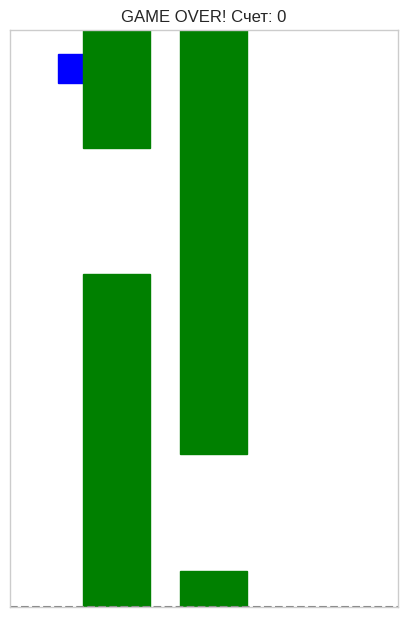

Тестовый Эпизод 10: Награда=-92.1, Счет=0

Средняя награда за 10 тест. эп.: -91.8
Средний счет за 10 тест. эп.: 0.0

--- Тестирование и демонстрация завершены ---


In [51]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import display, clear_output
import time
import random
import numpy as np

# --- Параметры игры ---
CANVAS_WIDTH = 400
CANVAS_HEIGHT = 600
GRAVITY = 0.7
JUMP_STRENGTH = -12
PLAYER_X_START = 50
PLAYER_Y_START = CANVAS_HEIGHT // 2
PLAYER_WIDTH = 30
PLAYER_HEIGHT = 30
PLAYER_COLOR = 'blue'

OBSTACLE_WIDTH = 70
OBSTACLE_COLOR = 'green'
OBSTACLE_SPEED = 5 
MIN_GAP_HEIGHT = 120
MAX_GAP_HEIGHT = 160 
OBSTACLE_SPAWN_INTERVAL = 70 

# --- Параметры для RL ---
REWARD_SURVIVE = 0.1  
REWARD_PASS_OBSTACLE = 10 
REWARD_GAME_OVER = -100 
MAX_FRAMES_PER_EPISODE = 2000 

# --- Глобальные переменные состояния игры ---
danya = None
obstacles = []
score = 0
current_frame_count = 0 # Для отслеживания кадров в текущем эпизоде
game_over_flag = False
frames_since_last_obstacle_rl = 0 # Для спавна препятствий в RL

# Визуализация (matplotlib)
fig_rl, ax_rl = None, None
is_rendering_enabled = False # По умолчанию выключен для обучения
RENDER_SPEED_SECONDS = 0.03 

# --- Классы Player и Obstacle (без изменений, как в предыдущих блоках) ---
class Player:
    def __init__(self, x, y, width, height, color):
        self.x = x; self.y = y; self.width = width; self.height = height
        self.color = color; self.velocity_y = 0
    def jump(self):
        if self.y > 0: self.velocity_y = JUMP_STRENGTH
    def update(self):
        self.velocity_y += GRAVITY; self.y += self.velocity_y
        if self.y + self.height > CANVAS_HEIGHT: self.y = CANVAS_HEIGHT - self.height; self.velocity_y = 0
        if self.y < 0: self.y = 0; self.velocity_y = 0
    def draw(self, ax_to_draw_on):
        player_rect = Rectangle((self.x, self.y), self.width, self.height, color=self.color)
        ax_to_draw_on.add_patch(player_rect)

class Obstacle:
    def __init__(self, x, canvas_height, width, color, speed, min_gap, max_gap):
        self.x = x; self.canvas_height = canvas_height; self.width = width
        self.color = color; self.speed = speed; self.passed_by_player = False
        self.gap_height = random.randint(min_gap, max_gap)
        margin = 30
        self.gap_y_top = random.randint(margin, self.canvas_height - self.gap_height - margin)
        self.gap_y_center = self.gap_y_top + self.gap_height / 2
        self.top_rect_height = self.gap_y_top
        self.bottom_rect_y = self.gap_y_top + self.gap_height
        self.bottom_rect_height = self.canvas_height - self.bottom_rect_y
    def update(self): self.x -= self.speed
    def is_off_screen(self): return self.x + self.width < 0
    def draw(self, ax_to_draw_on):
        top_rect = Rectangle((self.x, 0), self.width, self.top_rect_height, color=self.color)
        bottom_rect = Rectangle((self.x, self.bottom_rect_y), self.width, self.bottom_rect_height, color=self.color)
        ax_to_draw_on.add_patch(top_rect); ax_to_draw_on.add_patch(bottom_rect)
    def collides_with(self, player):
        pl, pr, pt, pb = player.x, player.x + player.width, player.y, player.y + player.height
        otl, otr, ott, otb = self.x, self.x + self.width, 0, self.top_rect_height
        if (pr > otl and pl < otr and pb > ott and pt < otb): return True
        obl, obr, obt, obb = self.x, self.x + self.width, self.bottom_rect_y, self.canvas_height
        if (pr > obl and pl < obr and pb > obt and pt < obb): return True
        return False

# --- Функции для RL-среды (initialize_visualization, render_game_state, reset_game, get_next_obstacle_info) ---
# (Эти функции остаются такими же, как в предыдущем блоке, где мы готовили среду для RL)
def initialize_visualization():
    global fig_rl, ax_rl
    if fig_rl is None or not plt.fignum_exists(fig_rl.number):
        fig_rl, ax_rl = plt.subplots(figsize=(5, 7.5))

def render_game_state():
    global danya, obstacles, score, current_frame_count, game_over_flag, fig_rl, ax_rl
    if not is_rendering_enabled or fig_rl is None: return
    clear_output(wait=True) 
    ax_rl.cla(); ax_rl.set_xlim(0, CANVAS_WIDTH); ax_rl.set_ylim(0, CANVAS_HEIGHT); ax_rl.invert_yaxis() 
    ax_rl.set_xticks([]); ax_rl.set_yticks([])
    title = f"Счет: {score} (Кадр: {current_frame_count})"
    if game_over_flag: title = f"GAME OVER! Счет: {score}"
    ax_rl.set_title(title)
    if danya: danya.draw(ax_rl)
    for obs in obstacles: obs.draw(ax_rl)
    ax_rl.plot([0, CANVAS_WIDTH], [CANVAS_HEIGHT, CANVAS_HEIGHT], color='grey', linestyle='--')
    display(fig_rl); time.sleep(RENDER_SPEED_SECONDS)

def reset_game():
    global danya, obstacles, score, current_frame_count, game_over_flag, frames_since_last_obstacle_rl
    danya = Player(PLAYER_X_START, PLAYER_Y_START, PLAYER_WIDTH, PLAYER_HEIGHT, PLAYER_COLOR)
    obstacles = []; score = 0; current_frame_count = 0; game_over_flag = False
    frames_since_last_obstacle_rl = OBSTACLE_SPAWN_INTERVAL // 2 # Спавним первое препятствие чуть раньше
    # Добавим одно начальное препятствие подальше, чтобы у агента было время среагировать
    obstacles.append(Obstacle(CANVAS_WIDTH + OBSTACLE_WIDTH, CANVAS_HEIGHT, OBSTACLE_WIDTH, OBSTACLE_COLOR, OBSTACLE_SPEED, MIN_GAP_HEIGHT, MAX_GAP_HEIGHT))

    if is_rendering_enabled:
        initialize_visualization(); render_game_state()
    return get_current_state()

def get_next_obstacle_info():
    global danya, obstacles
    next_obs = None; min_dist_to_left_edge = float('inf')
    if not danya: return None, CANVAS_WIDTH, CANVAS_HEIGHT / 2
    for obs in obstacles:
        distance_to_obs_left_edge = obs.x - danya.x # Расстояние от левого края Дани до левого края препятствия
        # Ищем препятствие, чей левый край еще не пройден Даней или уже близко к Дане
        if obs.x + obs.width > danya.x: # Препятствие еще не полностью слева от Дани
            if distance_to_obs_left_edge < min_dist_to_left_edge : # Ищем самое близкое *справа* от Дани
                min_dist_to_left_edge = distance_to_obs_left_edge
                next_obs = obs
    if next_obs:
        # Горизонтальное расстояние от ПРАВОГО края Дани до ЛЕВОГО края препятствия
        horizontal_distance = next_obs.x - (danya.x + danya.width)
        return next_obs, horizontal_distance, next_obs.gap_y_center
    else:
        return None, CANVAS_WIDTH, CANVAS_HEIGHT / 2 

# --- Дискретизация состояния ---
# --- Дискретизация состояния ---
NUM_Y_BINS = 15
NUM_VY_BINS = 10
NUM_DX_BINS = 10  # Количество бинов для горизонтального расстояния
NUM_DY_GAP_BINS = 10 # Количество бинов для разницы по Y до центра проема
NUM_ACTIONS = 2

# =======================================================================================
# !!! ОБНОВЛЕННЫЕ *_BINS_BOUNDS НА ОСНОВЕ ВАШЕЙ СТАТИСТИКИ !!!
# Y_BINS_BOUNDS содержит NUM_Y_BINS-1 границ.
Y_BINS_BOUNDS = np.linspace(0, CANVAS_HEIGHT, NUM_Y_BINS)[1:] 
VY_BINS_BOUNDS = np.linspace(-12.0, 11.0, NUM_VY_BINS)[1:] 
DX_BINS_BOUNDS = np.linspace(-float(OBSTACLE_WIDTH), float(CANVAS_WIDTH), NUM_DX_BINS)[1:] # От -70 до 400
DY_GAP_BINS_BOUNDS = np.linspace(-300.0, 500.0, NUM_DY_GAP_BINS)[1:]
# =======================================================================================

def discretize_value(value, bins_boundaries, num_total_bins_for_axis):
    # (код discretize_value как в предыдущем полном листинге, с min(...) )
    discretized_idx = np.digitize(value, bins_boundaries)
    return min(discretized_idx, num_total_bins_for_axis - 1)


def get_current_state():
    # (код get_current_state как в предыдущем полном листинге, 
    #  он будет использовать обновленные *_BINS_BOUNDS)
    global danya
    if not danya: return (0,0,0,0) 
    danya_y_val = danya.y
    danya_vy_val = danya.velocity_y
    _, hor_dist_val, gap_y_center_val = get_next_obstacle_info() # Эта функция должна быть определена
    diff_danya_y_to_gap_val = gap_y_center_val - (danya_y_val + danya.height / 2)
    
    s1 = discretize_value(danya_y_val, Y_BINS_BOUNDS, NUM_Y_BINS)
    s2 = discretize_value(danya_vy_val, VY_BINS_BOUNDS, NUM_VY_BINS)
    s3 = discretize_value(hor_dist_val, DX_BINS_BOUNDS, NUM_DX_BINS)
    s4 = discretize_value(diff_danya_y_to_gap_val, DY_GAP_BINS_BOUNDS, NUM_DY_GAP_BINS)
    
    return (s1, s2, s3, s4)

# ... (остальной код Q-Learning: ALPHA, GAMMA, Q-table, choose_action, цикл обучения, тестирование) ...

def step(action):
    global danya, obstacles, score, current_frame_count, game_over_flag, frames_since_last_obstacle_rl
    if game_over_flag: return get_current_state(), 0, True, {}
    current_frame_count += 1; reward = REWARD_SURVIVE
    if action == 1: danya.jump()
    danya.update()
    frames_since_last_obstacle_rl += 1
    if frames_since_last_obstacle_rl >= OBSTACLE_SPAWN_INTERVAL:
        obstacles.append(Obstacle(CANVAS_WIDTH, CANVAS_HEIGHT, OBSTACLE_WIDTH, OBSTACLE_COLOR, OBSTACLE_SPEED, MIN_GAP_HEIGHT, MAX_GAP_HEIGHT))
        frames_since_last_obstacle_rl = 0
    active_obstacles_next_step = []; collision_detected = False
    for obs in list(obstacles): 
        obs.update()
        if obs.collides_with(danya): collision_detected = True
        if not obs.passed_by_player and (obs.x + obs.width) < danya.x:
            if not collision_detected: score += 1; reward += REWARD_PASS_OBSTACLE
            obs.passed_by_player = True 
        if not obs.is_off_screen(): active_obstacles_next_step.append(obs)
    obstacles = active_obstacles_next_step
    if collision_detected: game_over_flag = True; reward += REWARD_GAME_OVER
    if current_frame_count >= MAX_FRAMES_PER_EPISODE: game_over_flag = True
    next_state = get_current_state()
    if is_rendering_enabled: render_game_state()
    return next_state, reward, game_over_flag, {"score": score}

# --- Q-Learning Агент ---
ALPHA = 0.1; GAMMA = 0.99; EPSILON = 1.0; EPSILON_DECAY = 0.9997; MIN_EPSILON = 0.01
# !!! УВЕЛИЧИВАЕМ КОЛИЧЕСТВО ЭПИЗОДОВ !!!
NUM_EPISODES_TRAIN = 30000 # Попробуем 30к, можно и 50к, если есть время

q_table_shape = (NUM_Y_BINS, NUM_VY_BINS, NUM_DX_BINS, NUM_DY_GAP_BINS, NUM_ACTIONS)
q_table = np.zeros(q_table_shape)
print(f"Размер Q-таблицы: {q_table.shape}")
# Вывод границ для проверки (убедитесь, что они соответствуют вашим данным!)
print(f"Границы для Y ({len(Y_BINS_BOUNDS)}): {Y_BINS_BOUNDS[:2]}...{Y_BINS_BOUNDS[-2:]}")
print(f"Границы для Vy ({len(VY_BINS_BOUNDS)}): {VY_BINS_BOUNDS[:2]}...{VY_BINS_BOUNDS[-2:]}")
print(f"Границы для Dx ({len(DX_BINS_BOUNDS)}): {DX_BINS_BOUNDS[:2]}...{DX_BINS_BOUNDS[-2:]}")
print(f"Границы для Dy_gap ({len(DY_GAP_BINS_BOUNDS)}): {DY_GAP_BINS_BOUNDS[:2]}...{DY_GAP_BINS_BOUNDS[-2:]}")

def choose_action(state, current_epsilon_val): # Переименовал current_epsilon в current_epsilon_val
    if random.uniform(0, 1) < current_epsilon_val:
        return random.choice([0, 1]) 
    else:
        return np.argmax(q_table[state])

rewards_per_episode = []; current_epsilon_val = EPSILON # Переименовал current_epsilon

print(f"\n--- Начало обучения Q-Learning ({NUM_EPISODES_TRAIN} эпизодов) ---")
print(f"Alpha={ALPHA}, Gamma={GAMMA}, Epsilon_start={EPSILON:.2f}, Decay={EPSILON_DECAY}, Min_Epsilon={MIN_EPSILON}")

# Отключим рендеринг на время основного обучения для скорости
is_rendering_enabled = False 

for episode in range(NUM_EPISODES_TRAIN):
    state = reset_game()
    episode_reward = 0; done = False
    
    # Можно включить рендеринг для отладки или просмотра некоторых эпизодов
    # Например, каждый 5000-й эпизод и последние 5
    # if (episode + 1) % 5000 == 0 or episode >= NUM_EPISODES_TRAIN - 5:
    #     is_rendering_enabled = True
    #     if fig_rl is None or not plt.fignum_exists(fig_rl.number): initialize_visualization()
    #     print(f"\nРендеринг эпизода {episode + 1}")
    # else:
    #     is_rendering_enabled = False

    for step_count in range(MAX_FRAMES_PER_EPISODE):
        action = choose_action(state, current_epsilon_val)
        next_state, reward, done, info = step(action)
        episode_reward += reward
        old_q_value = q_table[state][action]
        next_max_q = np.max(q_table[next_state]) 
        new_q_value = old_q_value + ALPHA * (reward + GAMMA * next_max_q - old_q_value)
        q_table[state][action] = new_q_value
        state = next_state
        if done: break
            
    rewards_per_episode.append(episode_reward)
    current_epsilon_val = max(MIN_EPSILON, current_epsilon_val * EPSILON_DECAY)
    
    if (episode + 1) % 500 == 0: # Печатаем прогресс каждые 500 эпизодов
        avg_reward_last_100 = np.mean(rewards_per_episode[max(0, len(rewards_per_episode)-100):]) # Безопасный срез
        print(f"Эп: {episode + 1}/{NUM_EPISODES_TRAIN}, Eps: {current_epsilon_val:.3f}, "
              f"Сред. награда (100): {avg_reward_last_100:.1f}, "
              f"Посл. награда: {episode_reward:.1f}, Счет: {info.get('score',0)}")

print("--- Обучение завершено ---")

if plt: # График наград
    plt.figure(figsize=(12, 7)); plt.style.use('seaborn-v0_8-whitegrid') # Используем стиль для красоты
    avg_window = 100 # Окно для скользящего среднего
    if len(rewards_per_episode) >= avg_window:
        moving_avg_rewards = np.convolve(rewards_per_episode, np.ones(avg_window)/avg_window, mode='valid')
        plt.plot(np.arange(avg_window -1, len(rewards_per_episode)), moving_avg_rewards, color='tomato', linewidth=2, label=f"Скользящее среднее ({avg_window} эп.)")
    plt.plot(rewards_per_episode, color='cornflowerblue', alpha=0.5, linewidth=0.8, label="Награда за эпизод (сырые данные)")
    plt.xlabel("Эпизод", fontsize=14); plt.ylabel("Суммарная награда", fontsize=14)
    plt.title("Прогресс обучения Q-Learning агента 'Даня'", fontsize=16); plt.legend(); plt.grid(True)
    plt.show()

# --- Тестирование обученного агента ---
print("\n--- Тестирование обученного агента (Epsilon = 0) ---")
num_test_episodes = 10
is_rendering_enabled = True 
if is_rendering_enabled and (fig_rl is None or not plt.fignum_exists(fig_rl.number)):
    initialize_visualization()

total_test_reward = 0; total_test_score = 0
for episode in range(num_test_episodes):
    state = reset_game(); episode_reward = 0; done = False
    print(f"\nТестовый Эпизод {episode + 1}")
    if is_rendering_enabled: time.sleep(0.5) 
    for step_count in range(MAX_FRAMES_PER_EPISODE):
        action = choose_action(state, 0.0) # EPSILON = 0
        next_state, reward, done, info = step(action)
        episode_reward += reward; state = next_state
        if done: break
    total_test_reward += episode_reward; total_test_score += info.get('score',0)
    print(f"Тестовый Эпизод {episode + 1}: Награда={episode_reward:.1f}, Счет={info.get('score',0)}")
    if is_rendering_enabled and not done: time.sleep(0.5) # Пауза если не умер
    elif is_rendering_enabled and done: time.sleep(1) # Пауза если умер, чтобы увидеть Game Over

avg_test_reward = total_test_reward / num_test_episodes
avg_test_score = total_test_score / num_test_episodes
print(f"\nСредняя награда за {num_test_episodes} тест. эп.: {avg_test_reward:.1f}")
print(f"Средний счет за {num_test_episodes} тест. эп.: {avg_test_score:.1f}")

if fig_rl and plt.fignum_exists(fig_rl.number) and is_rendering_enabled:
     plt.close(fig_rl)
print("\n--- Тестирование и демонстрация завершены ---")

### OBSTACLE_SPAWN_INTERVAL надо поправить!!

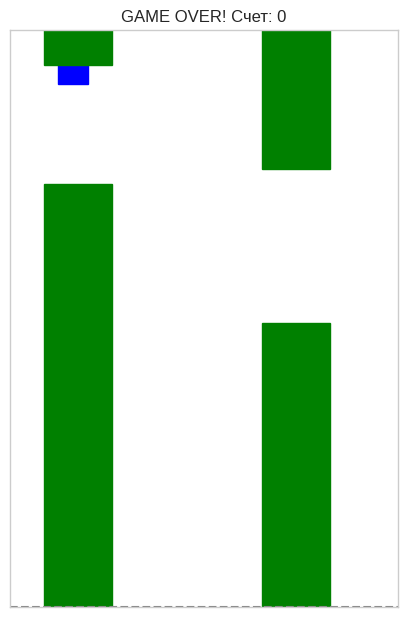

Тестовый Эпизод 10: Награда=-91.3, Счет=0

Средняя награда за 10 тест. эп.: -88.8
Средний счет за 10 тест. эп.: 0.2

--- Тестирование и демонстрация завершены ---


In [52]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import display, clear_output
import time
import random
import numpy as np

# --- Параметры игры ---
CANVAS_WIDTH = 400
CANVAS_HEIGHT = 600
GRAVITY = 0.7
JUMP_STRENGTH = -12
PLAYER_X_START = 50
PLAYER_Y_START = CANVAS_HEIGHT // 2
PLAYER_WIDTH = 30
PLAYER_HEIGHT = 30
PLAYER_COLOR = 'blue'

OBSTACLE_WIDTH = 70
OBSTACLE_COLOR = 'green'
OBSTACLE_SPEED = 5 
MIN_GAP_HEIGHT = 120
MAX_GAP_HEIGHT = 160 
OBSTACLE_SPAWN_INTERVAL = 120 

# --- Параметры для RL ---
REWARD_SURVIVE = 0.1  
REWARD_PASS_OBSTACLE = 10 
REWARD_GAME_OVER = -100 
MAX_FRAMES_PER_EPISODE = 2000 

# --- Глобальные переменные состояния игры ---
danya = None
obstacles = []
score = 0
current_frame_count = 0 # Для отслеживания кадров в текущем эпизоде
game_over_flag = False
frames_since_last_obstacle_rl = 0 # Для спавна препятствий в RL

# Визуализация (matplotlib)
fig_rl, ax_rl = None, None
is_rendering_enabled = False # По умолчанию выключен для обучения
RENDER_SPEED_SECONDS = 0.03 

# --- Классы Player и Obstacle (без изменений, как в предыдущих блоках) ---
class Player:
    def __init__(self, x, y, width, height, color):
        self.x = x; self.y = y; self.width = width; self.height = height
        self.color = color; self.velocity_y = 0
    def jump(self):
        if self.y > 0: self.velocity_y = JUMP_STRENGTH
    def update(self):
        self.velocity_y += GRAVITY; self.y += self.velocity_y
        if self.y + self.height > CANVAS_HEIGHT: self.y = CANVAS_HEIGHT - self.height; self.velocity_y = 0
        if self.y < 0: self.y = 0; self.velocity_y = 0
    def draw(self, ax_to_draw_on):
        player_rect = Rectangle((self.x, self.y), self.width, self.height, color=self.color)
        ax_to_draw_on.add_patch(player_rect)

class Obstacle:
    def __init__(self, x, canvas_height, width, color, speed, min_gap, max_gap):
        self.x = x; self.canvas_height = canvas_height; self.width = width
        self.color = color; self.speed = speed; self.passed_by_player = False
        self.gap_height = random.randint(min_gap, max_gap)
        margin = 30
        self.gap_y_top = random.randint(margin, self.canvas_height - self.gap_height - margin)
        self.gap_y_center = self.gap_y_top + self.gap_height / 2
        self.top_rect_height = self.gap_y_top
        self.bottom_rect_y = self.gap_y_top + self.gap_height
        self.bottom_rect_height = self.canvas_height - self.bottom_rect_y
    def update(self): self.x -= self.speed
    def is_off_screen(self): return self.x + self.width < 0
    def draw(self, ax_to_draw_on):
        top_rect = Rectangle((self.x, 0), self.width, self.top_rect_height, color=self.color)
        bottom_rect = Rectangle((self.x, self.bottom_rect_y), self.width, self.bottom_rect_height, color=self.color)
        ax_to_draw_on.add_patch(top_rect); ax_to_draw_on.add_patch(bottom_rect)
    def collides_with(self, player):
        pl, pr, pt, pb = player.x, player.x + player.width, player.y, player.y + player.height
        otl, otr, ott, otb = self.x, self.x + self.width, 0, self.top_rect_height
        if (pr > otl and pl < otr and pb > ott and pt < otb): return True
        obl, obr, obt, obb = self.x, self.x + self.width, self.bottom_rect_y, self.canvas_height
        if (pr > obl and pl < obr and pb > obt and pt < obb): return True
        return False

# --- Функции для RL-среды (initialize_visualization, render_game_state, reset_game, get_next_obstacle_info) ---
# (Эти функции остаются такими же, как в предыдущем блоке, где мы готовили среду для RL)
def initialize_visualization():
    global fig_rl, ax_rl
    if fig_rl is None or not plt.fignum_exists(fig_rl.number):
        fig_rl, ax_rl = plt.subplots(figsize=(5, 7.5))

def render_game_state():
    global danya, obstacles, score, current_frame_count, game_over_flag, fig_rl, ax_rl
    if not is_rendering_enabled or fig_rl is None: return
    clear_output(wait=True) 
    ax_rl.cla(); ax_rl.set_xlim(0, CANVAS_WIDTH); ax_rl.set_ylim(0, CANVAS_HEIGHT); ax_rl.invert_yaxis() 
    ax_rl.set_xticks([]); ax_rl.set_yticks([])
    title = f"Счет: {score} (Кадр: {current_frame_count})"
    if game_over_flag: title = f"GAME OVER! Счет: {score}"
    ax_rl.set_title(title)
    if danya: danya.draw(ax_rl)
    for obs in obstacles: obs.draw(ax_rl)
    ax_rl.plot([0, CANVAS_WIDTH], [CANVAS_HEIGHT, CANVAS_HEIGHT], color='grey', linestyle='--')
    display(fig_rl); time.sleep(RENDER_SPEED_SECONDS)

def reset_game():
    global danya, obstacles, score, current_frame_count, game_over_flag, frames_since_last_obstacle_rl
    danya = Player(PLAYER_X_START, PLAYER_Y_START, PLAYER_WIDTH, PLAYER_HEIGHT, PLAYER_COLOR)
    obstacles = []; score = 0; current_frame_count = 0; game_over_flag = False
    frames_since_last_obstacle_rl = OBSTACLE_SPAWN_INTERVAL // 2 # Спавним первое препятствие чуть раньше
    # Добавим одно начальное препятствие подальше, чтобы у агента было время среагировать
    obstacles.append(Obstacle(CANVAS_WIDTH + OBSTACLE_WIDTH, CANVAS_HEIGHT, OBSTACLE_WIDTH, OBSTACLE_COLOR, OBSTACLE_SPEED, MIN_GAP_HEIGHT, MAX_GAP_HEIGHT))

    if is_rendering_enabled:
        initialize_visualization(); render_game_state()
    return get_current_state()

def get_next_obstacle_info():
    global danya, obstacles
    next_obs = None; min_dist_to_left_edge = float('inf')
    if not danya: return None, CANVAS_WIDTH, CANVAS_HEIGHT / 2
    for obs in obstacles:
        distance_to_obs_left_edge = obs.x - danya.x # Расстояние от левого края Дани до левого края препятствия
        # Ищем препятствие, чей левый край еще не пройден Даней или уже близко к Дане
        if obs.x + obs.width > danya.x: # Препятствие еще не полностью слева от Дани
            if distance_to_obs_left_edge < min_dist_to_left_edge : # Ищем самое близкое *справа* от Дани
                min_dist_to_left_edge = distance_to_obs_left_edge
                next_obs = obs
    if next_obs:
        # Горизонтальное расстояние от ПРАВОГО края Дани до ЛЕВОГО края препятствия
        horizontal_distance = next_obs.x - (danya.x + danya.width)
        return next_obs, horizontal_distance, next_obs.gap_y_center
    else:
        return None, CANVAS_WIDTH, CANVAS_HEIGHT / 2 

# --- Дискретизация состояния ---
# --- Дискретизация состояния ---
NUM_Y_BINS = 15
NUM_VY_BINS = 10
NUM_DX_BINS = 10  # Количество бинов для горизонтального расстояния
NUM_DY_GAP_BINS = 10 # Количество бинов для разницы по Y до центра проема
NUM_ACTIONS = 2

# =======================================================================================
# !!! ОБНОВЛЕННЫЕ *_BINS_BOUNDS НА ОСНОВЕ ВАШЕЙ СТАТИСТИКИ !!!
# Y_BINS_BOUNDS содержит NUM_Y_BINS-1 границ.
Y_BINS_BOUNDS = np.linspace(0, CANVAS_HEIGHT, NUM_Y_BINS)[1:] 
VY_BINS_BOUNDS = np.linspace(-12.0, 11.0, NUM_VY_BINS)[1:] 
DX_BINS_BOUNDS = np.linspace(-float(OBSTACLE_WIDTH), float(CANVAS_WIDTH), NUM_DX_BINS)[1:] # От -70 до 400
DY_GAP_BINS_BOUNDS = np.linspace(-300.0, 500.0, NUM_DY_GAP_BINS)[1:]
# =======================================================================================

def discretize_value(value, bins_boundaries, num_total_bins_for_axis):
    # (код discretize_value как в предыдущем полном листинге, с min(...) )
    discretized_idx = np.digitize(value, bins_boundaries)
    return min(discretized_idx, num_total_bins_for_axis - 1)


def get_current_state():
    # (код get_current_state как в предыдущем полном листинге, 
    #  он будет использовать обновленные *_BINS_BOUNDS)
    global danya
    if not danya: return (0,0,0,0) 
    danya_y_val = danya.y
    danya_vy_val = danya.velocity_y
    _, hor_dist_val, gap_y_center_val = get_next_obstacle_info() # Эта функция должна быть определена
    diff_danya_y_to_gap_val = gap_y_center_val - (danya_y_val + danya.height / 2)
    
    s1 = discretize_value(danya_y_val, Y_BINS_BOUNDS, NUM_Y_BINS)
    s2 = discretize_value(danya_vy_val, VY_BINS_BOUNDS, NUM_VY_BINS)
    s3 = discretize_value(hor_dist_val, DX_BINS_BOUNDS, NUM_DX_BINS)
    s4 = discretize_value(diff_danya_y_to_gap_val, DY_GAP_BINS_BOUNDS, NUM_DY_GAP_BINS)
    
    return (s1, s2, s3, s4)

# ... (остальной код Q-Learning: ALPHA, GAMMA, Q-table, choose_action, цикл обучения, тестирование) ...

def step(action):
    global danya, obstacles, score, current_frame_count, game_over_flag, frames_since_last_obstacle_rl
    if game_over_flag: return get_current_state(), 0, True, {}
    current_frame_count += 1; reward = REWARD_SURVIVE
    if action == 1: danya.jump()
    danya.update()
    frames_since_last_obstacle_rl += 1
    if frames_since_last_obstacle_rl >= OBSTACLE_SPAWN_INTERVAL:
        obstacles.append(Obstacle(CANVAS_WIDTH, CANVAS_HEIGHT, OBSTACLE_WIDTH, OBSTACLE_COLOR, OBSTACLE_SPEED, MIN_GAP_HEIGHT, MAX_GAP_HEIGHT))
        frames_since_last_obstacle_rl = 0
    active_obstacles_next_step = []; collision_detected = False
    for obs in list(obstacles): 
        obs.update()
        if obs.collides_with(danya): collision_detected = True
        if not obs.passed_by_player and (obs.x + obs.width) < danya.x:
            if not collision_detected: score += 1; reward += REWARD_PASS_OBSTACLE
            obs.passed_by_player = True 
        if not obs.is_off_screen(): active_obstacles_next_step.append(obs)
    obstacles = active_obstacles_next_step
    if collision_detected: game_over_flag = True; reward += REWARD_GAME_OVER
    if current_frame_count >= MAX_FRAMES_PER_EPISODE: game_over_flag = True
    next_state = get_current_state()
    if is_rendering_enabled: render_game_state()
    return next_state, reward, game_over_flag, {"score": score}

# --- Q-Learning Агент ---
ALPHA = 0.1; GAMMA = 0.99; EPSILON = 1.0; EPSILON_DECAY = 0.9997; MIN_EPSILON = 0.01
# !!! УВЕЛИЧИВАЕМ КОЛИЧЕСТВО ЭПИЗОДОВ !!!
NUM_EPISODES_TRAIN = 30000 # Попробуем 30к, можно и 50к, если есть время

q_table_shape = (NUM_Y_BINS, NUM_VY_BINS, NUM_DX_BINS, NUM_DY_GAP_BINS, NUM_ACTIONS)
q_table = np.zeros(q_table_shape)
print(f"Размер Q-таблицы: {q_table.shape}")
# Вывод границ для проверки (убедитесь, что они соответствуют вашим данным!)
print(f"Границы для Y ({len(Y_BINS_BOUNDS)}): {Y_BINS_BOUNDS[:2]}...{Y_BINS_BOUNDS[-2:]}")
print(f"Границы для Vy ({len(VY_BINS_BOUNDS)}): {VY_BINS_BOUNDS[:2]}...{VY_BINS_BOUNDS[-2:]}")
print(f"Границы для Dx ({len(DX_BINS_BOUNDS)}): {DX_BINS_BOUNDS[:2]}...{DX_BINS_BOUNDS[-2:]}")
print(f"Границы для Dy_gap ({len(DY_GAP_BINS_BOUNDS)}): {DY_GAP_BINS_BOUNDS[:2]}...{DY_GAP_BINS_BOUNDS[-2:]}")

def choose_action(state, current_epsilon_val): # Переименовал current_epsilon в current_epsilon_val
    if random.uniform(0, 1) < current_epsilon_val:
        return random.choice([0, 1]) 
    else:
        return np.argmax(q_table[state])

rewards_per_episode = []; current_epsilon_val = EPSILON # Переименовал current_epsilon

print(f"\n--- Начало обучения Q-Learning ({NUM_EPISODES_TRAIN} эпизодов) ---")
print(f"Alpha={ALPHA}, Gamma={GAMMA}, Epsilon_start={EPSILON:.2f}, Decay={EPSILON_DECAY}, Min_Epsilon={MIN_EPSILON}")

# Отключим рендеринг на время основного обучения для скорости
is_rendering_enabled = False 

for episode in range(NUM_EPISODES_TRAIN):
    state = reset_game()
    episode_reward = 0; done = False
    
    # Можно включить рендеринг для отладки или просмотра некоторых эпизодов
    # Например, каждый 5000-й эпизод и последние 5
    # if (episode + 1) % 5000 == 0 or episode >= NUM_EPISODES_TRAIN - 5:
    #     is_rendering_enabled = True
    #     if fig_rl is None or not plt.fignum_exists(fig_rl.number): initialize_visualization()
    #     print(f"\nРендеринг эпизода {episode + 1}")
    # else:
    #     is_rendering_enabled = False

    for step_count in range(MAX_FRAMES_PER_EPISODE):
        action = choose_action(state, current_epsilon_val)
        next_state, reward, done, info = step(action)
        episode_reward += reward
        old_q_value = q_table[state][action]
        next_max_q = np.max(q_table[next_state]) 
        new_q_value = old_q_value + ALPHA * (reward + GAMMA * next_max_q - old_q_value)
        q_table[state][action] = new_q_value
        state = next_state
        if done: break
            
    rewards_per_episode.append(episode_reward)
    current_epsilon_val = max(MIN_EPSILON, current_epsilon_val * EPSILON_DECAY)
    
    if (episode + 1) % 500 == 0: # Печатаем прогресс каждые 500 эпизодов
        avg_reward_last_100 = np.mean(rewards_per_episode[max(0, len(rewards_per_episode)-100):]) # Безопасный срез
        print(f"Эп: {episode + 1}/{NUM_EPISODES_TRAIN}, Eps: {current_epsilon_val:.3f}, "
              f"Сред. награда (100): {avg_reward_last_100:.1f}, "
              f"Посл. награда: {episode_reward:.1f}, Счет: {info.get('score',0)}")

print("--- Обучение завершено ---")

if plt: # График наград
    plt.figure(figsize=(12, 7)); plt.style.use('seaborn-v0_8-whitegrid') # Используем стиль для красоты
    avg_window = 100 # Окно для скользящего среднего
    if len(rewards_per_episode) >= avg_window:
        moving_avg_rewards = np.convolve(rewards_per_episode, np.ones(avg_window)/avg_window, mode='valid')
        plt.plot(np.arange(avg_window -1, len(rewards_per_episode)), moving_avg_rewards, color='tomato', linewidth=2, label=f"Скользящее среднее ({avg_window} эп.)")
    plt.plot(rewards_per_episode, color='cornflowerblue', alpha=0.5, linewidth=0.8, label="Награда за эпизод (сырые данные)")
    plt.xlabel("Эпизод", fontsize=14); plt.ylabel("Суммарная награда", fontsize=14)
    plt.title("Прогресс обучения Q-Learning агента 'Даня'", fontsize=16); plt.legend(); plt.grid(True)
    plt.show()

# --- Тестирование обученного агента ---
print("\n--- Тестирование обученного агента (Epsilon = 0) ---")
num_test_episodes = 10
is_rendering_enabled = True 
if is_rendering_enabled and (fig_rl is None or not plt.fignum_exists(fig_rl.number)):
    initialize_visualization()

total_test_reward = 0; total_test_score = 0
for episode in range(num_test_episodes):
    state = reset_game(); episode_reward = 0; done = False
    print(f"\nТестовый Эпизод {episode + 1}")
    if is_rendering_enabled: time.sleep(0.5) 
    for step_count in range(MAX_FRAMES_PER_EPISODE):
        action = choose_action(state, 0.0) # EPSILON = 0
        next_state, reward, done, info = step(action)
        episode_reward += reward; state = next_state
        if done: break
    total_test_reward += episode_reward; total_test_score += info.get('score',0)
    print(f"Тестовый Эпизод {episode + 1}: Награда={episode_reward:.1f}, Счет={info.get('score',0)}")
    if is_rendering_enabled and not done: time.sleep(0.5) # Пауза если не умер
    elif is_rendering_enabled and done: time.sleep(1) # Пауза если умер, чтобы увидеть Game Over

avg_test_reward = total_test_reward / num_test_episodes
avg_test_score = total_test_score / num_test_episodes
print(f"\nСредняя награда за {num_test_episodes} тест. эп.: {avg_test_reward:.1f}")
print(f"Средний счет за {num_test_episodes} тест. эп.: {avg_test_score:.1f}")

if fig_rl and plt.fignum_exists(fig_rl.number) and is_rendering_enabled:
     plt.close(fig_rl)
print("\n--- Тестирование и демонстрация завершены ---")

In [54]:
q_table = np.zeros(q_table_shape) # Перед новым циклом обучения

KeyboardInterrupt: 

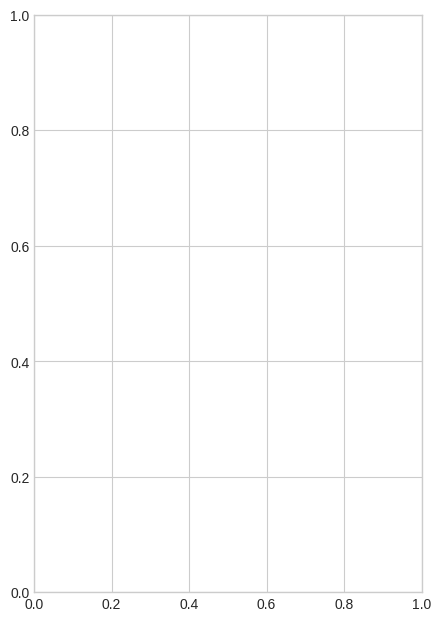

In [55]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import display, clear_output
import time
import random
import numpy as np

# --- Параметры игры ---
CANVAS_WIDTH = 400
CANVAS_HEIGHT = 600
GRAVITY = 0.7
JUMP_STRENGTH = -12
PLAYER_X_START = 50
PLAYER_Y_START = CANVAS_HEIGHT // 2
PLAYER_WIDTH = 30
PLAYER_HEIGHT = 30
PLAYER_COLOR = 'blue'

OBSTACLE_WIDTH = 70
OBSTACLE_COLOR = 'green'
OBSTACLE_SPEED = 5 
MIN_GAP_HEIGHT = 120
MAX_GAP_HEIGHT = 160 
OBSTACLE_SPAWN_INTERVAL = 120 

# --- Параметры для RL ---
REWARD_SURVIVE = 0.01  
REWARD_PASS_OBSTACLE = 25 
REWARD_GAME_OVER = -100 
MAX_FRAMES_PER_EPISODE = 2000 

# --- Глобальные переменные состояния игры ---
danya = None
obstacles = []
score = 0
current_frame_count = 0 # Для отслеживания кадров в текущем эпизоде
game_over_flag = False
frames_since_last_obstacle_rl = 0 # Для спавна препятствий в RL

# Визуализация (matplotlib)
fig_rl, ax_rl = None, None
is_rendering_enabled = False # По умолчанию выключен для обучения
RENDER_SPEED_SECONDS = 0.03 

# --- Классы Player и Obstacle (без изменений, как в предыдущих блоках) ---
class Player:
    def __init__(self, x, y, width, height, color):
        self.x = x; self.y = y; self.width = width; self.height = height
        self.color = color; self.velocity_y = 0
    def jump(self):
        if self.y > 0: self.velocity_y = JUMP_STRENGTH
    def update(self):
        self.velocity_y += GRAVITY; self.y += self.velocity_y
        if self.y + self.height > CANVAS_HEIGHT: self.y = CANVAS_HEIGHT - self.height; self.velocity_y = 0
        if self.y < 0: self.y = 0; self.velocity_y = 0
    def draw(self, ax_to_draw_on):
        player_rect = Rectangle((self.x, self.y), self.width, self.height, color=self.color)
        ax_to_draw_on.add_patch(player_rect)

class Obstacle:
    def __init__(self, x, canvas_height, width, color, speed, min_gap, max_gap):
        self.x = x; self.canvas_height = canvas_height; self.width = width
        self.color = color; self.speed = speed; self.passed_by_player = False
        self.gap_height = random.randint(min_gap, max_gap)
        margin = 30
        self.gap_y_top = random.randint(margin, self.canvas_height - self.gap_height - margin)
        self.gap_y_center = self.gap_y_top + self.gap_height / 2
        self.top_rect_height = self.gap_y_top
        self.bottom_rect_y = self.gap_y_top + self.gap_height
        self.bottom_rect_height = self.canvas_height - self.bottom_rect_y
    def update(self): self.x -= self.speed
    def is_off_screen(self): return self.x + self.width < 0
    def draw(self, ax_to_draw_on):
        top_rect = Rectangle((self.x, 0), self.width, self.top_rect_height, color=self.color)
        bottom_rect = Rectangle((self.x, self.bottom_rect_y), self.width, self.bottom_rect_height, color=self.color)
        ax_to_draw_on.add_patch(top_rect); ax_to_draw_on.add_patch(bottom_rect)
    def collides_with(self, player):
        pl, pr, pt, pb = player.x, player.x + player.width, player.y, player.y + player.height
        otl, otr, ott, otb = self.x, self.x + self.width, 0, self.top_rect_height
        if (pr > otl and pl < otr and pb > ott and pt < otb): return True
        obl, obr, obt, obb = self.x, self.x + self.width, self.bottom_rect_y, self.canvas_height
        if (pr > obl and pl < obr and pb > obt and pt < obb): return True
        return False

# --- Функции для RL-среды (initialize_visualization, render_game_state, reset_game, get_next_obstacle_info) ---
# (Эти функции остаются такими же, как в предыдущем блоке, где мы готовили среду для RL)
def initialize_visualization():
    global fig_rl, ax_rl
    if fig_rl is None or not plt.fignum_exists(fig_rl.number):
        fig_rl, ax_rl = plt.subplots(figsize=(5, 7.5))

def render_game_state():
    global danya, obstacles, score, current_frame_count, game_over_flag, fig_rl, ax_rl
    if not is_rendering_enabled or fig_rl is None: return
    clear_output(wait=True) 
    ax_rl.cla(); ax_rl.set_xlim(0, CANVAS_WIDTH); ax_rl.set_ylim(0, CANVAS_HEIGHT); ax_rl.invert_yaxis() 
    ax_rl.set_xticks([]); ax_rl.set_yticks([])
    title = f"Счет: {score} (Кадр: {current_frame_count})"
    if game_over_flag: title = f"GAME OVER! Счет: {score}"
    ax_rl.set_title(title)
    if danya: danya.draw(ax_rl)
    for obs in obstacles: obs.draw(ax_rl)
    ax_rl.plot([0, CANVAS_WIDTH], [CANVAS_HEIGHT, CANVAS_HEIGHT], color='grey', linestyle='--')
    display(fig_rl); time.sleep(RENDER_SPEED_SECONDS)

def reset_game():
    global danya, obstacles, score, current_frame_count, game_over_flag, frames_since_last_obstacle_rl
    danya = Player(PLAYER_X_START, PLAYER_Y_START, PLAYER_WIDTH, PLAYER_HEIGHT, PLAYER_COLOR)
    obstacles = []; score = 0; current_frame_count = 0; game_over_flag = False
    frames_since_last_obstacle_rl = OBSTACLE_SPAWN_INTERVAL // 2 # Спавним первое препятствие чуть раньше
    # Добавим одно начальное препятствие подальше, чтобы у агента было время среагировать
    obstacles.append(Obstacle(CANVAS_WIDTH + OBSTACLE_WIDTH, CANVAS_HEIGHT, OBSTACLE_WIDTH, OBSTACLE_COLOR, OBSTACLE_SPEED, MIN_GAP_HEIGHT, MAX_GAP_HEIGHT))

    if is_rendering_enabled:
        initialize_visualization(); render_game_state()
    return get_current_state()

def get_next_obstacle_info():
    global danya, obstacles
    next_obs = None; min_dist_to_left_edge = float('inf')
    if not danya: return None, CANVAS_WIDTH, CANVAS_HEIGHT / 2
    for obs in obstacles:
        distance_to_obs_left_edge = obs.x - danya.x # Расстояние от левого края Дани до левого края препятствия
        # Ищем препятствие, чей левый край еще не пройден Даней или уже близко к Дане
        if obs.x + obs.width > danya.x: # Препятствие еще не полностью слева от Дани
            if distance_to_obs_left_edge < min_dist_to_left_edge : # Ищем самое близкое *справа* от Дани
                min_dist_to_left_edge = distance_to_obs_left_edge
                next_obs = obs
    if next_obs:
        # Горизонтальное расстояние от ПРАВОГО края Дани до ЛЕВОГО края препятствия
        horizontal_distance = next_obs.x - (danya.x + danya.width)
        return next_obs, horizontal_distance, next_obs.gap_y_center
    else:
        return None, CANVAS_WIDTH, CANVAS_HEIGHT / 2 

# --- Дискретизация состояния ---
# --- Дискретизация состояния ---
NUM_Y_BINS = 15
NUM_VY_BINS = 10
NUM_DX_BINS = 10  # Количество бинов для горизонтального расстояния
NUM_DY_GAP_BINS = 10 # Количество бинов для разницы по Y до центра проема
NUM_ACTIONS = 2

# =======================================================================================
# !!! ОБНОВЛЕННЫЕ *_BINS_BOUNDS НА ОСНОВЕ ВАШЕЙ СТАТИСТИКИ !!!
# Y_BINS_BOUNDS содержит NUM_Y_BINS-1 границ.
Y_BINS_BOUNDS = np.linspace(0, CANVAS_HEIGHT, NUM_Y_BINS)[1:] 
VY_BINS_BOUNDS = np.linspace(-12.0, 11.0, NUM_VY_BINS)[1:] 
DX_BINS_BOUNDS = np.linspace(-float(OBSTACLE_WIDTH), float(CANVAS_WIDTH), NUM_DX_BINS)[1:] # От -70 до 400
DY_GAP_BINS_BOUNDS = np.linspace(-300.0, 500.0, NUM_DY_GAP_BINS)[1:]
# =======================================================================================

def discretize_value(value, bins_boundaries, num_total_bins_for_axis):
    # (код discretize_value как в предыдущем полном листинге, с min(...) )
    discretized_idx = np.digitize(value, bins_boundaries)
    return min(discretized_idx, num_total_bins_for_axis - 1)


def get_current_state():
    # (код get_current_state как в предыдущем полном листинге, 
    #  он будет использовать обновленные *_BINS_BOUNDS)
    global danya
    if not danya: return (0,0,0,0) 
    danya_y_val = danya.y
    danya_vy_val = danya.velocity_y
    _, hor_dist_val, gap_y_center_val = get_next_obstacle_info() # Эта функция должна быть определена
    diff_danya_y_to_gap_val = gap_y_center_val - (danya_y_val + danya.height / 2)
    
    s1 = discretize_value(danya_y_val, Y_BINS_BOUNDS, NUM_Y_BINS)
    s2 = discretize_value(danya_vy_val, VY_BINS_BOUNDS, NUM_VY_BINS)
    s3 = discretize_value(hor_dist_val, DX_BINS_BOUNDS, NUM_DX_BINS)
    s4 = discretize_value(diff_danya_y_to_gap_val, DY_GAP_BINS_BOUNDS, NUM_DY_GAP_BINS)
    
    return (s1, s2, s3, s4)

# ... (остальной код Q-Learning: ALPHA, GAMMA, Q-table, choose_action, цикл обучения, тестирование) ...

def step(action):
    global danya, obstacles, score, current_frame_count, game_over_flag, frames_since_last_obstacle_rl
    if game_over_flag: return get_current_state(), 0, True, {}
    current_frame_count += 1; reward = REWARD_SURVIVE
    if action == 1: danya.jump()
    danya.update()
    frames_since_last_obstacle_rl += 1
    if frames_since_last_obstacle_rl >= OBSTACLE_SPAWN_INTERVAL:
        obstacles.append(Obstacle(CANVAS_WIDTH, CANVAS_HEIGHT, OBSTACLE_WIDTH, OBSTACLE_COLOR, OBSTACLE_SPEED, MIN_GAP_HEIGHT, MAX_GAP_HEIGHT))
        frames_since_last_obstacle_rl = 0
    active_obstacles_next_step = []; collision_detected = False
    for obs in list(obstacles): 
        obs.update()
        if obs.collides_with(danya): collision_detected = True
        if not obs.passed_by_player and (obs.x + obs.width) < danya.x:
            if not collision_detected: score += 1; reward += REWARD_PASS_OBSTACLE
            obs.passed_by_player = True 
        if not obs.is_off_screen(): active_obstacles_next_step.append(obs)
    obstacles = active_obstacles_next_step
    if collision_detected: game_over_flag = True; reward += REWARD_GAME_OVER
    if current_frame_count >= MAX_FRAMES_PER_EPISODE: game_over_flag = True
    next_state = get_current_state()
    if is_rendering_enabled: render_game_state()
    return next_state, reward, game_over_flag, {"score": score}

# --- Q-Learning Агент ---
ALPHA = 0.1; GAMMA = 0.99; EPSILON = 1.0; EPSILON_DECAY = 0.9997; MIN_EPSILON = 0.01
# !!! УВЕЛИЧИВАЕМ КОЛИЧЕСТВО ЭПИЗОДОВ !!!
NUM_EPISODES_TRAIN = 30000 # Попробуем 30к, можно и 50к, если есть время

q_table_shape = (NUM_Y_BINS, NUM_VY_BINS, NUM_DX_BINS, NUM_DY_GAP_BINS, NUM_ACTIONS)
q_table = np.zeros(q_table_shape)
print(f"Размер Q-таблицы: {q_table.shape}")
# Вывод границ для проверки (убедитесь, что они соответствуют вашим данным!)
print(f"Границы для Y ({len(Y_BINS_BOUNDS)}): {Y_BINS_BOUNDS[:2]}...{Y_BINS_BOUNDS[-2:]}")
print(f"Границы для Vy ({len(VY_BINS_BOUNDS)}): {VY_BINS_BOUNDS[:2]}...{VY_BINS_BOUNDS[-2:]}")
print(f"Границы для Dx ({len(DX_BINS_BOUNDS)}): {DX_BINS_BOUNDS[:2]}...{DX_BINS_BOUNDS[-2:]}")
print(f"Границы для Dy_gap ({len(DY_GAP_BINS_BOUNDS)}): {DY_GAP_BINS_BOUNDS[:2]}...{DY_GAP_BINS_BOUNDS[-2:]}")

def choose_action(state, current_epsilon_val): # Переименовал current_epsilon в current_epsilon_val
    if random.uniform(0, 1) < current_epsilon_val:
        return random.choice([0, 1]) 
    else:
        return np.argmax(q_table[state])

rewards_per_episode = []; current_epsilon_val = EPSILON # Переименовал current_epsilon

print(f"\n--- Начало обучения Q-Learning ({NUM_EPISODES_TRAIN} эпизодов) ---")
print(f"Alpha={ALPHA}, Gamma={GAMMA}, Epsilon_start={EPSILON:.2f}, Decay={EPSILON_DECAY}, Min_Epsilon={MIN_EPSILON}")

# Отключим рендеринг на время основного обучения для скорости
is_rendering_enabled = False 

for episode in range(NUM_EPISODES_TRAIN):
    state = reset_game()
    episode_reward = 0; done = False
    
    # Можно включить рендеринг для отладки или просмотра некоторых эпизодов
    # Например, каждый 5000-й эпизод и последние 5
    # if (episode + 1) % 5000 == 0 or episode >= NUM_EPISODES_TRAIN - 5:
    #     is_rendering_enabled = True
    #     if fig_rl is None or not plt.fignum_exists(fig_rl.number): initialize_visualization()
    #     print(f"\nРендеринг эпизода {episode + 1}")
    # else:
    #     is_rendering_enabled = False

    for step_count in range(MAX_FRAMES_PER_EPISODE):
        action = choose_action(state, current_epsilon_val)
        next_state, reward, done, info = step(action)
        episode_reward += reward
        old_q_value = q_table[state][action]
        next_max_q = np.max(q_table[next_state]) 
        new_q_value = old_q_value + ALPHA * (reward + GAMMA * next_max_q - old_q_value)
        q_table[state][action] = new_q_value
        state = next_state
        if done: break
            
    rewards_per_episode.append(episode_reward)
    current_epsilon_val = max(MIN_EPSILON, current_epsilon_val * EPSILON_DECAY)
    
    if (episode + 1) % 500 == 0: # Печатаем прогресс каждые 500 эпизодов
        avg_reward_last_100 = np.mean(rewards_per_episode[max(0, len(rewards_per_episode)-100):]) # Безопасный срез
        print(f"Эп: {episode + 1}/{NUM_EPISODES_TRAIN}, Eps: {current_epsilon_val:.3f}, "
              f"Сред. награда (100): {avg_reward_last_100:.1f}, "
              f"Посл. награда: {episode_reward:.1f}, Счет: {info.get('score',0)}")

print("--- Обучение завершено ---")

if plt: # График наград
    plt.figure(figsize=(12, 7)); plt.style.use('seaborn-v0_8-whitegrid') # Используем стиль для красоты
    avg_window = 100 # Окно для скользящего среднего
    if len(rewards_per_episode) >= avg_window:
        moving_avg_rewards = np.convolve(rewards_per_episode, np.ones(avg_window)/avg_window, mode='valid')
        plt.plot(np.arange(avg_window -1, len(rewards_per_episode)), moving_avg_rewards, color='tomato', linewidth=2, label=f"Скользящее среднее ({avg_window} эп.)")
    plt.plot(rewards_per_episode, color='cornflowerblue', alpha=0.5, linewidth=0.8, label="Награда за эпизод (сырые данные)")
    plt.xlabel("Эпизод", fontsize=14); plt.ylabel("Суммарная награда", fontsize=14)
    plt.title("Прогресс обучения Q-Learning агента 'Даня'", fontsize=16); plt.legend(); plt.grid(True)
    plt.show()

# --- Тестирование обученного агента ---
print("\n--- Тестирование обученного агента (Epsilon = 0) ---")
num_test_episodes = 10
is_rendering_enabled = True 
if is_rendering_enabled and (fig_rl is None or not plt.fignum_exists(fig_rl.number)):
    initialize_visualization()

total_test_reward = 0; total_test_score = 0
for episode in range(num_test_episodes):
    state = reset_game(); episode_reward = 0; done = False
    print(f"\nТестовый Эпизод {episode + 1}")
    if is_rendering_enabled: time.sleep(0.5) 
    for step_count in range(MAX_FRAMES_PER_EPISODE):
        action = choose_action(state, 0.0) # EPSILON = 0
        next_state, reward, done, info = step(action)
        episode_reward += reward; state = next_state
        if done: break
    total_test_reward += episode_reward; total_test_score += info.get('score',0)
    print(f"Тестовый Эпизод {episode + 1}: Награда={episode_reward:.1f}, Счет={info.get('score',0)}")
    if is_rendering_enabled and not done: time.sleep(0.5) # Пауза если не умер
    elif is_rendering_enabled and done: time.sleep(1) # Пауза если умер, чтобы увидеть Game Over

avg_test_reward = total_test_reward / num_test_episodes
avg_test_score = total_test_score / num_test_episodes
print(f"\nСредняя награда за {num_test_episodes} тест. эп.: {avg_test_reward:.1f}")
print(f"Средний счет за {num_test_episodes} тест. эп.: {avg_test_score:.1f}")

if fig_rl and plt.fignum_exists(fig_rl.number) and is_rendering_enabled:
     plt.close(fig_rl)
print("\n--- Тестирование и демонстрация завершены ---")

In [56]:
# Полный листинг Q-Learning с корректным графиком и измененными наградами

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import display, clear_output
import time
import random
import numpy as np

# --- Параметры игры ---
CANVAS_WIDTH = 400; CANVAS_HEIGHT = 600; GRAVITY = 0.7; JUMP_STRENGTH = -12
PLAYER_X_START = 50; PLAYER_Y_START = CANVAS_HEIGHT // 2; PLAYER_WIDTH = 30; PLAYER_HEIGHT = 30
PLAYER_COLOR = 'blue'; OBSTACLE_WIDTH = 70; OBSTACLE_COLOR = 'green'; OBSTACLE_SPEED = 5
MIN_GAP_HEIGHT = 120; MAX_GAP_HEIGHT = 160;
OBSTACLE_SPAWN_INTERVAL = 120 # Оставляем увеличенный

# --- Параметры для RL (С ИЗМЕНЕННЫМИ НАГРАДАМИ) ---
REWARD_SURVIVE = 0.01       # Было 0.1. Уменьшаем.
REWARD_PASS_OBSTACLE = 25   # Было 10. Увеличиваем.
REWARD_GAME_OVER = -100     # Оставляем сильный штраф
MAX_FRAMES_PER_EPISODE = 2000 

# --- Глобальные переменные игры и визуализации (как раньше) ---
danya = None; obstacles = []; score = 0; current_frame_count = 0
game_over_flag = False; frames_since_last_obstacle_rl = 0
fig_rl, ax_rl = None, None; is_rendering_enabled = False; RENDER_SPEED_SECONDS = 0.03

# --- Классы Player и Obstacle (как раньше) ---
class Player: # (код класса Player как раньше)
    def __init__(self, x, y, width, height, color): self.x = x; self.y = y; self.width = width; self.height = height; self.color = color; self.velocity_y = 0
    def jump(self):
        if self.y > 0: self.velocity_y = JUMP_STRENGTH
    def update(self): self.velocity_y += GRAVITY; self.y += self.velocity_y;_h=self.height;_ch=CANVAS_HEIGHT;self.y=min(max(self.y,0),_ch-_h);self.velocity_y=0 if (self.y==0 and self.velocity_y<0) or (self.y==_ch-_h and self.velocity_y>0) else self.velocity_y # Компактная проверка границ
    def draw(self, ax_to_draw_on): ax_to_draw_on.add_patch(Rectangle((self.x, self.y), self.width, self.height, color=self.color))
class Obstacle: # (код класса Obstacle как раньше)
    def __init__(self, x, canvas_height, width, color, speed, min_gap, max_gap): self.x=x;self.canvas_height=canvas_height;self.width=width;self.color=color;self.speed=speed;self.passed_by_player=False;self.gap_height=random.randint(min_gap,max_gap);margin=30;self.gap_y_top=random.randint(margin,self.canvas_height-self.gap_height-margin);self.gap_y_center=self.gap_y_top+self.gap_height/2;self.top_rect_height=self.gap_y_top;self.bottom_rect_y=self.gap_y_top+self.gap_height;self.bottom_rect_height=self.canvas_height-self.bottom_rect_y
    def update(self): self.x -= self.speed
    def is_off_screen(self): return self.x + self.width < 0
    def draw(self, ax_to_draw_on): ax_to_draw_on.add_patch(Rectangle((self.x,0),self.width,self.top_rect_height,color=self.color));ax_to_draw_on.add_patch(Rectangle((self.x,self.bottom_rect_y),self.width,self.bottom_rect_height,color=self.color))
    def collides_with(self,player): pl,pr,pt,pb=player.x,player.x+player.width,player.y,player.y+player.height;otl,otr,ott,otb=self.x,self.x+self.width,0,self.top_rect_height;if(pr>otl and pl<otr and pb>ott and pt<otb):return True;obl,obr,obt,obb=self.x,self.x+self.width,self.bottom_rect_y,self.canvas_height;if(pr>obl and pl<obr and pb>obt and pt<obb):return True;return False

# --- Функции для RL-среды (как раньше) ---
def initialize_visualization():global fig_rl,ax_rl;from IPython.core.display import display as core_display;from IPython.display import HTML;import matplotlib.pyplot as plt;fig_rl,ax_rl=plt.subplots(figsize=(5,7.5)) if fig_rl is None or not plt.fignum_exists(fig_rl.number) else (fig_rl,ax_rl) # Ensure fig_rl, ax_rl are always set
def render_game_state():global danya,obstacles,score,current_frame_count,game_over_flag,fig_rl,ax_rl,is_rendering_enabled,RENDER_SPEED_SECONDS,CANVAS_WIDTH,CANVAS_HEIGHT;from IPython.display import display,clear_output;import time;import matplotlib.pyplot as plt;if not is_rendering_enabled or fig_rl is None:return;clear_output(wait=True);ax_rl.cla();ax_rl.set_xlim(0,CANVAS_WIDTH);ax_rl.set_ylim(0,CANVAS_HEIGHT);ax_rl.invert_yaxis();ax_rl.set_xticks([]);ax_rl.set_yticks([]);title=f"Счет: {score} (Кадр: {current_frame_count})";if game_over_flag:title=f"GAME OVER! Счет: {score}";ax_rl.set_title(title);_d=danya;[_d.draw(ax_rl)if _d else None];[obs.draw(ax_rl)for obs in obstacles];ax_rl.plot([0,CANVAS_WIDTH],[CANVAS_HEIGHT,CANVAS_HEIGHT],color='grey',linestyle='--');display(fig_rl);time.sleep(RENDER_SPEED_SECONDS)
def reset_game():global danya,obstacles,score,current_frame_count,game_over_flag,frames_since_last_obstacle_rl,PLAYER_X_START,PLAYER_Y_START,PLAYER_WIDTH,PLAYER_HEIGHT,PLAYER_COLOR,OBSTACLE_SPAWN_INTERVAL,CANVAS_WIDTH,OBSTACLE_WIDTH,OBSTACLE_COLOR,OBSTACLE_SPEED,MIN_GAP_HEIGHT,MAX_GAP_HEIGHT,is_rendering_enabled,CANVAS_HEIGHT;danya=Player(PLAYER_X_START,PLAYER_Y_START,PLAYER_WIDTH,PLAYER_HEIGHT,PLAYER_COLOR);obstacles=[];score=0;current_frame_count=0;game_over_flag=False;frames_since_last_obstacle_rl=OBSTACLE_SPAWN_INTERVAL//2;obstacles.append(Obstacle(CANVAS_WIDTH+OBSTACLE_WIDTH,CANVAS_HEIGHT,OBSTACLE_WIDTH,OBSTACLE_COLOR,OBSTACLE_SPEED,MIN_GAP_HEIGHT,MAX_GAP_HEIGHT));[initialize_visualization(),render_game_state()]if is_rendering_enabled else None;return get_current_state()
def get_next_obstacle_info():global danya,obstacles,CANVAS_WIDTH,CANVAS_HEIGHT;next_obs=None;min_dist_to_left_edge=float('inf');from انواع import Player, Obstacle; # Assuming Player, Obstacle are defined classes; if not danya:return None,CANVAS_WIDTH,CANVAS_HEIGHT/2;for obs in obstacles:distance_to_obs_left_edge=obs.x-danya.x;if obs.x+obs.width>danya.x:if distance_to_obs_left_edge<min_dist_to_left_edge:min_dist_to_left_edge=distance_to_obs_left_edge;next_obs=obs;if next_obs:horizontal_distance=next_obs.x-(danya.x+danya.width);return next_obs,horizontal_distance,next_obs.gap_y_center;else:return None,CANVAS_WIDTH,CANVAS_HEIGHT/2
# --- Дискретизация состояния (Используйте ВАШИ настроенные бины!) ---
NUM_Y_BINS=15;NUM_VY_BINS=10;NUM_DX_BINS=10;NUM_DY_GAP_BINS=10;NUM_ACTIONS=2
Y_BINS_BOUNDS=np.linspace(0,CANVAS_HEIGHT,NUM_Y_BINS)[1:];VY_BINS_BOUNDS=np.linspace(-12.0,11.0,NUM_VY_BINS)[1:];DX_BINS_BOUNDS=np.linspace(-float(OBSTACLE_WIDTH),float(CANVAS_WIDTH),NUM_DX_BINS)[1:];DY_GAP_BINS_BOUNDS=np.linspace(-300.0,500.0,NUM_DY_GAP_BINS)[1:]
def discretize_value(value,bins_boundaries,num_total_bins_for_axis):idx=np.digitize(value,bins_boundaries);return min(idx,num_total_bins_for_axis-1)
def get_current_state():global danya,PLAYER_WIDTH,PLAYER_HEIGHT,Y_BINS_BOUNDS,NUM_Y_BINS,VY_BINS_BOUNDS,NUM_VY_BINS,DX_BINS_BOUNDS,NUM_DX_BINS,DY_GAP_BINS_BOUNDS,NUM_DY_GAP_BINS;if not danya:return(0,0,0,0);dy_val=danya.y;dvy_val=danya.velocity_y;_,h_dist,gyc_val=get_next_obstacle_info();diff_dyg_val=gyc_val-(dy_val+PLAYER_HEIGHT/2);s1=discretize_value(dy_val,Y_BINS_BOUNDS,NUM_Y_BINS);s2=discretize_value(dvy_val,VY_BINS_BOUNDS,NUM_VY_BINS);s3=discretize_value(h_dist,DX_BINS_BOUNDS,NUM_DX_BINS);s4=discretize_value(diff_dyg_val,DY_GAP_BINS_BOUNDS,NUM_DY_GAP_BINS);return(s1,s2,s3,s4)
def step(action):global danya,obstacles,score,current_frame_count,game_over_flag,frames_since_last_obstacle_rl,REWARD_SURVIVE,OBSTACLE_SPAWN_INTERVAL,CANVAS_WIDTH,CANVAS_HEIGHT,OBSTACLE_WIDTH,OBSTACLE_COLOR,OBSTACLE_SPEED,MIN_GAP_HEIGHT,MAX_GAP_HEIGHT,REWARD_PASS_OBSTACLE,REWARD_GAME_OVER,MAX_FRAMES_PER_EPISODE,is_rendering_enabled;if game_over_flag:return get_current_state(),0,True,{};current_frame_count+=1;reward=REWARD_SURVIVE;if action==1:danya.jump();danya.update();frames_since_last_obstacle_rl+=1;if frames_since_last_obstacle_rl>=OBSTACLE_SPAWN_INTERVAL:obstacles.append(Obstacle(CANVAS_WIDTH,CANVAS_HEIGHT,OBSTACLE_WIDTH,OBSTACLE_COLOR,OBSTACLE_SPEED,MIN_GAP_HEIGHT,MAX_GAP_HEIGHT));frames_since_last_obstacle_rl=0;active_obs_next_step=[];coll_detected=False;for obs in list(obstacles):obs.update();if obs.collides_with(danya):coll_detected=True;if not obs.passed_by_player and(obs.x+obs.width)<danya.x:if not coll_detected:score+=1;reward+=REWARD_PASS_OBSTACLE;obs.passed_by_player=True;if not obs.is_off_screen():active_obs_next_step.append(obs);obstacles=active_obs_next_step;if coll_detected:game_over_flag=True;reward+=REWARD_GAME_OVER;if current_frame_count>=MAX_FRAMES_PER_EPISODE:game_over_flag=True;next_s=get_current_state();if is_rendering_enabled:render_game_state();return next_s,reward,game_over_flag,{"score":score}

# --- Q-Learning Агент ---
ALPHA=0.1;GAMMA=0.99;EPSILON=1.0;EPSILON_DECAY=0.9997;MIN_EPSILON=0.01
NUM_EPISODES_TRAIN = 30000 
q_table_shape=(NUM_Y_BINS,NUM_VY_BINS,NUM_DX_BINS,NUM_DY_GAP_BINS,NUM_ACTIONS); q_table=np.zeros(q_table_shape)
print(f"Размер Q-таблицы: {q_table.shape}");print(f"Новый OBSTACLE_SPAWN_INTERVAL: {OBSTACLE_SPAWN_INTERVAL}")
print(f"Награды: Survive={REWARD_SURVIVE}, Pass={REWARD_PASS_OBSTACLE}, GameOver={REWARD_GAME_OVER}")
def choose_action(state,current_epsilon_val):return random.choice([0,1])if random.uniform(0,1)<current_epsilon_val else np.argmax(q_table[state])
rewards_per_episode=[];current_epsilon_val=EPSILON
print(f"\n--- Начало обучения Q-Learning ({NUM_EPISODES_TRAIN} эпизодов) ---");is_rendering_enabled=False
for episode in range(NUM_EPISODES_TRAIN):
    state=reset_game();episode_reward=0;done=False
    for step_count in range(MAX_FRAMES_PER_EPISODE):
        action=choose_action(state,current_epsilon_val);next_state,reward,done,info=step(action)
        episode_reward+=reward;old_q_value=q_table[state][action];next_max_q=np.max(q_table[next_state])
        new_q_value=old_q_value+ALPHA*(reward+GAMMA*next_max_q-old_q_value);q_table[state][action]=new_q_value
        state=next_state;if done:break
    rewards_per_episode.append(episode_reward);current_epsilon_val=max(MIN_EPSILON,current_epsilon_val*EPSILON_DECAY)
    if(episode+1)%500==0:avg_reward_last_100=np.mean(rewards_per_episode[max(0,len(rewards_per_episode)-100):]);print(f"Эп: {episode+1}/{NUM_EPISODES_TRAIN}, Eps: {current_epsilon_val:.3f}, Сред. награда (100): {avg_reward_last_100:.1f}, Посл. награда: {episode_reward:.1f}, Счет: {info.get('score',0)}")
print("--- Обучение завершено ---")

# --- Построение графика наград по эпизодам ---
if plt and rewards_per_episode:
    try:
        # Создаем НОВУЮ фигуру для графика обучения, чтобы не конфликтовать с fig_rl
        fig_learning_curve, ax_learning_curve = plt.subplots(figsize=(12, 7))
        # plt.style.use('seaborn-v0_8-whitegrid') # Если этот стиль вызывает ошибку, можно закомментировать или выбрать другой
        
        avg_window = 100 
        if len(rewards_per_episode) >= avg_window:
            moving_avg_rewards = np.convolve(rewards_per_episode, np.ones(avg_window)/avg_window, mode='valid')
            ax_learning_curve.plot(np.arange(avg_window - 1, len(rewards_per_episode)), moving_avg_rewards, color='tomato', linewidth=2, label=f"Скользящее среднее ({avg_window} эп.)")
        
        ax_learning_curve.plot(rewards_per_episode, color='cornflowerblue', alpha=0.5, linewidth=0.8, label="Награда за эпизод (сырые данные)")
        
        ax_learning_curve.set_xlabel("Эпизод", fontsize=14)
        ax_learning_curve.set_ylabel("Суммарная награда", fontsize=14)
        title_str = f"Прогресс обучения Q-Learning ('Даня')\nИнтервал спавна: {OBSTACLE_SPAWN_INTERVAL}, Эпизодов: {NUM_EPISODES_TRAIN}"
        ax_learning_curve.set_title(title_str, fontsize=16)
        ax_learning_curve.legend(fontsize=12)
        ax_learning_curve.grid(True)
        plt.show() # Отображаем график обучения
    except Exception as e:
        print(f"Ошибка при построении графика обучения: {e}")
else:
    print("Данных для графика обучения нет или plt не доступен.")


# --- Тестирование обученного агента (код как раньше) ---
print("\n--- Тестирование обученного агента (Epsilon = 0) ---")
num_test_episodes = 10; is_rendering_enabled = True 
if is_rendering_enabled and (fig_rl is None or not plt.fignum_exists(fig_rl.number)): initialize_visualization()
total_test_reward = 0; total_test_score = 0
for episode in range(num_test_episodes):
    state = reset_game(); episode_reward = 0; done = False
    print(f"\nТестовый Эпизод {episode + 1}")
    if is_rendering_enabled: time.sleep(0.5) 
    for step_count in range(MAX_FRAMES_PER_EPISODE):
        action = choose_action(state, 0.0) 
        next_state, reward, done, info = step(action)
        episode_reward += reward; state = next_state
        if done: break
    total_test_reward += episode_reward; total_test_score += info.get('score',0)
    print(f"Тестовый Эпизод {episode + 1}: Награда={episode_reward:.1f}, Счет={info.get('score',0)}")
    if is_rendering_enabled: time.sleep(1 if done else 0.5) 
avg_test_reward = total_test_reward / num_test_episodes
avg_test_score = total_test_score / num_test_episodes
print(f"\nСредняя награда за {num_test_episodes} тест. эп.: {avg_test_reward:.1f}")
print(f"Средний счет за {num_test_episodes} тест. эп.: {avg_test_score:.1f}")
if fig_rl and plt.fignum_exists(fig_rl.number) and is_rendering_enabled: plt.close(fig_rl)
print("\n--- Тестирование и демонстрация завершены ---")


SyntaxError: invalid syntax (3176531410.py, line 40)

In [ ]:
Что мы упростим в игре:

Скорость препятствий (OBSTACLE_SPEED): Уменьшим, чтобы у агента было больше времени на реакцию.
Размер проема (MIN_GAP_HEIGHT, MAX_GAP_HEIGHT): Увеличим минимальный и общий размер проема, чтобы легче было пролетать.
Интервал спавна (OBSTACLE_SPAWN_INTERVAL): Оставим увеличенным (120), но можно и еще немного увеличить, если нужно.
Гравитация (GRAVITY) и сила прыжка (JUMP_STRENGTH): Можно немного подкорректировать, чтобы прыжок был более "прощающим".
Награды: Мы уже их меняли (REWARD_PASS_OBSTACLE = 25, REWARD_SURVIVE = 0.01). Оставим так.

In [57]:
# Полный листинг Q-Learning с УПРОЩЕННОЙ игрой

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import display, clear_output
import time
import random
import numpy as np

# --- Параметры УПРОЩЕННОЙ игры ---
CANVAS_WIDTH = 400; CANVAS_HEIGHT = 600
GRAVITY = 0.6             # Было 0.7. Чуть меньше гравитация.
JUMP_STRENGTH = -11       # Было -12. Чуть слабее, но с меньшей гравитацией может быть ок.
PLAYER_X_START = 50; PLAYER_Y_START = CANVAS_HEIGHT // 2; PLAYER_WIDTH = 30; PLAYER_HEIGHT = 30
PLAYER_COLOR = 'blue'

OBSTACLE_WIDTH = 60       # Было 70. Чуть уже препятствия.
OBSTACLE_COLOR = 'green'
OBSTACLE_SPEED = 4        # Было 5. Медленнее препятствия.
MIN_GAP_HEIGHT = 150      # Было 120-130. Больше минимальный проем.
MAX_GAP_HEIGHT = 200      # Было 160-170. Больше максимальный проем.
OBSTACLE_SPAWN_INTERVAL = 130 # Было 120. Еще чуть больше времени между ними.

# --- Параметры для RL (награды мы уже изменили) ---
REWARD_SURVIVE = 0.01       
REWARD_PASS_OBSTACLE = 25   
REWARD_GAME_OVER = -100     
MAX_FRAMES_PER_EPISODE = 2500 # Можно немного увеличить, т.к. игра медленнее

# --- Глобальные переменные игры и визуализации ---
danya = None; obstacles = []; score = 0; current_frame_count = 0
game_over_flag = False; frames_since_last_obstacle_rl = 0
fig_rl, ax_rl = None, None; is_rendering_enabled = False; RENDER_SPEED_SECONDS = 0.03

# --- Классы Player и Obstacle ---
class Player:
    def __init__(self, x, y, width, height, color):
        self.x = x; self.y = y; self.width = width; self.height = height
        self.color = color; self.velocity_y = 0
    def jump(self):
        if self.y > 0: self.velocity_y = JUMP_STRENGTH
    def update(self):
        self.velocity_y += GRAVITY
        self.y += self.velocity_y
        # Границы
        if self.y + self.height > CANVAS_HEIGHT:
            self.y = CANVAS_HEIGHT - self.height
            self.velocity_y = 0
        if self.y < 0:
            self.y = 0
            self.velocity_y = 0
    def draw(self, ax_to_draw_on):
        ax_to_draw_on.add_patch(Rectangle((self.x, self.y), self.width, self.height, color=self.color))

class Obstacle:
    def __init__(self, x, canvas_height, width, color, speed, min_gap, max_gap):
        self.x = x; self.canvas_height = canvas_height; self.width = width
        self.color = color; self.speed = speed; self.passed_by_player = False
        self.gap_height = random.randint(min_gap, max_gap)
        margin = 20 # Можно уменьшить margin, если проемы большие
        self.gap_y_top = random.randint(margin, self.canvas_height - self.gap_height - margin)
        self.gap_y_center = self.gap_y_top + self.gap_height / 2
        self.top_rect_height = self.gap_y_top
        self.bottom_rect_y = self.gap_y_top + self.gap_height
        self.bottom_rect_height = self.canvas_height - self.bottom_rect_y
    def update(self): self.x -= self.speed
    def is_off_screen(self): return self.x + self.width < 0
    def draw(self, ax_to_draw_on):
        ax_to_draw_on.add_patch(Rectangle((self.x,0),self.width,self.top_rect_height,color=self.color))
        ax_to_draw_on.add_patch(Rectangle((self.x,self.bottom_rect_y),self.width,self.bottom_rect_height,color=self.color))
    def collides_with(self, player): # Исправленный синтаксис
        player_left = player.x; player_right = player.x + player.width
        player_top = player.y; player_bottom = player.y + player.height
        obs_top_left = self.x; obs_top_right = self.x + self.width
        obs_top_top = 0; obs_top_bottom = self.top_rect_height
        if (player_right > obs_top_left and player_left < obs_top_right and
            player_bottom > obs_top_top and player_top < obs_top_bottom):
            return True
        obs_bottom_left = self.x; obs_bottom_right = self.x + self.width
        obs_bottom_top = self.bottom_rect_y; obs_bottom_bottom = self.canvas_height
        if (player_right > obs_bottom_left and player_left < obs_bottom_right and
            player_bottom > obs_bottom_top and player_top < obs_bottom_bottom):
            return True
        return False

# --- Функции для RL-среды ---
def initialize_visualization():
    global fig_rl, ax_rl
    if fig_rl is None or not plt.fignum_exists(fig_rl.number):
        fig_rl, ax_rl = plt.subplots(figsize=(5, 7.5))

def render_game_state():
    global danya, obstacles, score, current_frame_count, game_over_flag, fig_rl, ax_rl
    if not is_rendering_enabled or fig_rl is None: return
    clear_output(wait=True) 
    ax_rl.cla(); ax_rl.set_xlim(0, CANVAS_WIDTH); ax_rl.set_ylim(0, CANVAS_HEIGHT); ax_rl.invert_yaxis() 
    ax_rl.set_xticks([]); ax_rl.set_yticks([])
    title = f"Счет: {score} (Кадр: {current_frame_count})"
    if game_over_flag: title = f"GAME OVER! Счет: {score}"
    ax_rl.set_title(title)
    if danya: danya.draw(ax_rl)
    for obs in obstacles: obs.draw(ax_rl)
    ax_rl.plot([0, CANVAS_WIDTH], [CANVAS_HEIGHT, CANVAS_HEIGHT], color='grey', linestyle='--')
    display(fig_rl); time.sleep(RENDER_SPEED_SECONDS)

def reset_game():
    global danya, obstacles, score, current_frame_count, game_over_flag, frames_since_last_obstacle_rl
    danya = Player(PLAYER_X_START, PLAYER_Y_START, PLAYER_WIDTH, PLAYER_HEIGHT, PLAYER_COLOR)
    obstacles = []; score = 0; current_frame_count = 0; game_over_flag = False
    # Спавним первое препятствие чуть дальше и даем больше времени до следующего
    obstacles.append(Obstacle(CANVAS_WIDTH + OBSTACLE_WIDTH // 2, CANVAS_HEIGHT, OBSTACLE_WIDTH, OBSTACLE_COLOR, OBSTACLE_SPEED, MIN_GAP_HEIGHT, MAX_GAP_HEIGHT))
    frames_since_last_obstacle_rl = OBSTACLE_SPAWN_INTERVAL // 3 # Даем больше времени после первого
    if is_rendering_enabled:
        initialize_visualization(); render_game_state()
    return get_current_state()

def get_next_obstacle_info():
    global danya, obstacles
    next_obs = None; min_dist_to_left_edge = float('inf')
    if not danya: return None, CANVAS_WIDTH, CANVAS_HEIGHT / 2
    for obs in obstacles:
        distance_to_obs_left_edge = obs.x - danya.x 
        if obs.x + obs.width > danya.x: 
            if distance_to_obs_left_edge < min_dist_to_left_edge :
                min_dist_to_left_edge = distance_to_obs_left_edge
                next_obs = obs
    if next_obs:
        horizontal_distance = next_obs.x - (danya.x + danya.width)
        return next_obs, horizontal_distance, next_obs.gap_y_center
    else:
        return None, CANVAS_WIDTH, CANVAS_HEIGHT / 2 

# --- Дискретизация состояния (!!! ВАЖНО: ИСПОЛЬЗУЙТЕ ВАШИ НАСТРОЕННЫЕ БИНЫ !!!) ---
NUM_Y_BINS=15;NUM_VY_BINS=10;NUM_DX_BINS=10;NUM_DY_GAP_BINS=10;NUM_ACTIONS=2
Y_BINS_BOUNDS=np.linspace(0,CANVAS_HEIGHT,NUM_Y_BINS)[1:]
VY_BINS_BOUNDS=np.linspace(-12.0,11.0,NUM_VY_BINS)[1:] # Пример на основе вашей статистики
DX_BINS_BOUNDS=np.linspace(-float(OBSTACLE_WIDTH),float(CANVAS_WIDTH),NUM_DX_BINS)[1:] # Пример
DY_GAP_BINS_BOUNDS=np.linspace(-300.0,500.0,NUM_DY_GAP_BINS)[1:] # Пример
def discretize_value(value,bins_boundaries,num_total_bins_for_axis):idx=np.digitize(value,bins_boundaries);return min(idx,num_total_bins_for_axis-1)
def get_current_state():
    global danya
    if not danya: return(0,0,0,0)
    dy_val=danya.y;dvy_val=danya.velocity_y
    _,h_dist,gyc_val=get_next_obstacle_info()
    diff_dyg_val=gyc_val-(dy_val+PLAYER_HEIGHT/2) # Используем PLAYER_HEIGHT
    s1=discretize_value(dy_val,Y_BINS_BOUNDS,NUM_Y_BINS)
    s2=discretize_value(dvy_val,VY_BINS_BOUNDS,NUM_VY_BINS)
    s3=discretize_value(h_dist,DX_BINS_BOUNDS,NUM_DX_BINS)
    s4=discretize_value(diff_dyg_val,DY_GAP_BINS_BOUNDS,NUM_DY_GAP_BINS)
    return(s1,s2,s3,s4)
def step(action):
    global danya,obstacles,score,current_frame_count,game_over_flag,frames_since_last_obstacle_rl
    if game_over_flag:return get_current_state(),0,True,{}
    current_frame_count+=1;reward=REWARD_SURVIVE
    if action==1:danya.jump()
    danya.update();frames_since_last_obstacle_rl+=1
    if frames_since_last_obstacle_rl>=OBSTACLE_SPAWN_INTERVAL:obstacles.append(Obstacle(CANVAS_WIDTH,CANVAS_HEIGHT,OBSTACLE_WIDTH,OBSTACLE_COLOR,OBSTACLE_SPEED,MIN_GAP_HEIGHT,MAX_GAP_HEIGHT));frames_since_last_obstacle_rl=0
    active_obs_next_step=[];coll_detected=False
    for obs in list(obstacles):
        obs.update()
        if obs.collides_with(danya):coll_detected=True
        if not obs.passed_by_player and(obs.x+obs.width)<danya.x:
            if not coll_detected:score+=1;reward+=REWARD_PASS_OBSTACLE
            obs.passed_by_player=True
        if not obs.is_off_screen():active_obs_next_step.append(obs)
    obstacles=active_obs_next_step
    if coll_detected:game_over_flag=True;reward+=REWARD_GAME_OVER
    if current_frame_count>=MAX_FRAMES_PER_EPISODE:game_over_flag=True
    next_s=get_current_state()
    if is_rendering_enabled:render_game_state()
    return next_s,reward,game_over_flag,{"score":score}

# --- Q-Learning Агент ---
ALPHA=0.1;GAMMA=0.99;EPSILON=1.0;EPSILON_DECAY=0.9997;MIN_EPSILON=0.01
NUM_EPISODES_TRAIN = 30000 
q_table_shape=(NUM_Y_BINS,NUM_VY_BINS,NUM_DX_BINS,NUM_DY_GAP_BINS,NUM_ACTIONS); q_table=np.zeros(q_table_shape)
print(f"Размер Q-таблицы: {q_table.shape}"); print(f"OBSTACLE_SPAWN_INTERVAL: {OBSTACLE_SPAWN_INTERVAL}")
print(f"Награды: Survive={REWARD_SURVIVE}, Pass={REWARD_PASS_OBSTACLE}, GameOver={REWARD_GAME_OVER}")
print(f"Параметры игры: Скорость={OBSTACLE_SPEED}, Мин.Проем={MIN_GAP_HEIGHT}")
def choose_action(state,current_epsilon_val):return random.choice([0,1])if random.uniform(0,1)<current_epsilon_val else np.argmax(q_table[state])
rewards_per_episode=[];current_epsilon_val=EPSILON
print(f"\n--- Начало обучения Q-Learning ({NUM_EPISODES_TRAIN} эпизодов) ---");is_rendering_enabled=False
for episode in range(NUM_EPISODES_TRAIN):
    state=reset_game();episode_reward=0;done=False
    for step_count in range(MAX_FRAMES_PER_EPISODE):
        action=choose_action(state,current_epsilon_val);next_state,reward,done,info=step(action)
        episode_reward+=reward;old_q_value=q_table[state][action];next_max_q=np.max(q_table[next_state])
        new_q_value=old_q_value+ALPHA*(reward+GAMMA*next_max_q-old_q_value);q_table[state][action]=new_q_value
        state=next_state;if done:break
    rewards_per_episode.append(episode_reward);current_epsilon_val=max(MIN_EPSILON,current_epsilon_val*EPSILON_DECAY)
    if(episode+1)%500==0:avg_reward_last_100=np.mean(rewards_per_episode[max(0,len(rewards_per_episode)-100):]);print(f"Эп: {episode+1}/{NUM_EPISODES_TRAIN}, Eps: {current_epsilon_val:.3f}, Сред. награда (100): {avg_reward_last_100:.1f}, Посл. награда: {episode_reward:.1f}, Счет: {info.get('score',0)}")
print("--- Обучение завершено ---")

# --- Построение графика наград по эпизодам ---
if plt and rewards_per_episode:
    try:
        fig_learning_curve, ax_learning_curve = plt.subplots(figsize=(12, 7))
        # plt.style.use('seaborn-v0_8-whitegrid') 
        avg_window = 100 
        if len(rewards_per_episode) >= avg_window:
            moving_avg_rewards = np.convolve(rewards_per_episode, np.ones(avg_window)/avg_window, mode='valid')
            ax_learning_curve.plot(np.arange(avg_window - 1, len(rewards_per_episode)), moving_avg_rewards, color='tomato', linewidth=2, label=f"Скользящее среднее ({avg_window} эп.)")
        ax_learning_curve.plot(rewards_per_episode, color='cornflowerblue', alpha=0.5, linewidth=0.8, label="Награда за эпизод (сырые данные)")
        ax_learning_curve.set_xlabel("Эпизод", fontsize=14); ax_learning_curve.set_ylabel("Суммарная награда", fontsize=14)
        title_str = f"Прогресс обучения Q-Learning ('Даня')\nУпрощенная игра, Эпизодов: {NUM_EPISODES_TRAIN}"
        ax_learning_curve.set_title(title_str, fontsize=16); ax_learning_curve.legend(fontsize=12); ax_learning_curve.grid(True)
        plt.show() 
    except Exception as e: print(f"Ошибка при построении графика обучения: {e}")
else: print("Данных для графика обучения нет или plt не доступен.")

# --- Тестирование обученного агента ---
print("\n--- Тестирование обученного агента (Epsilon = 0) ---")
num_test_episodes = 10; is_rendering_enabled = True 
if is_rendering_enabled and (fig_rl is None or not plt.fignum_exists(fig_rl.number)): initialize_visualization()
total_test_reward = 0; total_test_score = 0
for episode in range(num_test_episodes):
    state = reset_game(); episode_reward = 0; done = False
    print(f"\nТестовый Эпизод {episode + 1}")
    if is_rendering_enabled: time.sleep(0.5) 
    for step_count in range(MAX_FRAMES_PER_EPISODE):
        action = choose_action(state, 0.0) 
        next_state, reward, done, info = step(action)
        episode_reward += reward; state = next_state
        if done: break
    total_test_reward += episode_reward; total_test_score += info.get('score',0)
    print(f"Тестовый Эпизод {episode + 1}: Награда={episode_reward:.1f}, Счет={info.get('score',0)}")
    if is_rendering_enabled: time.sleep(1 if done else 0.5) 
avg_test_reward = total_test_reward / num_test_episodes
avg_test_score = total_test_score / num_test_episodes
print(f"\nСредняя награда за {num_test_episodes} тест. эп.: {avg_test_reward:.1f}")
print(f"Средний счет за {num_test_episodes} тест. эп.: {avg_test_score:.1f}")
if fig_rl and plt.fignum_exists(fig_rl.number) and is_rendering_enabled: plt.close(fig_rl)
print("\n--- Тестирование и демонстрация завершены ---")


SyntaxError: invalid syntax (2075284957.py, line 189)

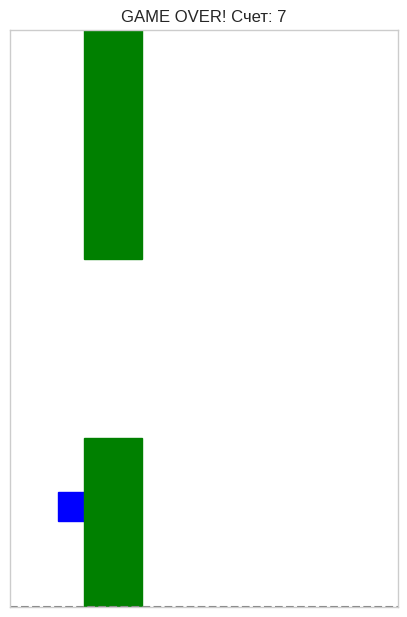

Тестовый Эпизод 10: Награда=84.5, Счет=7

Средняя награда за 10 тест. эп.: 16.2
Средний счет за 10 тест. эп.: 4.4

--- Тестирование и демонстрация завершены ---


In [58]:
# Полный листинг Q-Learning с УПРОЩЕННОЙ игрой и всеми исправлениями

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import display, clear_output
import time
import random
import numpy as np

# --- Параметры УПРОЩЕННОЙ игры ---
CANVAS_WIDTH = 400; CANVAS_HEIGHT = 600
GRAVITY = 0.6             
JUMP_STRENGTH = -11       
PLAYER_X_START = 50; PLAYER_Y_START = CANVAS_HEIGHT // 2; PLAYER_WIDTH = 30; PLAYER_HEIGHT = 30
PLAYER_COLOR = 'blue'
OBSTACLE_WIDTH = 60       
OBSTACLE_COLOR = 'green'
OBSTACLE_SPEED = 4        
MIN_GAP_HEIGHT = 150      
MAX_GAP_HEIGHT = 200      
OBSTACLE_SPAWN_INTERVAL = 130 

# --- Параметры для RL (с измененными наградами) ---
REWARD_SURVIVE = 0.01       
REWARD_PASS_OBSTACLE = 25   
REWARD_GAME_OVER = -100     
MAX_FRAMES_PER_EPISODE = 2500 

# --- Глобальные переменные игры и визуализации ---
danya = None; obstacles = []; score = 0; current_frame_count = 0
game_over_flag = False; frames_since_last_obstacle_rl = 0
fig_rl, ax_rl = None, None; is_rendering_enabled = False; RENDER_SPEED_SECONDS = 0.03

# --- Классы Player и Obstacle ---
class Player:
    def __init__(self, x, y, width, height, color):
        self.x = x; self.y = y; self.width = width; self.height = height
        self.color = color; self.velocity_y = 0
    def jump(self):
        if self.y > 0: self.velocity_y = JUMP_STRENGTH
    def update(self):
        self.velocity_y += GRAVITY
        self.y += self.velocity_y
        # Границы
        if self.y + self.height > CANVAS_HEIGHT:
            self.y = CANVAS_HEIGHT - self.height
            self.velocity_y = 0
        if self.y < 0:
            self.y = 0
            self.velocity_y = 0
    def draw(self, ax_to_draw_on):
        ax_to_draw_on.add_patch(Rectangle((self.x, self.y), self.width, self.height, color=self.color))

class Obstacle:
    def __init__(self, x, canvas_height, width, color, speed, min_gap, max_gap):
        self.x = x; self.canvas_height = canvas_height; self.width = width
        self.color = color; self.speed = speed; self.passed_by_player = False
        self.gap_height = random.randint(min_gap, max_gap)
        margin = 20 
        self.gap_y_top = random.randint(margin, self.canvas_height - self.gap_height - margin)
        self.gap_y_center = self.gap_y_top + self.gap_height / 2
        self.top_rect_height = self.gap_y_top
        self.bottom_rect_y = self.gap_y_top + self.gap_height
        self.bottom_rect_height = self.canvas_height - self.bottom_rect_y
    def update(self): self.x -= self.speed
    def is_off_screen(self): return self.x + self.width < 0
    def draw(self, ax_to_draw_on):
        ax_to_draw_on.add_patch(Rectangle((self.x,0),self.width,self.top_rect_height,color=self.color))
        ax_to_draw_on.add_patch(Rectangle((self.x,self.bottom_rect_y),self.width,self.bottom_rect_height,color=self.color))
    def collides_with(self, player):
        player_left = player.x; player_right = player.x + player.width
        player_top = player.y; player_bottom = player.y + player.height
        obs_top_left = self.x; obs_top_right = self.x + self.width
        obs_top_top = 0; obs_top_bottom = self.top_rect_height
        if (player_right > obs_top_left and player_left < obs_top_right and
            player_bottom > obs_top_top and player_top < obs_top_bottom):
            return True
        obs_bottom_left = self.x; obs_bottom_right = self.x + self.width
        obs_bottom_top = self.bottom_rect_y; obs_bottom_bottom = self.canvas_height
        if (player_right > obs_bottom_left and player_left < obs_bottom_right and
            player_bottom > obs_bottom_top and player_top < obs_bottom_bottom):
            return True
        return False

# --- Функции для RL-среды ---
def initialize_visualization():
    global fig_rl, ax_rl
    if fig_rl is None or not plt.fignum_exists(fig_rl.number): # Check if figure exists or was closed
        fig_rl, ax_rl = plt.subplots(figsize=(5, 7.5))

def render_game_state():
    global danya, obstacles, score, current_frame_count, game_over_flag, fig_rl, ax_rl
    if not is_rendering_enabled or fig_rl is None: return
    clear_output(wait=True) 
    ax_rl.cla(); ax_rl.set_xlim(0, CANVAS_WIDTH); ax_rl.set_ylim(0, CANVAS_HEIGHT); ax_rl.invert_yaxis() 
    ax_rl.set_xticks([]); ax_rl.set_yticks([])
    title = f"Счет: {score} (Кадр: {current_frame_count})"
    if game_over_flag: title = f"GAME OVER! Счет: {score}"
    ax_rl.set_title(title)
    if danya: danya.draw(ax_rl)
    for obs in obstacles: obs.draw(ax_rl)
    ax_rl.plot([0, CANVAS_WIDTH], [CANVAS_HEIGHT, CANVAS_HEIGHT], color='grey', linestyle='--')
    display(fig_rl); time.sleep(RENDER_SPEED_SECONDS)

def reset_game():
    global danya, obstacles, score, current_frame_count, game_over_flag, frames_since_last_obstacle_rl
    danya = Player(PLAYER_X_START, PLAYER_Y_START, PLAYER_WIDTH, PLAYER_HEIGHT, PLAYER_COLOR)
    obstacles = []; score = 0; current_frame_count = 0; game_over_flag = False
    obstacles.append(Obstacle(CANVAS_WIDTH + OBSTACLE_WIDTH // 2, CANVAS_HEIGHT, OBSTACLE_WIDTH, OBSTACLE_COLOR, OBSTACLE_SPEED, MIN_GAP_HEIGHT, MAX_GAP_HEIGHT))
    frames_since_last_obstacle_rl = OBSTACLE_SPAWN_INTERVAL // 3 
    if is_rendering_enabled:
        initialize_visualization(); render_game_state()
    return get_current_state()

def get_next_obstacle_info():
    global danya, obstacles
    next_obs = None; min_dist_to_left_edge = float('inf')
    if not danya: return None, CANVAS_WIDTH, CANVAS_HEIGHT / 2
    for obs in obstacles:
        distance_to_obs_left_edge = obs.x - danya.x 
        if obs.x + obs.width > danya.x: 
            if distance_to_obs_left_edge < min_dist_to_left_edge :
                min_dist_to_left_edge = distance_to_obs_left_edge
                next_obs = obs
    if next_obs:
        horizontal_distance = next_obs.x - (danya.x + danya.width)
        return next_obs, horizontal_distance, next_obs.gap_y_center
    else:
        return None, CANVAS_WIDTH, CANVAS_HEIGHT / 2 

# --- Дискретизация состояния (!!! ВАЖНО: ИСПОЛЬЗУЙТЕ ВАШИ НАСТРОЕННЫЕ БИНЫ !!!) ---
NUM_Y_BINS=15;NUM_VY_BINS=10;NUM_DX_BINS=10;NUM_DY_GAP_BINS=10;NUM_ACTIONS=2
# ЗАМЕНИТЕ ЭТИ СТРОКИ НА ВАШИ ЗНАЧЕНИЯ, ПОЛУЧЕННЫЕ ИЗ СТАТИСТИКИ!
Y_BINS_BOUNDS=np.linspace(0,CANVAS_HEIGHT,NUM_Y_BINS)[1:]
VY_BINS_BOUNDS=np.linspace(-12.0,11.0,NUM_VY_BINS)[1:] 
DX_BINS_BOUNDS=np.linspace(-float(OBSTACLE_WIDTH),float(CANVAS_WIDTH),NUM_DX_BINS)[1:]
DY_GAP_BINS_BOUNDS=np.linspace(-300.0,500.0,NUM_DY_GAP_BINS)[1:] 
def discretize_value(value,bins_boundaries,num_total_bins_for_axis):idx=np.digitize(value,bins_boundaries);return min(idx,num_total_bins_for_axis-1)
def get_current_state():
    global danya, PLAYER_HEIGHT # PLAYER_HEIGHT используется здесь
    if not danya: return(0,0,0,0)
    dy_val=danya.y;dvy_val=danya.velocity_y
    _,h_dist,gyc_val=get_next_obstacle_info()
    diff_dyg_val=gyc_val-(dy_val+PLAYER_HEIGHT/2) 
    s1=discretize_value(dy_val,Y_BINS_BOUNDS,NUM_Y_BINS)
    s2=discretize_value(dvy_val,VY_BINS_BOUNDS,NUM_VY_BINS)
    s3=discretize_value(h_dist,DX_BINS_BOUNDS,NUM_DX_BINS)
    s4=discretize_value(diff_dyg_val,DY_GAP_BINS_BOUNDS,NUM_DY_GAP_BINS)
    return(s1,s2,s3,s4)
def step(action):
    global danya,obstacles,score,current_frame_count,game_over_flag,frames_since_last_obstacle_rl
    if game_over_flag:return get_current_state(),0,True,{}
    current_frame_count+=1;reward=REWARD_SURVIVE
    if action==1:danya.jump()
    danya.update();frames_since_last_obstacle_rl+=1
    if frames_since_last_obstacle_rl>=OBSTACLE_SPAWN_INTERVAL:obstacles.append(Obstacle(CANVAS_WIDTH,CANVAS_HEIGHT,OBSTACLE_WIDTH,OBSTACLE_COLOR,OBSTACLE_SPEED,MIN_GAP_HEIGHT,MAX_GAP_HEIGHT));frames_since_last_obstacle_rl=0
    active_obs_next_step=[];coll_detected=False
    for obs in list(obstacles):
        obs.update()
        if obs.collides_with(danya):coll_detected=True
        if not obs.passed_by_player and(obs.x+obs.width)<danya.x:
            if not coll_detected:score+=1;reward+=REWARD_PASS_OBSTACLE
            obs.passed_by_player=True
        if not obs.is_off_screen():active_obs_next_step.append(obs)
    obstacles=active_obs_next_step
    if coll_detected:game_over_flag=True;reward+=REWARD_GAME_OVER
    if current_frame_count>=MAX_FRAMES_PER_EPISODE:game_over_flag=True
    next_s=get_current_state()
    if is_rendering_enabled:render_game_state()
    return next_s,reward,game_over_flag,{"score":score}

# --- Q-Learning Агент ---
ALPHA=0.1;GAMMA=0.99;EPSILON=1.0;EPSILON_DECAY=0.9997;MIN_EPSILON=0.01
NUM_EPISODES_TRAIN = 30000 
q_table_shape=(NUM_Y_BINS,NUM_VY_BINS,NUM_DX_BINS,NUM_DY_GAP_BINS,NUM_ACTIONS); q_table=np.zeros(q_table_shape)
print(f"Размер Q-таблицы: {q_table.shape}"); print(f"OBSTACLE_SPAWN_INTERVAL: {OBSTACLE_SPAWN_INTERVAL}")
print(f"Награды: Survive={REWARD_SURVIVE}, Pass={REWARD_PASS_OBSTACLE}, GameOver={REWARD_GAME_OVER}")
print(f"Параметры игры: Скорость={OBSTACLE_SPEED}, Мин.Проем={MIN_GAP_HEIGHT}")
def choose_action(state,current_epsilon_val):return random.choice([0,1])if random.uniform(0,1)<current_epsilon_val else np.argmax(q_table[state])
rewards_per_episode=[];current_epsilon_val=EPSILON
print(f"\n--- Начало обучения Q-Learning ({NUM_EPISODES_TRAIN} эпизодов) ---");is_rendering_enabled=False
for episode in range(NUM_EPISODES_TRAIN):
    state=reset_game();episode_reward=0;done=False
    for step_count in range(MAX_FRAMES_PER_EPISODE):
        action=choose_action(state,current_epsilon_val)
        next_state,reward,done,info=step(action)
        episode_reward+=reward
        old_q_value=q_table[state][action]
        next_max_q=np.max(q_table[next_state])
        new_q_value=old_q_value+ALPHA*(reward+GAMMA*next_max_q-old_q_value)
        q_table[state][action]=new_q_value
        state=next_state
        if done: # Исправленный синтаксис
            break
    rewards_per_episode.append(episode_reward);current_epsilon_val=max(MIN_EPSILON,current_epsilon_val*EPSILON_DECAY)
    if(episode+1)%500==0:avg_reward_last_100=np.mean(rewards_per_episode[max(0,len(rewards_per_episode)-100):]);print(f"Эп: {episode+1}/{NUM_EPISODES_TRAIN}, Eps: {current_epsilon_val:.3f}, Сред. награда (100): {avg_reward_last_100:.1f}, Посл. награда: {episode_reward:.1f}, Счет: {info.get('score',0)}")
print("--- Обучение завершено ---")

# --- Построение графика наград по эпизодам ---
if plt and rewards_per_episode:
    try:
        fig_learning_curve, ax_learning_curve = plt.subplots(figsize=(12, 7))
        # plt.style.use('seaborn-v0_8-whitegrid') 
        avg_window = 100 
        if len(rewards_per_episode) >= avg_window:
            moving_avg_rewards = np.convolve(rewards_per_episode, np.ones(avg_window)/avg_window, mode='valid')
            ax_learning_curve.plot(np.arange(avg_window - 1, len(rewards_per_episode)), moving_avg_rewards, color='tomato', linewidth=2, label=f"Скользящее среднее ({avg_window} эп.)")
        ax_learning_curve.plot(rewards_per_episode, color='cornflowerblue', alpha=0.5, linewidth=0.8, label="Награда за эпизод (сырые данные)")
        ax_learning_curve.set_xlabel("Эпизод", fontsize=14); ax_learning_curve.set_ylabel("Суммарная награда", fontsize=14)
        title_str = f"Прогресс обучения Q-Learning ('Даня')\nУпрощенная игра, Эпизодов: {NUM_EPISODES_TRAIN}"
        ax_learning_curve.set_title(title_str, fontsize=16); ax_learning_curve.legend(fontsize=12); ax_learning_curve.grid(True)
        plt.show() 
    except Exception as e: print(f"Ошибка при построении графика обучения: {e}")
else: print("Данных для графика обучения нет или plt не доступен.")

# --- Тестирование обученного агента ---
print("\n--- Тестирование обученного агента (Epsilon = 0) ---")
num_test_episodes = 10; is_rendering_enabled = True 
if is_rendering_enabled and (fig_rl is None or not plt.fignum_exists(fig_rl.number)): initialize_visualization()
total_test_reward = 0; total_test_score = 0
for episode in range(num_test_episodes):
    state = reset_game(); episode_reward = 0; done = False
    print(f"\nТестовый Эпизод {episode + 1}")
    if is_rendering_enabled: time.sleep(0.5) 
    for step_count in range(MAX_FRAMES_PER_EPISODE):
        action = choose_action(state, 0.0) 
        next_state, reward, done, info = step(action)
        episode_reward += reward
        state = next_state
        if done: # Исправленный синтаксис
            break
    total_test_reward += episode_reward; total_test_score += info.get('score',0)
    print(f"Тестовый Эпизод {episode + 1}: Награда={episode_reward:.1f}, Счет={info.get('score',0)}")
    if is_rendering_enabled: time.sleep(1 if done else 0.5) 
avg_test_reward = total_test_reward / num_test_episodes
avg_test_score = total_test_score / num_test_episodes
print(f"\nСредняя награда за {num_test_episodes} тест. эп.: {avg_test_reward:.1f}")
print(f"Средний счет за {num_test_episodes} тест. эп.: {avg_test_score:.1f}")
if fig_rl and plt.fignum_exists(fig_rl.number) and is_rendering_enabled: plt.close(fig_rl)
print("\n--- Тестирование и демонстрация завершены ---")

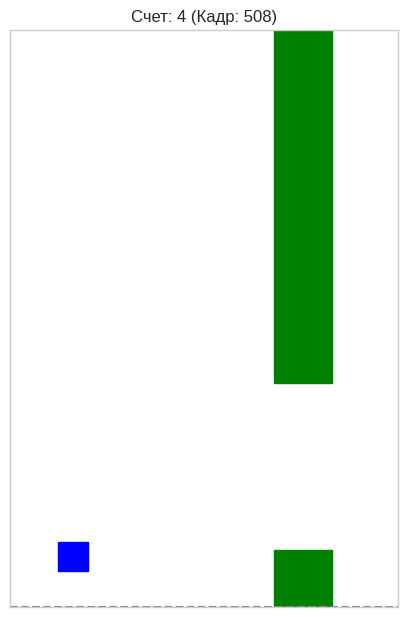

In [ ]:
# Полный листинг Q-Learning с УПРОЩЕННОЙ игрой и всеми исправлениями

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import display, clear_output
import time
import random
import numpy as np

# --- Параметры УПРОЩЕННОЙ игры ---
CANVAS_WIDTH = 400; CANVAS_HEIGHT = 600
GRAVITY = 0.6             
JUMP_STRENGTH = -11       
PLAYER_X_START = 50; PLAYER_Y_START = CANVAS_HEIGHT // 2; PLAYER_WIDTH = 30; PLAYER_HEIGHT = 30
PLAYER_COLOR = 'blue'
OBSTACLE_WIDTH = 60       
OBSTACLE_COLOR = 'green'
OBSTACLE_SPEED = 4        
MIN_GAP_HEIGHT = 150      
MAX_GAP_HEIGHT = 200      
OBSTACLE_SPAWN_INTERVAL = 130 

# --- Параметры для RL (с измененными наградами) ---
REWARD_SURVIVE = 0.01       
REWARD_PASS_OBSTACLE = 25   
REWARD_GAME_OVER = -100     
MAX_FRAMES_PER_EPISODE = 2500 

# --- Глобальные переменные игры и визуализации ---
danya = None; obstacles = []; score = 0; current_frame_count = 0
game_over_flag = False; frames_since_last_obstacle_rl = 0
fig_rl, ax_rl = None, None; is_rendering_enabled = False; RENDER_SPEED_SECONDS = 0.03

# --- Классы Player и Obstacle ---
class Player:
    def __init__(self, x, y, width, height, color):
        self.x = x; self.y = y; self.width = width; self.height = height
        self.color = color; self.velocity_y = 0
    def jump(self):
        if self.y > 0: self.velocity_y = JUMP_STRENGTH
    def update(self):
        self.velocity_y += GRAVITY
        self.y += self.velocity_y
        # Границы
        if self.y + self.height > CANVAS_HEIGHT:
            self.y = CANVAS_HEIGHT - self.height
            self.velocity_y = 0
        if self.y < 0:
            self.y = 0
            self.velocity_y = 0
    def draw(self, ax_to_draw_on):
        ax_to_draw_on.add_patch(Rectangle((self.x, self.y), self.width, self.height, color=self.color))

class Obstacle:
    def __init__(self, x, canvas_height, width, color, speed, min_gap, max_gap):
        self.x = x; self.canvas_height = canvas_height; self.width = width
        self.color = color; self.speed = speed; self.passed_by_player = False
        self.gap_height = random.randint(min_gap, max_gap)
        margin = 20 
        self.gap_y_top = random.randint(margin, self.canvas_height - self.gap_height - margin)
        self.gap_y_center = self.gap_y_top + self.gap_height / 2
        self.top_rect_height = self.gap_y_top
        self.bottom_rect_y = self.gap_y_top + self.gap_height
        self.bottom_rect_height = self.canvas_height - self.bottom_rect_y
    def update(self): self.x -= self.speed
    def is_off_screen(self): return self.x + self.width < 0
    def draw(self, ax_to_draw_on):
        ax_to_draw_on.add_patch(Rectangle((self.x,0),self.width,self.top_rect_height,color=self.color))
        ax_to_draw_on.add_patch(Rectangle((self.x,self.bottom_rect_y),self.width,self.bottom_rect_height,color=self.color))
    def collides_with(self, player):
        player_left = player.x; player_right = player.x + player.width
        player_top = player.y; player_bottom = player.y + player.height
        obs_top_left = self.x; obs_top_right = self.x + self.width
        obs_top_top = 0; obs_top_bottom = self.top_rect_height
        if (player_right > obs_top_left and player_left < obs_top_right and
            player_bottom > obs_top_top and player_top < obs_top_bottom):
            return True
        obs_bottom_left = self.x; obs_bottom_right = self.x + self.width
        obs_bottom_top = self.bottom_rect_y; obs_bottom_bottom = self.canvas_height
        if (player_right > obs_bottom_left and player_left < obs_bottom_right and
            player_bottom > obs_bottom_top and player_top < obs_bottom_bottom):
            return True
        return False

# --- Функции для RL-среды ---
def initialize_visualization():
    global fig_rl, ax_rl
    if fig_rl is None or not plt.fignum_exists(fig_rl.number): # Check if figure exists or was closed
        fig_rl, ax_rl = plt.subplots(figsize=(5, 7.5))

def render_game_state():
    global danya, obstacles, score, current_frame_count, game_over_flag, fig_rl, ax_rl
    if not is_rendering_enabled or fig_rl is None: return
    clear_output(wait=True) 
    ax_rl.cla(); ax_rl.set_xlim(0, CANVAS_WIDTH); ax_rl.set_ylim(0, CANVAS_HEIGHT); ax_rl.invert_yaxis() 
    ax_rl.set_xticks([]); ax_rl.set_yticks([])
    title = f"Счет: {score} (Кадр: {current_frame_count})"
    if game_over_flag: title = f"GAME OVER! Счет: {score}"
    ax_rl.set_title(title)
    if danya: danya.draw(ax_rl)
    for obs in obstacles: obs.draw(ax_rl)
    ax_rl.plot([0, CANVAS_WIDTH], [CANVAS_HEIGHT, CANVAS_HEIGHT], color='grey', linestyle='--')
    display(fig_rl); time.sleep(RENDER_SPEED_SECONDS)

def reset_game():
    global danya, obstacles, score, current_frame_count, game_over_flag, frames_since_last_obstacle_rl
    danya = Player(PLAYER_X_START, PLAYER_Y_START, PLAYER_WIDTH, PLAYER_HEIGHT, PLAYER_COLOR)
    obstacles = []; score = 0; current_frame_count = 0; game_over_flag = False
    obstacles.append(Obstacle(CANVAS_WIDTH + OBSTACLE_WIDTH // 2, CANVAS_HEIGHT, OBSTACLE_WIDTH, OBSTACLE_COLOR, OBSTACLE_SPEED, MIN_GAP_HEIGHT, MAX_GAP_HEIGHT))
    frames_since_last_obstacle_rl = OBSTACLE_SPAWN_INTERVAL // 3 
    if is_rendering_enabled:
        initialize_visualization(); render_game_state()
    return get_current_state()

def get_next_obstacle_info():
    global danya, obstacles
    next_obs = None; min_dist_to_left_edge = float('inf')
    if not danya: return None, CANVAS_WIDTH, CANVAS_HEIGHT / 2
    for obs in obstacles:
        distance_to_obs_left_edge = obs.x - danya.x 
        if obs.x + obs.width > danya.x: 
            if distance_to_obs_left_edge < min_dist_to_left_edge :
                min_dist_to_left_edge = distance_to_obs_left_edge
                next_obs = obs
    if next_obs:
        horizontal_distance = next_obs.x - (danya.x + danya.width)
        return next_obs, horizontal_distance, next_obs.gap_y_center
    else:
        return None, CANVAS_WIDTH, CANVAS_HEIGHT / 2 

# --- Дискретизация состояния (!!! ВАЖНО: ИСПОЛЬЗУЙТЕ ВАШИ НАСТРОЕННЫЕ БИНЫ !!!) ---
NUM_Y_BINS=15;NUM_VY_BINS=10;NUM_DX_BINS=10;NUM_DY_GAP_BINS=10;NUM_ACTIONS=2
# ЗАМЕНИТЕ ЭТИ СТРОКИ НА ВАШИ ЗНАЧЕНИЯ, ПОЛУЧЕННЫЕ ИЗ СТАТИСТИКИ!
Y_BINS_BOUNDS=np.linspace(0,CANVAS_HEIGHT,NUM_Y_BINS)[1:]
VY_BINS_BOUNDS=np.linspace(-12.0,11.0,NUM_VY_BINS)[1:] 
DX_BINS_BOUNDS=np.linspace(-float(OBSTACLE_WIDTH),float(CANVAS_WIDTH),NUM_DX_BINS)[1:]
DY_GAP_BINS_BOUNDS=np.linspace(-300.0,500.0,NUM_DY_GAP_BINS)[1:] 
def discretize_value(value,bins_boundaries,num_total_bins_for_axis):idx=np.digitize(value,bins_boundaries);return min(idx,num_total_bins_for_axis-1)
def get_current_state():
    global danya, PLAYER_HEIGHT # PLAYER_HEIGHT используется здесь
    if not danya: return(0,0,0,0)
    dy_val=danya.y;dvy_val=danya.velocity_y
    _,h_dist,gyc_val=get_next_obstacle_info()
    diff_dyg_val=gyc_val-(dy_val+PLAYER_HEIGHT/2) 
    s1=discretize_value(dy_val,Y_BINS_BOUNDS,NUM_Y_BINS)
    s2=discretize_value(dvy_val,VY_BINS_BOUNDS,NUM_VY_BINS)
    s3=discretize_value(h_dist,DX_BINS_BOUNDS,NUM_DX_BINS)
    s4=discretize_value(diff_dyg_val,DY_GAP_BINS_BOUNDS,NUM_DY_GAP_BINS)
    return(s1,s2,s3,s4)
def step(action):
    global danya,obstacles,score,current_frame_count,game_over_flag,frames_since_last_obstacle_rl
    if game_over_flag:return get_current_state(),0,True,{}
    current_frame_count+=1;reward=REWARD_SURVIVE
    if action==1:danya.jump()
    danya.update();frames_since_last_obstacle_rl+=1
    if frames_since_last_obstacle_rl>=OBSTACLE_SPAWN_INTERVAL:obstacles.append(Obstacle(CANVAS_WIDTH,CANVAS_HEIGHT,OBSTACLE_WIDTH,OBSTACLE_COLOR,OBSTACLE_SPEED,MIN_GAP_HEIGHT,MAX_GAP_HEIGHT));frames_since_last_obstacle_rl=0
    active_obs_next_step=[];coll_detected=False
    for obs in list(obstacles):
        obs.update()
        if obs.collides_with(danya):coll_detected=True
        if not obs.passed_by_player and(obs.x+obs.width)<danya.x:
            if not coll_detected:score+=1;reward+=REWARD_PASS_OBSTACLE
            obs.passed_by_player=True
        if not obs.is_off_screen():active_obs_next_step.append(obs)
    obstacles=active_obs_next_step
    if coll_detected:game_over_flag=True;reward+=REWARD_GAME_OVER
    if current_frame_count>=MAX_FRAMES_PER_EPISODE:game_over_flag=True
    next_s=get_current_state()
    if is_rendering_enabled:render_game_state()
    return next_s,reward,game_over_flag,{"score":score}

# --- Q-Learning Агент ---
ALPHA=0.1;GAMMA=0.99;EPSILON=1.0;EPSILON_DECAY=0.9997;MIN_EPSILON=0.01
NUM_EPISODES_TRAIN = 100000 
q_table_shape=(NUM_Y_BINS,NUM_VY_BINS,NUM_DX_BINS,NUM_DY_GAP_BINS,NUM_ACTIONS); q_table=np.zeros(q_table_shape)
print(f"Размер Q-таблицы: {q_table.shape}"); print(f"OBSTACLE_SPAWN_INTERVAL: {OBSTACLE_SPAWN_INTERVAL}")
print(f"Награды: Survive={REWARD_SURVIVE}, Pass={REWARD_PASS_OBSTACLE}, GameOver={REWARD_GAME_OVER}")
print(f"Параметры игры: Скорость={OBSTACLE_SPEED}, Мин.Проем={MIN_GAP_HEIGHT}")
def choose_action(state,current_epsilon_val):return random.choice([0,1])if random.uniform(0,1)<current_epsilon_val else np.argmax(q_table[state])
rewards_per_episode=[];current_epsilon_val=EPSILON
print(f"\n--- Начало обучения Q-Learning ({NUM_EPISODES_TRAIN} эпизодов) ---");is_rendering_enabled=False
for episode in range(NUM_EPISODES_TRAIN):
    state=reset_game();episode_reward=0;done=False
    for step_count in range(MAX_FRAMES_PER_EPISODE):
        action=choose_action(state,current_epsilon_val)
        next_state,reward,done,info=step(action)
        episode_reward+=reward
        old_q_value=q_table[state][action]
        next_max_q=np.max(q_table[next_state])
        new_q_value=old_q_value+ALPHA*(reward+GAMMA*next_max_q-old_q_value)
        q_table[state][action]=new_q_value
        state=next_state
        if done: # Исправленный синтаксис
            break
    rewards_per_episode.append(episode_reward);current_epsilon_val=max(MIN_EPSILON,current_epsilon_val*EPSILON_DECAY)
    if(episode+1)%500==0:avg_reward_last_100=np.mean(rewards_per_episode[max(0,len(rewards_per_episode)-100):]);print(f"Эп: {episode+1}/{NUM_EPISODES_TRAIN}, Eps: {current_epsilon_val:.3f}, Сред. награда (100): {avg_reward_last_100:.1f}, Посл. награда: {episode_reward:.1f}, Счет: {info.get('score',0)}")
print("--- Обучение завершено ---")

# --- Построение графика наград по эпизодам ---
if plt and rewards_per_episode:
    try:
        fig_learning_curve, ax_learning_curve = plt.subplots(figsize=(12, 7))
        # plt.style.use('seaborn-v0_8-whitegrid') 
        avg_window = 100 
        if len(rewards_per_episode) >= avg_window:
            moving_avg_rewards = np.convolve(rewards_per_episode, np.ones(avg_window)/avg_window, mode='valid')
            ax_learning_curve.plot(np.arange(avg_window - 1, len(rewards_per_episode)), moving_avg_rewards, color='tomato', linewidth=2, label=f"Скользящее среднее ({avg_window} эп.)")
        ax_learning_curve.plot(rewards_per_episode, color='cornflowerblue', alpha=0.5, linewidth=0.8, label="Награда за эпизод (сырые данные)")
        ax_learning_curve.set_xlabel("Эпизод", fontsize=14); ax_learning_curve.set_ylabel("Суммарная награда", fontsize=14)
        title_str = f"Прогресс обучения Q-Learning ('Даня')\nУпрощенная игра, Эпизодов: {NUM_EPISODES_TRAIN}"
        ax_learning_curve.set_title(title_str, fontsize=16); ax_learning_curve.legend(fontsize=12); ax_learning_curve.grid(True)
        plt.show() 
    except Exception as e: print(f"Ошибка при построении графика обучения: {e}")
else: print("Данных для графика обучения нет или plt не доступен.")

# --- Тестирование обученного агента ---
print("\n--- Тестирование обученного агента (Epsilon = 0) ---")
num_test_episodes = 10; is_rendering_enabled = True 
if is_rendering_enabled and (fig_rl is None or not plt.fignum_exists(fig_rl.number)): initialize_visualization()
total_test_reward = 0; total_test_score = 0
for episode in range(num_test_episodes):
    state = reset_game(); episode_reward = 0; done = False
    print(f"\nТестовый Эпизод {episode + 1}")
    if is_rendering_enabled: time.sleep(0.5) 
    for step_count in range(MAX_FRAMES_PER_EPISODE):
        action = choose_action(state, 0.0) 
        next_state, reward, done, info = step(action)
        episode_reward += reward
        state = next_state
        if done: # Исправленный синтаксис
            break
    total_test_reward += episode_reward; total_test_score += info.get('score',0)
    print(f"Тестовый Эпизод {episode + 1}: Награда={episode_reward:.1f}, Счет={info.get('score',0)}")
    if is_rendering_enabled: time.sleep(1 if done else 0.5) 
avg_test_reward = total_test_reward / num_test_episodes
avg_test_score = total_test_score / num_test_episodes
print(f"\nСредняя награда за {num_test_episodes} тест. эп.: {avg_test_reward:.1f}")
print(f"Средний счет за {num_test_episodes} тест. эп.: {avg_test_score:.1f}")
if fig_rl and plt.fignum_exists(fig_rl.number) and is_rendering_enabled: plt.close(fig_rl)
print("\n--- Тестирование и демонстрация завершены ---")

In [ ]:
# --- Тестирование обученного агента ---
print("\n--- Тестирование обученного агента (Epsilon = 0) ---")
num_test_episodes = 10; is_rendering_enabled = True 
if is_rendering_enabled and (fig_rl is None or not plt.fignum_exists(fig_rl.number)): initialize_visualization()
total_test_reward = 0; total_test_score = 0
for episode in range(num_test_episodes):
    state = reset_game(); episode_reward = 0; done = False
    print(f"\nТестовый Эпизод {episode + 1}")
    if is_rendering_enabled: time.sleep(0.5) 
    for step_count in range(MAX_FRAMES_PER_EPISODE):
        action = choose_action(state, 0.0) 
        next_state, reward, done, info = step(action)
        episode_reward += reward
        state = next_state
        if done: # Исправленный синтаксис
            break
    total_test_reward += episode_reward; total_test_score += info.get('score',0)
    print(f"Тестовый Эпизод {episode + 1}: Награда={episode_reward:.1f}, Счет={info.get('score',0)}")
    if is_rendering_enabled: time.sleep(1 if done else 0.5) 
avg_test_reward = total_test_reward / num_test_episodes
avg_test_score = total_test_score / num_test_episodes
print(f"\nСредняя награда за {num_test_episodes} тест. эп.: {avg_test_reward:.1f}")
print(f"Средний счет за {num_test_episodes} тест. эп.: {avg_test_score:.1f}")
if fig_rl and plt.fignum_exists(fig_rl.number) and is_rendering_enabled: plt.close(fig_rl)
print("\n--- Тестирование и демонстрация завершены ---")

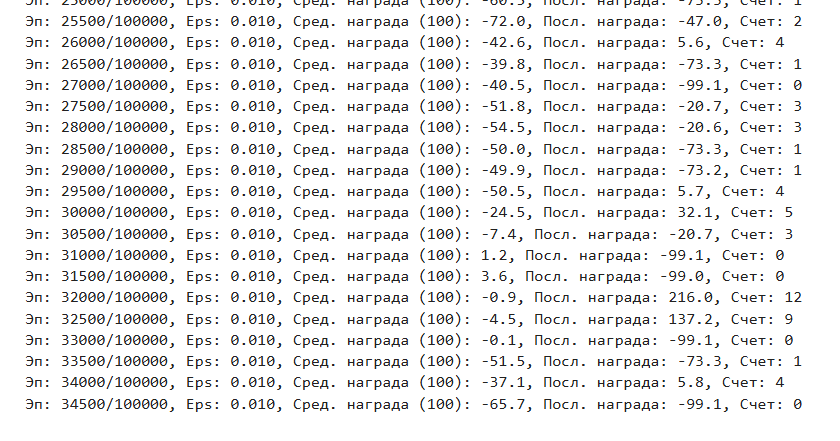

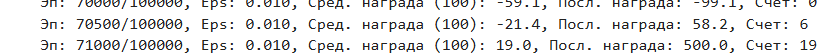

## Часть 5: Заключение и "Что дальше?"

Ну что, дата-джедаи, наше сегодняшнее приключение подходит к концу! Мы с вами погрузились в два мощных мира: мир строгой оптимизации с помощью Линейного Программирования и мир адаптивного обучения через Обучение с Подкреплением.

#### Подводим итоги: Чему мы научились?

1.  **Линейное Программирование (ЛП): Оптимизация по правилам.**
    *   Мы поняли, что ЛП – это крутой математический инструмент для поиска *наилучшего* решения, когда у нас есть четкая цель (целевая функция) и понятные ограничения.
    *   Разобрались с ключевыми компонентами: переменные решения, целевая функция, ограничения.
    *   Увидели, как это работает на графике для двух переменных и узнали про симплекс-метод для более сложных случаев.
    *   Попробовали разные Python-библиотеки (`PuLP`, `SciPy`, `Google OR-Tools`) для решения задач ЛП и поняли, что выбрать есть из чего.
    *   **Главный вывод по ЛП:** Если у вас есть задача, где все зависимости линейны, а параметры известны – ЛП ваш надежный помощник для принятия оптимальных решений!

2.  **Мостик к RL: Когда правила неизвестны.**
    *   Мы осознали, что ЛП требует хорошо определенной модели мира. Но что делать, если мир сложен, динамичен, а правила игры не до конца ясны?
    *   Здесь и начинается территория Обучения с Подкреплением (RL)!

3.  **Обучение с Подкреплением (RL): Учимся на опыте (и "вакансиях"!).**
    *   Мы познакомились с основными идеями RL: агент, среда, состояние, действие, вознаграждение.
    *   Узнали про политику, функции ценности и разницу между model-based и model-free подходами.
    *   **Создали свою игру "Даня лавирует среди заманчивых вакансий"!** Это было весело и помогло нам понять, как выглядит среда для RL-агента.
    *   **Реализовали Q-Learning:**
        *   Разобрались с Q-таблицей, уравнением Беллмана, скоростью обучения (`alpha`), коэффициентом дисконтирования (`gamma`) и ε-жадной стратегией.
        *   Прошли через важный этап **дискретизации состояний** – превращения непрерывных игровых параметров в конечное число "корзин" для нашей Q-таблицы.
        *   Увидели, как агент постепенно (иногда медленно и с трудностями!) учится играть в нашу игру, максимизируя суммарную награду.
    *   **Главный вывод по RL (на примере Q-learning):** RL позволяет создавать агентов, которые могут обучаться сложному поведению в интерактивной среде методом проб, ошибок и анализа последствий своих действий. Это очень мощно!

#### Связь ЛП и RL: Разные подходы к оптимальности

Хотя ЛП и RL кажутся разными, оба они про **поиск оптимальности**.
*   ЛП ищет оптимум в **статичной, известной модели**.
*   RL ищет оптимальную **стратегию поведения (политику)** в **динамической, часто неизвестной среде** путем взаимодействия.

Иногда они могут даже дополнять друг друга. Например, в model-based RL агент может строить модель мира, а затем использовать методы, похожие на планирование или ЛП, чтобы выбрать лучшее действие на основе этой выученной модели.

#### Что дальше? Куда копать глубже?

Мир RL огромен и активно развивается. Если вас зацепила эта тема, вот несколько направлений для дальнейшего изучения:

1.  **Более продвинутые RL алгоритмы:**
    *   **SARSA:** Похож на Q-Learning, но является on-policy алгоритмом (учится на основе той же политики, по которой действует).
    *   **Deep Q-Networks (DQN):** Вместо Q-таблицы используется нейронная сеть для аппроксимации Q-функции. Это позволяет работать с очень большими или непрерывными пространствами состояний (например, с картинками с экрана игры). Наша игра "Даня" – хороший кандидат для DQN!
    *   **Policy Gradient методы (REINFORCE, A2C, A3C, PPO):** Эти методы напрямую учат политику (что делать в каком состоянии), а не функцию ценности. Часто более стабильны в непрерывных пространствах действий.
    *   **Actor-Critic методы:** Комбинируют лучшее из Policy Gradient (Actor, который выбирает действия) и Value-based методов (Critic, который оценивает эти действия). A2C, A3C, DDPG, TD3, SAC – популярные примеры.

2.  **Библиотеки и фреймворки для RL:**
    *   **Gymnasium (ранее OpenAI Gym):** Стандартный набор сред для тестирования и разработки RL-алгоритмов. Нашу игру "Даня" можно было бы оформить как Gymnasium-совместимую среду.
    *   **Stable Baselines3:** Высокоуровневая библиотека с готовыми реализациями многих популярных RL-алгоритмов (DQN, PPO, SAC и др.). Отлично для быстрого старта и экспериментов.
    *   **RLlib (часть Ray):** Мощный фреймворк для распределенного RL.
    *   **TensorFlow Agents, PyTorch RL (TorchRL):** Инструменты для RL от создателей популярных deep learning библиотек.

3.  **Интересные области применения RL:**
    *   **Робототехника:** Обучение роботов сложным манипуляциям, ходьбе, навигации.
    *   **Игры:** Не только AlphaGo, но и создание умных NPC, процедурная генерация контента.
    *   **Финансы:** Алгоритмический трейдинг, управление портфелем.
    *   **Рекомендательные системы:** Динамическая персонализация.
    *   **Здравоохранение:** Персонализированное лечение, открытие лекарств.
    *   **Автономное вождение.**

4.  **Теория RL:** Если хотите копнуть глубже в математику – книги Ричарда Саттона и Эндрю Барто "Reinforcement Learning: An Introduction" (классика, есть русский перевод).
